In [3]:
!pip install talos

In [4]:
# LSTM for electricity forecasting problem with regression framing
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Bidirectional
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error

Using TensorFlow backend.


In [0]:
# Helper Function
# convert an array of values into a dataset matrix

def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [0]:
# fix random seed for reproducibility
numpy.random.seed(42)

In [0]:
# load the dataset
dataframe = read_csv('/Users/pratik moghe/Documents/final.csv', usecols=[1], engine='python')
dataset = dataframe.values
dataset = dataset.astype('float32')

In [0]:
# normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [0]:
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]

In [0]:
# reshape into X=t and Y=t+1
look_back = 48
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)

In [0]:
# reshape input to be [samples, time steps, features]
trainX = numpy.reshape(trainX, (trainX.shape[0], 1, trainX.shape[1]))
testX = numpy.reshape(testX, (testX.shape[0], 1, testX.shape[1]))

In [0]:
# Defining parameters

# Parameters for test runs. 
# p = {
#     'first_neurons': [4],
#     'optimizer': ['adam'], 
#     'epochs': [20],
#     'batch_size': [30, 40]
# }

# Run this for final Round
p = {
    'first_neurons': [2, 4, 8],
    'optimizer': ['adam'], 
    'epochs': [20, 35, 50, 100, 200],
    'batch_size': [1, 2, 4, 6, 8, 10, 20, 40]
}

In [0]:
def lstm_model(trainX, trainY, testX, testY, params):
    # create and fit the LSTM network
    model = Sequential()
    model.add((LSTM(params['first_neurons'], input_shape=(1, look_back), return_sequences=True)))
    model.add(LSTM(params['first_neurons'], input_shape=(1, look_back), return_sequences=True))  
    model.add(LSTM(params['first_neurons']))
    model.add(Dense(1))
    # Compile Model
    model.compile(loss='mean_absolute_percentage_error', optimizer=params['optimizer'])
    # train model
    out = model.fit(trainX, trainY, epochs=params['epochs'], batch_size=params['batch_size'], verbose=2)

    return out, model

In [0]:
import talos

In [15]:
scan_object = talos.Scan(x = trainX,
                         y = trainY,
                         model = lstm_model,
                         params = p,
                         experiment_name = 'lstm_multi_hyp_opt')

  0%|                                                                                          | 0/120 [00:00<?, ?it/s]





Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/20





 - 36s - loss: 719.8915
Epoch 2/20
 - 33s - loss: 12570.2564
Epoch 3/20
 - 35s - loss: 805.8461
Epoch 4/20
 - 36s - loss: 2762.1437
Epoch 5/20
 - 35s - loss: 8365.5889
Epoch 6/20
 - 37s - loss: 545.4950
Epoch 7/20
 - 37s - loss: 6643.2703
Epoch 8/20
 - 38s - loss: 1220.0175
Epoch 9/20
 - 36s - loss: 4464.4340
Epoch 10/20
 - 36s - loss: 1866.5989
Epoch 11/20
 - 38s - loss: 3670.1994
Epoch 12/20
 - 38s - loss: 2299.1979
Epoch 13/20
 - 37s - loss: 3177.3631
Epoch 14/20
 - 37s - loss: 2037.2855
Epoch 15/20
 - 37s - loss: 2801.7931
Epoch 16/20
 - 37s - loss: 2435.7409
Epoch 17/20
 - 37s - loss: 2674.2396
Epoch 18/20
 - 37s - loss: 2068.7303
Epoch 19/20
 - 37s - loss: 1967.5465
Epoch 20/20
 - 37s - loss: 2474.7814




  1%|▋                                                                             | 1/120 [12:16<24:21:35, 736.94s/it]

Epoch 1/20
 - 39s - loss: 452.2071
Epoch 2/20
 - 37s - loss: 2009.3031
Epoch 3/20
 - 37s - loss: 11238.5133
Epoch 4/20
 - 38s - loss: 1666.7988
Epoch 5/20
 - 37s - loss: 10957.1697
Epoch 6/20
 - 38s - loss: 2041.7603
Epoch 7/20
 - 38s - loss: 171.3922
Epoch 8/20
 - 38s - loss: 10570.4540
Epoch 9/20
 - 37s - loss: 967.6340
Epoch 10/20
 - 37s - loss: 11206.1928
Epoch 11/20
 - 37s - loss: 879.5152
Epoch 12/20
 - 38s - loss: 11490.1602
Epoch 13/20
 - 38s - loss: 989.6725
Epoch 14/20
 - 37s - loss: 10870.7489
Epoch 15/20
 - 38s - loss: 1122.8432
Epoch 16/20
 - 38s - loss: 9543.9969
Epoch 17/20
 - 38s - loss: 2389.9953
Epoch 18/20
 - 37s - loss: 8354.9254
Epoch 19/20
 - 38s - loss: 1359.6723
Epoch 20/20
 - 38s - loss: 9467.4582


  2%|█▎                                                                            | 2/120 [24:52<24:20:24, 742.58s/it]

Epoch 1/20
 - 40s - loss: 1439.1802
Epoch 2/20
 - 39s - loss: 1395.4269
Epoch 3/20
 - 39s - loss: 1013.3751
Epoch 4/20
 - 39s - loss: 32184.8686
Epoch 5/20
 - 40s - loss: 1297.8681
Epoch 6/20
 - 39s - loss: 21291.4930
Epoch 7/20
 - 40s - loss: 6803.8218
Epoch 8/20
 - 39s - loss: 805.7379
Epoch 9/20
 - 39s - loss: 868.8337
Epoch 10/20
 - 39s - loss: 8376.3764
Epoch 11/20
 - 39s - loss: 1952.3970
Epoch 12/20
 - 39s - loss: 6955.4525
Epoch 13/20
 - 39s - loss: 2113.7849
Epoch 14/20
 - 39s - loss: 2302.5574
Epoch 15/20
 - 39s - loss: 13802.3171
Epoch 16/20
 - 39s - loss: 916.7726
Epoch 17/20
 - 39s - loss: 7141.5373
Epoch 18/20
 - 39s - loss: 2514.8745
Epoch 19/20
 - 39s - loss: 4598.9832
Epoch 20/20
 - 39s - loss: 3401.2254


  2%|█▉                                                                            | 3/120 [37:55<24:31:36, 754.67s/it]

Epoch 1/35
 - 38s - loss: 454.3063
Epoch 2/35
 - 37s - loss: 10226.4311
Epoch 3/35
 - 37s - loss: 803.6535
Epoch 4/35
 - 37s - loss: 8734.6388
Epoch 5/35
 - 37s - loss: 546.7043
Epoch 6/35
 - 38s - loss: 6021.0697
Epoch 7/35
 - 37s - loss: 1575.3157
Epoch 8/35
 - 37s - loss: 3397.1349
Epoch 9/35
 - 37s - loss: 2769.3689
Epoch 10/35
 - 37s - loss: 3129.9696
Epoch 11/35
 - 37s - loss: 3106.3487
Epoch 12/35
 - 36s - loss: 1903.0652
Epoch 13/35
 - 37s - loss: 4161.7520
Epoch 14/35
 - 37s - loss: 1112.2970
Epoch 15/35
 - 37s - loss: 4939.3897
Epoch 16/35
 - 37s - loss: 1465.0971
Epoch 17/35
 - 38s - loss: 2765.5696
Epoch 18/35
 - 37s - loss: 2557.7578
Epoch 19/35
 - 37s - loss: 2416.8689
Epoch 20/35
 - 37s - loss: 2571.7258
Epoch 21/35
 - 37s - loss: 2659.2162
Epoch 22/35
 - 37s - loss: 1461.0044
Epoch 23/35
 - 37s - loss: 3709.0282
Epoch 24/35
 - 37s - loss: 1632.8123
Epoch 25/35
 - 37s - loss: 2628.4312
Epoch 26/35
 - 37s - loss: 2888.9253
Epoch 27/35
 - 37s - loss: 293.3483
Epoch 28/35
 

  3%|██▌                                                                           | 4/120 [59:26<29:30:13, 915.64s/it]

Epoch 1/35
 - 39s - loss: 757.6852
Epoch 2/35
 - 37s - loss: 8294.8728
Epoch 3/35
 - 38s - loss: 1012.2561
Epoch 4/35
 - 37s - loss: 5808.4001
Epoch 5/35
 - 37s - loss: 2723.3148
Epoch 6/35
 - 37s - loss: 3703.1087
Epoch 7/35
 - 38s - loss: 11022.0988
Epoch 8/35
 - 37s - loss: 320.1112
Epoch 9/35
 - 37s - loss: 6183.7195
Epoch 10/35
 - 37s - loss: 545.0965
Epoch 11/35
 - 38s - loss: 5393.6188
Epoch 12/35
 - 38s - loss: 1187.9515
Epoch 13/35
 - 38s - loss: 1271.4685
Epoch 14/35
 - 38s - loss: 7531.2861
Epoch 15/35
 - 38s - loss: 2468.4713
Epoch 16/35
 - 37s - loss: 5018.1540
Epoch 17/35
 - 38s - loss: 59.1688
Epoch 18/35
 - 37s - loss: 6331.5394
Epoch 19/35
 - 37s - loss: 470.2559
Epoch 20/35
 - 38s - loss: 5583.8758
Epoch 21/35
 - 37s - loss: 547.3460
Epoch 22/35
 - 37s - loss: 4663.3121
Epoch 23/35
 - 37s - loss: 736.5156
Epoch 24/35
 - 37s - loss: 4027.0780
Epoch 25/35
 - 37s - loss: 918.3068
Epoch 26/35
 - 37s - loss: 3263.4646
Epoch 27/35
 - 37s - loss: 1308.5985
Epoch 28/35
 - 38s

  4%|███▏                                                                       | 5/120 [1:21:21<33:04:19, 1035.30s/it]

Epoch 1/35
 - 37s - loss: 502.1485
Epoch 2/35
 - 36s - loss: 8882.9464
Epoch 3/35
 - 35s - loss: 1627.4348
Epoch 4/35
 - 35s - loss: 6068.6688
Epoch 5/35
 - 36s - loss: 1861.4381
Epoch 6/35
 - 36s - loss: 4136.6582
Epoch 7/35
 - 36s - loss: 2183.0800
Epoch 8/35
 - 36s - loss: 1197.6931
Epoch 9/35
 - 36s - loss: 2983.1004
Epoch 10/35
 - 36s - loss: 898.3357
Epoch 11/35
 - 36s - loss: 2032.8587
Epoch 12/35
 - 37s - loss: 298.8912
Epoch 13/35
 - 36s - loss: 1890.5106
Epoch 14/35
 - 35s - loss: 2506.0085
Epoch 15/35
 - 36s - loss: 1132.0710
Epoch 16/35
 - 35s - loss: 708.4210
Epoch 17/35
 - 35s - loss: 7365.0433
Epoch 18/35
 - 36s - loss: 78.0535
Epoch 19/35
 - 35s - loss: 120.5290
Epoch 20/35
 - 36s - loss: 417.2004
Epoch 21/35
 - 35s - loss: 2852.0934
Epoch 22/35
 - 35s - loss: 5382.5484
Epoch 23/35
 - 35s - loss: 2302.2850
Epoch 24/35
 - 35s - loss: 4822.0153
Epoch 25/35
 - 36s - loss: 2001.4992
Epoch 26/35
 - 36s - loss: 670.2914
Epoch 27/35
 - 36s - loss: 8628.3150
Epoch 28/35
 - 37s 

  5%|███▊                                                                       | 6/120 [1:42:19<34:54:08, 1102.18s/it]

Epoch 1/50
 - 37s - loss: 1433.7475
Epoch 2/50
 - 37s - loss: 7742.6139
Epoch 3/50
 - 36s - loss: 112.0973
Epoch 4/50
 - 36s - loss: 1863.8966
Epoch 5/50
 - 36s - loss: 10567.3452
Epoch 6/50
 - 36s - loss: 726.5402
Epoch 7/50
 - 36s - loss: 6755.0779
Epoch 8/50
 - 36s - loss: 872.8683
Epoch 9/50
 - 36s - loss: 6120.9476
Epoch 10/50
 - 37s - loss: 759.6088
Epoch 11/50
 - 36s - loss: 481.7588
Epoch 12/50
 - 36s - loss: 8949.9231
Epoch 13/50
 - 36s - loss: 357.4923
Epoch 14/50
 - 36s - loss: 9407.3419
Epoch 15/50
 - 36s - loss: 765.8371
Epoch 16/50
 - 36s - loss: 6016.8427
Epoch 17/50
 - 36s - loss: 1048.4648
Epoch 18/50
 - 36s - loss: 4950.9517
Epoch 19/50
 - 36s - loss: 919.1663
Epoch 20/50
 - 36s - loss: 4466.4948
Epoch 21/50
 - 36s - loss: 1633.0929
Epoch 22/50
 - 36s - loss: 448.6558
Epoch 23/50
 - 36s - loss: 5575.0237
Epoch 24/50
 - 36s - loss: 378.7296
Epoch 25/50
 - 36s - loss: 2798.9393
Epoch 26/50
 - 36s - loss: 5593.9768
Epoch 27/50
 - 36s - loss: 763.4301
Epoch 28/50
 - 36s -

  6%|████▍                                                                      | 7/120 [2:12:24<41:12:57, 1313.07s/it]

Epoch 1/50
 - 39s - loss: 1938.2700
Epoch 2/50
 - 37s - loss: 6478.4803
Epoch 3/50
 - 37s - loss: 2266.7701
Epoch 4/50
 - 37s - loss: 6600.0904
Epoch 5/50
 - 37s - loss: 1718.8832
Epoch 6/50
 - 37s - loss: 5015.3711
Epoch 7/50
 - 38s - loss: 1752.8970
Epoch 8/50
 - 37s - loss: 4708.6773
Epoch 9/50
 - 37s - loss: 1816.1395
Epoch 10/50
 - 37s - loss: 5541.1355
Epoch 11/50
 - 37s - loss: 1625.6139
Epoch 12/50
 - 37s - loss: 5259.1661
Epoch 13/50
 - 37s - loss: 1699.4240
Epoch 14/50
 - 38s - loss: 4873.0186
Epoch 15/50
 - 37s - loss: 1804.7756
Epoch 16/50
 - 38s - loss: 4380.2315
Epoch 17/50
 - 37s - loss: 1993.3271
Epoch 18/50
 - 37s - loss: 312.1041
Epoch 19/50
 - 37s - loss: 5199.4535
Epoch 20/50
 - 37s - loss: 3211.1453
Epoch 21/50
 - 37s - loss: 3505.8003
Epoch 22/50
 - 37s - loss: 4648.5287
Epoch 23/50
 - 37s - loss: 224.3684
Epoch 24/50
 - 37s - loss: 5849.4968
Epoch 25/50
 - 37s - loss: 192.9759
Epoch 26/50
 - 38s - loss: 2390.3772
Epoch 27/50
 - 37s - loss: 446.8428
Epoch 28/50
 -

  7%|█████                                                                      | 8/120 [2:43:38<46:04:54, 1481.20s/it]

Epoch 1/50
 - 39s - loss: 424.6246
Epoch 2/50
 - 38s - loss: 1550.9414
Epoch 3/50
 - 37s - loss: 20641.0554
Epoch 4/50
 - 37s - loss: 4734.3677
Epoch 5/50
 - 38s - loss: 9595.7433
Epoch 6/50
 - 37s - loss: 441.7095
Epoch 7/50
 - 38s - loss: 1456.0306
Epoch 8/50
 - 38s - loss: 16911.5674
Epoch 9/50
 - 38s - loss: 1601.4512
Epoch 10/50
 - 38s - loss: 1179.2958
Epoch 11/50
 - 38s - loss: 1144.3768
Epoch 12/50
 - 38s - loss: 797.3897
Epoch 13/50
 - 38s - loss: 12236.7461
Epoch 14/50
 - 37s - loss: 9250.8723
Epoch 15/50
 - 37s - loss: 185.7634
Epoch 16/50
 - 37s - loss: 17364.8196
Epoch 17/50
 - 37s - loss: 140.4784
Epoch 18/50
 - 38s - loss: 21049.4606
Epoch 19/50
 - 37s - loss: 931.9048
Epoch 20/50
 - 37s - loss: 5532.6649
Epoch 21/50
 - 38s - loss: 17522.3439
Epoch 22/50
 - 37s - loss: 1514.3812
Epoch 23/50
 - 38s - loss: 5069.3745
Epoch 24/50
 - 37s - loss: 9199.5996
Epoch 25/50
 - 37s - loss: 721.7645
Epoch 26/50
 - 37s - loss: 639.7913
Epoch 27/50
 - 37s - loss: 16923.6014
Epoch 28/50

  8%|█████▋                                                                     | 9/120 [3:14:53<49:19:09, 1599.55s/it]

Epoch 1/100
 - 37s - loss: 956.8359
Epoch 2/100
 - 37s - loss: 10531.0003
Epoch 3/100
 - 37s - loss: 1197.7986
Epoch 4/100
 - 37s - loss: 10086.8375
Epoch 5/100
 - 37s - loss: 947.6454
Epoch 6/100
 - 37s - loss: 8719.9138
Epoch 7/100
 - 37s - loss: 1347.7377
Epoch 8/100
 - 37s - loss: 5283.3771
Epoch 9/100
 - 37s - loss: 4059.2376
Epoch 10/100
 - 37s - loss: 3235.0189
Epoch 11/100
 - 37s - loss: 4478.9695
Epoch 12/100
 - 37s - loss: 1627.7189
Epoch 13/100
 - 37s - loss: 5073.5662
Epoch 14/100
 - 37s - loss: 918.4192
Epoch 15/100
 - 37s - loss: 4956.3790
Epoch 16/100
 - 37s - loss: 1675.3330
Epoch 17/100
 - 37s - loss: 4341.5160
Epoch 18/100
 - 37s - loss: 1476.9318
Epoch 19/100
 - 37s - loss: 3636.7685
Epoch 20/100
 - 37s - loss: 1897.4223
Epoch 21/100
 - 37s - loss: 211.3154
Epoch 22/100
 - 38s - loss: 5491.3480
Epoch 23/100
 - 37s - loss: 101.6215
Epoch 24/100
 - 37s - loss: 4019.1125
Epoch 25/100
 - 37s - loss: 1091.9217
Epoch 26/100
 - 37s - loss: 4266.7114
Epoch 27/100
 - 37s - lo

  8%|██████▏                                                                   | 10/120 [4:16:19<68:00:05, 2225.50s/it]

Epoch 1/100
 - 37s - loss: 2283.9325
Epoch 2/100
 - 36s - loss: 678.6966
Epoch 3/100
 - 36s - loss: 6431.2181
Epoch 4/100
 - 36s - loss: 362.7434
Epoch 5/100
 - 36s - loss: 3032.4338
Epoch 6/100
 - 35s - loss: 3064.8743
Epoch 7/100
 - 35s - loss: 2619.3364
Epoch 8/100
 - 36s - loss: 2539.0404
Epoch 9/100
 - 36s - loss: 2994.2068
Epoch 10/100
 - 35s - loss: 479.8907
Epoch 11/100
 - 36s - loss: 5625.6836
Epoch 12/100
 - 35s - loss: 581.4466
Epoch 13/100
 - 36s - loss: 5074.9669
Epoch 14/100
 - 35s - loss: 906.9608
Epoch 15/100
 - 35s - loss: 4952.1359
Epoch 16/100
 - 35s - loss: 1024.4546
Epoch 17/100
 - 35s - loss: 4635.7901
Epoch 18/100
 - 36s - loss: 1164.7677
Epoch 19/100
 - 36s - loss: 4247.8775
Epoch 20/100
 - 36s - loss: 1309.5062
Epoch 21/100
 - 36s - loss: 3137.0650
Epoch 22/100
 - 36s - loss: 1703.7373
Epoch 23/100
 - 35s - loss: 3103.4294
Epoch 24/100
 - 35s - loss: 1973.2069
Epoch 25/100
 - 35s - loss: 835.1627
Epoch 26/100
 - 36s - loss: 2242.0240
Epoch 27/100
 - 35s - loss:

  9%|██████▊                                                                   | 11/120 [5:15:38<79:29:41, 2625.52s/it]

Epoch 1/100
 - 38s - loss: 1512.3742
Epoch 2/100
 - 37s - loss: 7283.2058
Epoch 3/100
 - 37s - loss: 2385.3352
Epoch 4/100
 - 37s - loss: 486.1739
Epoch 5/100
 - 37s - loss: 14573.0855
Epoch 6/100
 - 37s - loss: 812.5628
Epoch 7/100
 - 37s - loss: 536.6031
Epoch 8/100
 - 38s - loss: 18413.3856
Epoch 9/100
 - 37s - loss: 129.3952
Epoch 10/100
 - 37s - loss: 11010.5782
Epoch 11/100
 - 37s - loss: 183.3057
Epoch 12/100
 - 38s - loss: 9334.0553
Epoch 13/100
 - 37s - loss: 1120.5772
Epoch 14/100
 - 37s - loss: 6420.9926
Epoch 15/100
 - 37s - loss: 538.3970
Epoch 16/100
 - 37s - loss: 3822.8773
Epoch 17/100
 - 37s - loss: 128.1618
Epoch 18/100
 - 38s - loss: 668.4475
Epoch 19/100
 - 38s - loss: 13098.8353
Epoch 20/100
 - 38s - loss: 1579.9620
Epoch 21/100
 - 39s - loss: 11454.6222
Epoch 22/100
 - 38s - loss: 1605.5321
Epoch 23/100
 - 38s - loss: 14124.3460
Epoch 24/100
 - 38s - loss: 26.6209
Epoch 25/100
 - 38s - loss: 331.6347
Epoch 26/100
 - 38s - loss: 1460.7191
Epoch 27/100
 - 37s - loss

 10%|███████▍                                                                  | 12/120 [6:18:46<89:13:38, 2974.25s/it]

Epoch 1/200
 - 37s - loss: 1573.5259
Epoch 2/200
 - 36s - loss: 6988.2813
Epoch 3/200
 - 36s - loss: 1658.2118
Epoch 4/200
 - 35s - loss: 8807.2505
Epoch 5/200
 - 36s - loss: 1916.4622
Epoch 6/200
 - 36s - loss: 7567.3662
Epoch 7/200
 - 36s - loss: 2201.6470
Epoch 8/200
 - 36s - loss: 701.5228
Epoch 9/200
 - 36s - loss: 7910.0933
Epoch 10/200
 - 35s - loss: 895.1026
Epoch 11/200
 - 36s - loss: 7653.2261
Epoch 12/200
 - 36s - loss: 1244.4859
Epoch 13/200
 - 36s - loss: 6408.5664
Epoch 14/200
 - 36s - loss: 1451.9585
Epoch 15/200
 - 36s - loss: 3685.5009
Epoch 16/200
 - 36s - loss: 3677.7860
Epoch 17/200
 - 36s - loss: 2008.6417
Epoch 18/200
 - 36s - loss: 1804.5921
Epoch 19/200
 - 36s - loss: 3604.8335
Epoch 20/200
 - 36s - loss: 2664.2597
Epoch 21/200
 - 35s - loss: 2294.3572
Epoch 22/200
 - 36s - loss: 3284.9130
Epoch 23/200
 - 36s - loss: 2422.8756
Epoch 24/200
 - 36s - loss: 1329.3582
Epoch 25/200
 - 36s - loss: 4284.0103
Epoch 26/200
 - 35s - loss: 1315.1162
Epoch 27/200
 - 36s - l

 11%|███████▉                                                                 | 13/120 [8:17:21<125:19:10, 4216.36s/it]

Epoch 1/200
 - 39s - loss: 661.6880
Epoch 2/200
 - 38s - loss: 5595.7162
Epoch 3/200
 - 37s - loss: 2636.5227
Epoch 4/200
 - 37s - loss: 1513.7659
Epoch 5/200
 - 37s - loss: 12312.6655
Epoch 6/200
 - 37s - loss: 1151.9595
Epoch 7/200
 - 37s - loss: 9297.2689
Epoch 8/200
 - 37s - loss: 936.5250
Epoch 9/200
 - 37s - loss: 7982.7408
Epoch 10/200
 - 38s - loss: 1185.1117
Epoch 11/200
 - 37s - loss: 6750.8510
Epoch 12/200
 - 37s - loss: 1371.2984
Epoch 13/200
 - 37s - loss: 5909.5361
Epoch 14/200
 - 37s - loss: 1112.3544
Epoch 15/200
 - 37s - loss: 548.4497
Epoch 16/200
 - 37s - loss: 9297.1887
Epoch 17/200
 - 37s - loss: 1104.5922
Epoch 18/200
 - 38s - loss: 8810.8379
Epoch 19/200
 - 37s - loss: 938.9194
Epoch 20/200
 - 37s - loss: 7712.5968
Epoch 21/200
 - 37s - loss: 971.6092
Epoch 22/200
 - 37s - loss: 6682.4257
Epoch 23/200
 - 37s - loss: 1394.5626
Epoch 24/200
 - 37s - loss: 5921.0502
Epoch 25/200
 - 37s - loss: 1609.6538
Epoch 26/200
 - 37s - loss: 5536.3153
Epoch 27/200
 - 37s - los

 12%|████████▍                                                               | 14/120 [10:22:14<153:05:33, 5199.38s/it]

Epoch 1/200
 - 39s - loss: 2990.5403
Epoch 2/200
 - 38s - loss: 751.1863
Epoch 3/200
 - 38s - loss: 9977.9792
Epoch 4/200
 - 37s - loss: 1131.5866
Epoch 5/200
 - 37s - loss: 1273.8887
Epoch 6/200
 - 38s - loss: 6712.8755
Epoch 7/200
 - 37s - loss: 1202.3995
Epoch 8/200
 - 37s - loss: 1038.9439
Epoch 9/200
 - 37s - loss: 1602.8646
Epoch 10/200
 - 38s - loss: 7043.3688
Epoch 11/200
 - 38s - loss: 296.9550
Epoch 12/200
 - 37s - loss: 6317.5838
Epoch 13/200
 - 37s - loss: 3284.6756
Epoch 14/200
 - 38s - loss: 266.7095
Epoch 15/200
 - 38s - loss: 14839.3289
Epoch 16/200
 - 37s - loss: 1029.8038
Epoch 17/200
 - 37s - loss: 8652.6013
Epoch 18/200
 - 37s - loss: 1243.2071
Epoch 19/200
 - 37s - loss: 1549.8127
Epoch 20/200
 - 37s - loss: 5308.5363
Epoch 21/200
 - 37s - loss: 2498.4860
Epoch 22/200
 - 37s - loss: 11166.0140
Epoch 23/200
 - 38s - loss: 2200.0976
Epoch 24/200
 - 37s - loss: 6456.2228
Epoch 25/200
 - 38s - loss: 1842.3881
Epoch 26/200
 - 37s - loss: 2233.5494
Epoch 27/200
 - 37s - 

 12%|█████████                                                               | 15/120 [12:27:37<171:58:51, 5896.49s/it]

Epoch 1/20
 - 19s - loss: 1417.6640
Epoch 2/20
 - 18s - loss: 7769.8197
Epoch 3/20
 - 18s - loss: 6014.1557
Epoch 4/20
 - 18s - loss: 3879.1521
Epoch 5/20
 - 18s - loss: 8171.4641
Epoch 6/20
 - 18s - loss: 2902.2550
Epoch 7/20
 - 18s - loss: 4639.9388
Epoch 8/20
 - 18s - loss: 4976.0656
Epoch 9/20
 - 18s - loss: 4891.2106
Epoch 10/20
 - 18s - loss: 4646.3369
Epoch 11/20
 - 18s - loss: 4835.3672
Epoch 12/20
 - 17s - loss: 3601.9301
Epoch 13/20
 - 18s - loss: 5248.3943
Epoch 14/20
 - 18s - loss: 3468.6577
Epoch 15/20
 - 18s - loss: 5333.4034
Epoch 16/20
 - 18s - loss: 2648.7468
Epoch 17/20
 - 18s - loss: 5975.9215
Epoch 18/20
 - 18s - loss: 1378.7777
Epoch 19/20
 - 18s - loss: 6387.2446
Epoch 20/20
 - 18s - loss: 921.7689


 13%|█████████▌                                                              | 16/120 [12:33:39<122:22:27, 4236.03s/it]

Epoch 1/20
 - 19s - loss: 5673.2147
Epoch 2/20
 - 18s - loss: 4118.8826
Epoch 3/20
 - 18s - loss: 1678.9841
Epoch 4/20
 - 18s - loss: 4377.3152
Epoch 5/20
 - 18s - loss: 1393.3543
Epoch 6/20
 - 18s - loss: 4143.8873
Epoch 7/20
 - 18s - loss: 1488.5373
Epoch 8/20
 - 18s - loss: 3888.8157
Epoch 9/20
 - 18s - loss: 1474.5584
Epoch 10/20
 - 18s - loss: 3802.5030
Epoch 11/20
 - 18s - loss: 1378.0007
Epoch 12/20
 - 18s - loss: 3667.6322
Epoch 13/20
 - 19s - loss: 3141.4263
Epoch 14/20
 - 18s - loss: 5036.8366
Epoch 15/20
 - 18s - loss: 3393.0919
Epoch 16/20
 - 18s - loss: 4897.5571
Epoch 17/20
 - 18s - loss: 3388.5990
Epoch 18/20
 - 18s - loss: 4830.8681
Epoch 19/20
 - 18s - loss: 3317.8847
Epoch 20/20
 - 18s - loss: 4801.2043


 14%|██████████▎                                                              | 17/120 [12:39:41<87:56:57, 3073.95s/it]

Epoch 1/20
 - 20s - loss: 920.7932
Epoch 2/20
 - 19s - loss: 6920.6016
Epoch 3/20
 - 19s - loss: 1731.9501
Epoch 4/20
 - 18s - loss: 4153.7674
Epoch 5/20
 - 19s - loss: 6623.5342
Epoch 6/20
 - 19s - loss: 2551.8416
Epoch 7/20
 - 18s - loss: 5764.5130
Epoch 8/20
 - 18s - loss: 2135.5190
Epoch 9/20
 - 19s - loss: 4747.6412
Epoch 10/20
 - 19s - loss: 1373.2476
Epoch 11/20
 - 19s - loss: 5143.6305
Epoch 12/20
 - 19s - loss: 657.8775
Epoch 13/20
 - 18s - loss: 5197.7576
Epoch 14/20
 - 18s - loss: 505.1998
Epoch 15/20
 - 18s - loss: 5160.2764
Epoch 16/20
 - 19s - loss: 149.5229
Epoch 17/20
 - 19s - loss: 5255.8755
Epoch 18/20
 - 19s - loss: 1268.5172
Epoch 19/20
 - 18s - loss: 4179.3415
Epoch 20/20
 - 18s - loss: 928.1363


 15%|██████████▉                                                              | 18/120 [12:45:57<64:09:39, 2264.50s/it]

Epoch 1/35
 - 19s - loss: 2105.9435
Epoch 2/35
 - 18s - loss: 1286.7562
Epoch 3/35
 - 18s - loss: 4365.5578
Epoch 4/35
 - 18s - loss: 1654.3767
Epoch 5/35
 - 18s - loss: 3741.3442
Epoch 6/35
 - 18s - loss: 2028.9317
Epoch 7/35
 - 18s - loss: 3070.5545
Epoch 8/35
 - 18s - loss: 2502.6074
Epoch 9/35
 - 19s - loss: 2750.2705
Epoch 10/35
 - 19s - loss: 2598.5510
Epoch 11/35
 - 18s - loss: 2564.4065
Epoch 12/35
 - 18s - loss: 2574.5911
Epoch 13/35
 - 18s - loss: 2452.2912
Epoch 14/35
 - 19s - loss: 2399.5158
Epoch 15/35
 - 18s - loss: 2351.3727
Epoch 16/35
 - 18s - loss: 2548.8042
Epoch 17/35
 - 18s - loss: 1870.8068
Epoch 18/35
 - 18s - loss: 2913.4804
Epoch 19/35
 - 18s - loss: 1716.1046
Epoch 20/35
 - 18s - loss: 2572.4093
Epoch 21/35
 - 18s - loss: 1702.2075
Epoch 22/35
 - 18s - loss: 2844.8774
Epoch 23/35
 - 18s - loss: 1030.9020
Epoch 24/35
 - 19s - loss: 3414.8271
Epoch 25/35
 - 19s - loss: 280.9740
Epoch 26/35
 - 18s - loss: 4066.3310
Epoch 27/35
 - 18s - loss: 384.9135
Epoch 28/35


 16%|███████████▌                                                             | 19/120 [12:56:38<49:51:56, 1777.39s/it]

Epoch 1/35
 - 21s - loss: 316.6753
Epoch 2/35
 - 19s - loss: 8839.9650
Epoch 3/35
 - 20s - loss: 1248.8888
Epoch 4/35
 - 20s - loss: 7411.3823
Epoch 5/35
 - 19s - loss: 1283.4562
Epoch 6/35
 - 20s - loss: 6409.0105
Epoch 7/35
 - 19s - loss: 1335.9079
Epoch 8/35
 - 20s - loss: 5633.4444
Epoch 9/35
 - 20s - loss: 1150.5563
Epoch 10/35
 - 20s - loss: 4398.7814
Epoch 11/35
 - 20s - loss: 1962.3282
Epoch 12/35
 - 20s - loss: 196.4068
Epoch 13/35
 - 20s - loss: 7152.0910
Epoch 14/35
 - 19s - loss: 817.9903
Epoch 15/35
 - 19s - loss: 6739.7577
Epoch 16/35
 - 19s - loss: 1658.4802
Epoch 17/35
 - 19s - loss: 5896.1683
Epoch 18/35
 - 19s - loss: 1020.6456
Epoch 19/35
 - 19s - loss: 5860.0411
Epoch 20/35
 - 19s - loss: 831.5296
Epoch 21/35
 - 20s - loss: 1180.9095
Epoch 22/35
 - 20s - loss: 1008.3729
Epoch 23/35
 - 19s - loss: 5203.1662
Epoch 24/35
 - 20s - loss: 1513.0449
Epoch 25/35
 - 20s - loss: 2478.6867
Epoch 26/35
 - 19s - loss: 6828.3454
Epoch 27/35
 - 19s - loss: 2817.0089
Epoch 28/35
 -

 17%|████████████▏                                                            | 20/120 [13:08:04<40:16:40, 1450.00s/it]

Epoch 1/35
 - 21s - loss: 1123.8128
Epoch 2/35
 - 20s - loss: 10413.3523
Epoch 3/35
 - 19s - loss: 410.5513
Epoch 4/35
 - 19s - loss: 9612.1303
Epoch 5/35
 - 19s - loss: 906.1003
Epoch 6/35
 - 19s - loss: 8282.5132
Epoch 7/35
 - 19s - loss: 607.5943
Epoch 8/35
 - 20s - loss: 6791.5033
Epoch 9/35
 - 19s - loss: 889.4676
Epoch 10/35
 - 19s - loss: 6133.5943
Epoch 11/35
 - 19s - loss: 1071.9793
Epoch 12/35
 - 19s - loss: 5799.3565
Epoch 13/35
 - 19s - loss: 1176.2598
Epoch 14/35
 - 19s - loss: 5519.2898
Epoch 15/35
 - 19s - loss: 526.2924
Epoch 16/35
 - 19s - loss: 5701.1044
Epoch 17/35
 - 19s - loss: 381.9523
Epoch 18/35
 - 19s - loss: 5235.0077
Epoch 19/35
 - 19s - loss: 576.3053
Epoch 20/35
 - 19s - loss: 3978.7576
Epoch 21/35
 - 19s - loss: 1548.8791
Epoch 22/35
 - 19s - loss: 3435.9445
Epoch 23/35
 - 19s - loss: 5085.7749
Epoch 24/35
 - 19s - loss: 2851.0281
Epoch 25/35
 - 19s - loss: 2965.9519
Epoch 26/35
 - 19s - loss: 1710.8604
Epoch 27/35
 - 20s - loss: 3262.8353
Epoch 28/35
 - 1

 18%|████████████▊                                                            | 21/120 [13:19:19<33:28:46, 1217.44s/it]

Epoch 1/50
 - 20s - loss: 2023.4641
Epoch 2/50
 - 19s - loss: 11056.5159
Epoch 3/50
 - 19s - loss: 1118.8511
Epoch 4/50
 - 19s - loss: 10209.6239
Epoch 5/50
 - 20s - loss: 1939.8315
Epoch 6/50
 - 19s - loss: 8318.0120
Epoch 7/50
 - 19s - loss: 2924.1574
Epoch 8/50
 - 19s - loss: 6277.7289
Epoch 9/50
 - 19s - loss: 4125.6346
Epoch 10/50
 - 19s - loss: 2834.3099
Epoch 11/50
 - 19s - loss: 6372.1438
Epoch 12/50
 - 19s - loss: 2416.4139
Epoch 13/50
 - 19s - loss: 6358.9427
Epoch 14/50
 - 19s - loss: 1667.9361
Epoch 15/50
 - 19s - loss: 6364.1294
Epoch 16/50
 - 19s - loss: 1493.2371
Epoch 17/50
 - 19s - loss: 6150.8752
Epoch 18/50
 - 19s - loss: 968.7343
Epoch 19/50
 - 19s - loss: 6584.9063
Epoch 20/50
 - 19s - loss: 389.7814
Epoch 21/50
 - 19s - loss: 6113.6508
Epoch 22/50
 - 18s - loss: 593.6756
Epoch 23/50
 - 19s - loss: 5855.5060
Epoch 24/50
 - 19s - loss: 587.5974
Epoch 25/50
 - 19s - loss: 5500.5164
Epoch 26/50
 - 19s - loss: 1377.8316
Epoch 27/50
 - 20s - loss: 5242.6056
Epoch 28/50


 18%|█████████████▍                                                           | 22/120 [13:35:17<31:01:39, 1139.79s/it]

Epoch 1/50
 - 20s - loss: 1388.7824
Epoch 2/50
 - 18s - loss: 10580.0329
Epoch 3/50
 - 19s - loss: 1615.6246
Epoch 4/50
 - 19s - loss: 7663.6241
Epoch 5/50
 - 19s - loss: 1009.9852
Epoch 6/50
 - 19s - loss: 6364.6223
Epoch 7/50
 - 19s - loss: 138.3026
Epoch 8/50
 - 19s - loss: 5902.9942
Epoch 9/50
 - 19s - loss: 300.1598
Epoch 10/50
 - 19s - loss: 5317.0670
Epoch 11/50
 - 19s - loss: 111.3954
Epoch 12/50
 - 19s - loss: 5409.3524
Epoch 13/50
 - 19s - loss: 141.6442
Epoch 14/50
 - 19s - loss: 2852.4393
Epoch 15/50
 - 18s - loss: 961.9091
Epoch 16/50
 - 18s - loss: 3081.4614
Epoch 17/50
 - 19s - loss: 6028.3794
Epoch 18/50
 - 19s - loss: 2999.4034
Epoch 19/50
 - 19s - loss: 3161.3394
Epoch 20/50
 - 19s - loss: 3648.4579
Epoch 21/50
 - 18s - loss: 2110.4214
Epoch 22/50
 - 18s - loss: 397.4297
Epoch 23/50
 - 19s - loss: 13690.1821
Epoch 24/50
 - 19s - loss: 348.8624
Epoch 25/50
 - 19s - loss: 7656.1293
Epoch 26/50
 - 18s - loss: 2572.8436
Epoch 27/50
 - 18s - loss: 5895.4110
Epoch 28/50
 - 

 19%|█████████████▉                                                           | 23/120 [13:50:57<29:05:28, 1079.67s/it]

Epoch 1/50
 - 20s - loss: 2024.1421
Epoch 2/50
 - 19s - loss: 6621.9138
Epoch 3/50
 - 19s - loss: 2755.2961
Epoch 4/50
 - 19s - loss: 4348.7226
Epoch 5/50
 - 19s - loss: 1933.7273
Epoch 6/50
 - 19s - loss: 4502.8035
Epoch 7/50
 - 18s - loss: 2022.8954
Epoch 8/50
 - 19s - loss: 3797.8922
Epoch 9/50
 - 19s - loss: 1668.7564
Epoch 10/50
 - 20s - loss: 3442.7211
Epoch 11/50
 - 19s - loss: 2175.5517
Epoch 12/50
 - 19s - loss: 2499.8687
Epoch 13/50
 - 19s - loss: 7517.1661
Epoch 14/50
 - 19s - loss: 1315.8460
Epoch 15/50
 - 19s - loss: 4401.3848
Epoch 16/50
 - 19s - loss: 1105.7573
Epoch 17/50
 - 19s - loss: 4225.7483
Epoch 18/50
 - 19s - loss: 1165.5138
Epoch 19/50
 - 18s - loss: 2677.8501
Epoch 20/50
 - 19s - loss: 2176.4209
Epoch 21/50
 - 19s - loss: 2432.7404
Epoch 22/50
 - 19s - loss: 923.0773
Epoch 23/50
 - 19s - loss: 13315.4051
Epoch 24/50
 - 19s - loss: 906.0220
Epoch 25/50
 - 19s - loss: 10972.7287
Epoch 26/50
 - 19s - loss: 677.2005
Epoch 27/50
 - 19s - loss: 6184.5176
Epoch 28/50

 20%|██████████████▌                                                          | 24/120 [14:06:39<27:41:41, 1038.55s/it]

Epoch 1/100
 - 19s - loss: 1590.8094
Epoch 2/100
 - 18s - loss: 7928.3498
Epoch 3/100
 - 18s - loss: 1980.4114
Epoch 4/100
 - 18s - loss: 5584.3109
Epoch 5/100
 - 18s - loss: 3077.1037
Epoch 6/100
 - 19s - loss: 4101.7958
Epoch 7/100
 - 19s - loss: 3454.1287
Epoch 8/100
 - 18s - loss: 3431.5292
Epoch 9/100
 - 18s - loss: 3312.6544
Epoch 10/100
 - 18s - loss: 653.2410
Epoch 11/100
 - 18s - loss: 7878.6813
Epoch 12/100
 - 18s - loss: 146.7847
Epoch 13/100
 - 18s - loss: 7636.4523
Epoch 14/100
 - 18s - loss: 196.8104
Epoch 15/100
 - 18s - loss: 6629.7529
Epoch 16/100
 - 18s - loss: 726.4405
Epoch 17/100
 - 19s - loss: 6081.7818
Epoch 18/100
 - 18s - loss: 759.1029
Epoch 19/100
 - 19s - loss: 5730.1612
Epoch 20/100
 - 18s - loss: 576.5290
Epoch 21/100
 - 18s - loss: 4174.8585
Epoch 22/100
 - 18s - loss: 2131.6666
Epoch 23/100
 - 18s - loss: 3280.4571
Epoch 24/100
 - 18s - loss: 2539.4985
Epoch 25/100
 - 18s - loss: 3311.6040
Epoch 26/100
 - 18s - loss: 868.8818
Epoch 27/100
 - 18s - loss: 

 21%|███████████████▏                                                         | 25/120 [14:37:10<33:40:43, 1276.25s/it]

Epoch 1/100
 - 20s - loss: 346.2234
Epoch 2/100
 - 18s - loss: 10854.0848
Epoch 3/100
 - 18s - loss: 1116.7267
Epoch 4/100
 - 18s - loss: 7813.9325
Epoch 5/100
 - 18s - loss: 116.7354
Epoch 6/100
 - 18s - loss: 6863.9180
Epoch 7/100
 - 18s - loss: 673.0118
Epoch 8/100
 - 18s - loss: 6341.5219
Epoch 9/100
 - 18s - loss: 1392.9082
Epoch 10/100
 - 18s - loss: 5186.4417
Epoch 11/100
 - 18s - loss: 1114.4165
Epoch 12/100
 - 18s - loss: 5017.6847
Epoch 13/100
 - 18s - loss: 953.3414
Epoch 14/100
 - 18s - loss: 5143.2303
Epoch 15/100
 - 18s - loss: 983.9286
Epoch 16/100
 - 18s - loss: 4735.2062
Epoch 17/100
 - 18s - loss: 1456.1634
Epoch 18/100
 - 18s - loss: 4392.8542
Epoch 19/100
 - 18s - loss: 1348.3166
Epoch 20/100
 - 18s - loss: 3457.3412
Epoch 21/100
 - 18s - loss: 2460.0751
Epoch 22/100
 - 18s - loss: 2822.1363
Epoch 23/100
 - 18s - loss: 2495.1608
Epoch 24/100
 - 18s - loss: 2541.5356
Epoch 25/100
 - 18s - loss: 2288.9359
Epoch 26/100
 - 18s - loss: 2381.4581
Epoch 27/100
 - 18s - los

 22%|███████████████▊                                                         | 26/120 [15:21:30<44:09:33, 1691.21s/it]

Epoch 1/100
 - 38s - loss: 1247.6655
Epoch 2/100
 - 34s - loss: 6577.0824
Epoch 3/100
 - 35s - loss: 4045.8367
Epoch 4/100
 - 35s - loss: 4556.5529
Epoch 5/100
 - 35s - loss: 3066.5512
Epoch 6/100
 - 35s - loss: 4191.4984
Epoch 7/100
 - 35s - loss: 2220.5383
Epoch 8/100
 - 35s - loss: 4493.0049
Epoch 9/100
 - 34s - loss: 2099.9481
Epoch 10/100
 - 36s - loss: 3781.4992
Epoch 11/100
 - 36s - loss: 2512.6100
Epoch 12/100
 - 36s - loss: 3368.8020
Epoch 13/100
 - 36s - loss: 2639.9996
Epoch 14/100
 - 36s - loss: 2931.9861
Epoch 15/100
 - 36s - loss: 2018.6754
Epoch 16/100
 - 35s - loss: 3439.2636
Epoch 17/100
 - 36s - loss: 1452.2520
Epoch 18/100
 - 37s - loss: 371.1803
Epoch 19/100
 - 38s - loss: 7891.9656
Epoch 20/100
 - 37s - loss: 1540.0652
Epoch 21/100
 - 40s - loss: 7051.9069
Epoch 22/100
 - 37s - loss: 917.2257
Epoch 23/100
 - 36s - loss: 6664.9561
Epoch 24/100
 - 39s - loss: 440.5972
Epoch 25/100
 - 36s - loss: 6639.7663
Epoch 26/100
 - 37s - loss: 76.5090
Epoch 27/100
 - 36s - loss

 22%|████████████████▍                                                        | 27/120 [16:24:06<59:41:29, 2310.64s/it]

Epoch 1/200
 - 37s - loss: 6923.4274
Epoch 2/200
 - 35s - loss: 4607.8695
Epoch 3/200
 - 34s - loss: 1361.7716
Epoch 4/200
 - 34s - loss: 3982.6564
Epoch 5/200
 - 35s - loss: 1608.5527
Epoch 6/200
 - 36s - loss: 3769.9441
Epoch 7/200
 - 35s - loss: 1556.2938
Epoch 8/200
 - 35s - loss: 3600.7939
Epoch 9/200
 - 36s - loss: 1481.5484
Epoch 10/200
 - 36s - loss: 3506.2670
Epoch 11/200
 - 35s - loss: 1455.1149
Epoch 12/200
 - 36s - loss: 3396.4773
Epoch 13/200
 - 36s - loss: 1428.0899
Epoch 14/200
 - 35s - loss: 2861.4256
Epoch 15/200
 - 35s - loss: 657.6081
Epoch 16/200
 - 36s - loss: 8740.4196
Epoch 17/200
 - 37s - loss: 820.4580
Epoch 18/200
 - 36s - loss: 8708.4622
Epoch 19/200
 - 36s - loss: 296.5912
Epoch 20/200
 - 38s - loss: 9210.7687
Epoch 21/200
 - 36s - loss: 340.9590
Epoch 22/200
 - 37s - loss: 7488.6606
Epoch 23/200
 - 37s - loss: 967.8150
Epoch 24/200
 - 37s - loss: 2991.9941
Epoch 25/200
 - 36s - loss: 2158.3330
Epoch 26/200
 - 37s - loss: 2856.9606
Epoch 27/200
 - 37s - loss

 23%|█████████████████                                                        | 28/120 [17:47:38<79:45:58, 3121.28s/it]

Epoch 1/200
 - 20s - loss: 2271.7781
Epoch 2/200
 - 19s - loss: 4378.9197
Epoch 3/200
 - 19s - loss: 7528.2062
Epoch 4/200
 - 19s - loss: 2575.3774
Epoch 5/200
 - 19s - loss: 6210.1730
Epoch 6/200
 - 19s - loss: 2106.1118
Epoch 7/200
 - 19s - loss: 5121.3906
Epoch 8/200
 - 19s - loss: 1693.4270
Epoch 9/200
 - 19s - loss: 4430.6304
Epoch 10/200
 - 19s - loss: 1978.8292
Epoch 11/200
 - 19s - loss: 3261.3845
Epoch 12/200
 - 19s - loss: 2300.9228
Epoch 13/200
 - 18s - loss: 2982.4484
Epoch 14/200
 - 19s - loss: 366.7841
Epoch 15/200
 - 19s - loss: 6379.1328
Epoch 16/200
 - 20s - loss: 2004.0109
Epoch 17/200
 - 19s - loss: 3994.8272
Epoch 18/200
 - 19s - loss: 1538.2092
Epoch 19/200
 - 18s - loss: 4404.8486
Epoch 20/200
 - 19s - loss: 1039.4622
Epoch 21/200
 - 19s - loss: 4531.9997
Epoch 22/200
 - 19s - loss: 672.2564
Epoch 23/200
 - 19s - loss: 4547.0419
Epoch 24/200
 - 19s - loss: 607.7190
Epoch 25/200
 - 19s - loss: 4207.2440
Epoch 26/200
 - 19s - loss: 385.8448
Epoch 27/200
 - 19s - los

 24%|█████████████████▋                                                       | 29/120 [18:50:21<83:45:54, 3313.78s/it]

Epoch 1/200
 - 19s - loss: 2372.0282
Epoch 2/200
 - 18s - loss: 11195.7555
Epoch 3/200
 - 18s - loss: 861.6733
Epoch 4/200
 - 18s - loss: 9288.1246
Epoch 5/200
 - 18s - loss: 513.9388
Epoch 6/200
 - 19s - loss: 7393.4082
Epoch 7/200
 - 18s - loss: 790.5975
Epoch 8/200
 - 19s - loss: 6684.2033
Epoch 9/200
 - 18s - loss: 965.9890
Epoch 10/200
 - 18s - loss: 4800.9775
Epoch 11/200
 - 18s - loss: 2343.4630
Epoch 12/200
 - 18s - loss: 4215.8098
Epoch 13/200
 - 18s - loss: 2452.2884
Epoch 14/200
 - 18s - loss: 3867.5445
Epoch 15/200
 - 18s - loss: 2288.9839
Epoch 16/200
 - 17s - loss: 3558.1430
Epoch 17/200
 - 18s - loss: 2500.3004
Epoch 18/200
 - 18s - loss: 3029.8861
Epoch 19/200
 - 18s - loss: 2808.1355
Epoch 20/200
 - 18s - loss: 2763.3154
Epoch 21/200
 - 18s - loss: 2433.7870
Epoch 22/200
 - 18s - loss: 2849.7204
Epoch 23/200
 - 18s - loss: 2384.2484
Epoch 24/200
 - 18s - loss: 2030.8777
Epoch 25/200
 - 18s - loss: 3246.1200
Epoch 26/200
 - 18s - loss: 1437.1005
Epoch 27/200
 - 18s - lo

 25%|██████████████████                                                      | 30/120 [20:37:47<106:20:11, 4253.46s/it]

Epoch 1/20
 - 10s - loss: 2037.7838
Epoch 2/20
 - 9s - loss: 2247.5404
Epoch 3/20
 - 9s - loss: 6524.9410
Epoch 4/20
 - 9s - loss: 1995.9342
Epoch 5/20
 - 9s - loss: 5142.9522
Epoch 6/20
 - 9s - loss: 2898.9803
Epoch 7/20
 - 9s - loss: 4576.6892
Epoch 8/20
 - 9s - loss: 2966.7344
Epoch 9/20
 - 9s - loss: 4239.1007
Epoch 10/20
 - 9s - loss: 3158.7047
Epoch 11/20
 - 9s - loss: 3248.7384
Epoch 12/20
 - 9s - loss: 3960.5812
Epoch 13/20
 - 9s - loss: 2331.5477
Epoch 14/20
 - 9s - loss: 4272.3669
Epoch 15/20
 - 9s - loss: 1553.1529
Epoch 16/20
 - 9s - loss: 4091.0629
Epoch 17/20
 - 9s - loss: 1728.2324
Epoch 18/20
 - 9s - loss: 4565.6189
Epoch 19/20
 - 9s - loss: 199.1911
Epoch 20/20
 - 10s - loss: 5749.7781


 26%|██████████████████▊                                                      | 31/120 [20:40:53<74:59:08, 3033.13s/it]

Epoch 1/20
 - 11s - loss: 1362.5294
Epoch 2/20
 - 9s - loss: 5867.0175
Epoch 3/20
 - 9s - loss: 5506.4898
Epoch 4/20
 - 10s - loss: 4635.0101
Epoch 5/20
 - 9s - loss: 3916.4018
Epoch 6/20
 - 9s - loss: 4920.7945
Epoch 7/20
 - 9s - loss: 3445.4254
Epoch 8/20
 - 9s - loss: 4230.5534
Epoch 9/20
 - 9s - loss: 3646.3116
Epoch 10/20
 - 9s - loss: 3900.8173
Epoch 11/20
 - 9s - loss: 4214.8886
Epoch 12/20
 - 9s - loss: 2937.4055
Epoch 13/20
 - 9s - loss: 4547.2061
Epoch 14/20
 - 9s - loss: 3025.8287
Epoch 15/20
 - 9s - loss: 4110.7392
Epoch 16/20
 - 9s - loss: 3021.1922
Epoch 17/20
 - 9s - loss: 3921.0343
Epoch 18/20
 - 9s - loss: 2954.9291
Epoch 19/20
 - 9s - loss: 3589.9148
Epoch 20/20
 - 9s - loss: 2365.2248


 27%|███████████████████▍                                                     | 32/120 [20:44:05<53:18:17, 2180.65s/it]

Epoch 1/20
 - 11s - loss: 1177.0348
Epoch 2/20
 - 10s - loss: 11939.5022
Epoch 3/20
 - 10s - loss: 275.7233
Epoch 4/20
 - 10s - loss: 12035.3033
Epoch 5/20
 - 10s - loss: 666.7384
Epoch 6/20
 - 10s - loss: 8564.4699
Epoch 7/20
 - 10s - loss: 724.3304
Epoch 8/20
 - 10s - loss: 6516.8506
Epoch 9/20
 - 10s - loss: 1830.6141
Epoch 10/20
 - 10s - loss: 4754.5390
Epoch 11/20
 - 10s - loss: 3025.8058
Epoch 12/20
 - 10s - loss: 3381.4055
Epoch 13/20
 - 10s - loss: 3017.1469
Epoch 14/20
 - 10s - loss: 3230.5768
Epoch 15/20
 - 10s - loss: 3164.1913
Epoch 16/20
 - 9s - loss: 2228.4815
Epoch 17/20
 - 9s - loss: 2555.9430
Epoch 18/20
 - 9s - loss: 2930.7655
Epoch 19/20
 - 9s - loss: 2546.7625
Epoch 20/20
 - 10s - loss: 2453.1622


 28%|████████████████████                                                     | 33/120 [20:47:21<38:19:01, 1585.54s/it]

Epoch 1/35
 - 11s - loss: 1164.7630
Epoch 2/35
 - 9s - loss: 2315.9004
Epoch 3/35
 - 9s - loss: 2873.8316
Epoch 4/35
 - 9s - loss: 9784.7944
Epoch 5/35
 - 9s - loss: 2253.7102
Epoch 6/35
 - 9s - loss: 10297.6449
Epoch 7/35
 - 9s - loss: 1985.7517
Epoch 8/35
 - 10s - loss: 7561.5491
Epoch 9/35
 - 9s - loss: 2676.7386
Epoch 10/35
 - 9s - loss: 8225.7376
Epoch 11/35
 - 9s - loss: 2544.5675
Epoch 12/35
 - 9s - loss: 6641.3158
Epoch 13/35
 - 9s - loss: 3367.3449
Epoch 14/35
 - 9s - loss: 5784.9464
Epoch 15/35
 - 9s - loss: 3999.0065
Epoch 16/35
 - 9s - loss: 5292.6317
Epoch 17/35
 - 9s - loss: 4192.9239
Epoch 18/35
 - 9s - loss: 5325.6431
Epoch 19/35
 - 9s - loss: 4204.0270
Epoch 20/35
 - 9s - loss: 3895.4962
Epoch 21/35
 - 9s - loss: 5411.8560
Epoch 22/35
 - 9s - loss: 3062.5488
Epoch 23/35
 - 9s - loss: 4516.7871
Epoch 24/35
 - 9s - loss: 4109.7191
Epoch 25/35
 - 9s - loss: 4576.5598
Epoch 26/35
 - 9s - loss: 2348.4167
Epoch 27/35
 - 9s - loss: 6192.2602
Epoch 28/35
 - 9s - loss: 212.7121

 28%|████████████████████▋                                                    | 34/120 [20:52:48<28:51:02, 1207.71s/it]

Epoch 1/35
 - 11s - loss: 876.8838
Epoch 2/35
 - 10s - loss: 8919.7870
Epoch 3/35
 - 9s - loss: 3803.1223
Epoch 4/35
 - 9s - loss: 6209.1579
Epoch 5/35
 - 9s - loss: 2837.8434
Epoch 6/35
 - 9s - loss: 7037.5921
Epoch 7/35
 - 9s - loss: 1309.9371
Epoch 8/35
 - 9s - loss: 7251.1051
Epoch 9/35
 - 9s - loss: 862.0654
Epoch 10/35
 - 9s - loss: 7107.7396
Epoch 11/35
 - 9s - loss: 91.9447
Epoch 12/35
 - 9s - loss: 7239.5310
Epoch 13/35
 - 9s - loss: 1373.0003
Epoch 14/35
 - 9s - loss: 5729.6963
Epoch 15/35
 - 9s - loss: 1707.2886
Epoch 16/35
 - 9s - loss: 5348.8149
Epoch 17/35
 - 9s - loss: 1012.6999
Epoch 18/35
 - 9s - loss: 6137.1098
Epoch 19/35
 - 9s - loss: 916.9272
Epoch 20/35
 - 9s - loss: 5799.1030
Epoch 21/35
 - 9s - loss: 147.9668
Epoch 22/35
 - 9s - loss: 6817.8085
Epoch 23/35
 - 9s - loss: 299.2902
Epoch 24/35
 - 9s - loss: 6845.2711
Epoch 25/35
 - 9s - loss: 806.5094
Epoch 26/35
 - 9s - loss: 5584.5008
Epoch 27/35
 - 9s - loss: 418.2390
Epoch 28/35
 - 9s - loss: 5371.0634
Epoch 29

 29%|█████████████████████▌                                                    | 35/120 [20:58:13<22:15:53, 942.99s/it]

Epoch 1/35
 - 11s - loss: 101.8388
Epoch 2/35
 - 10s - loss: 16457.8124
Epoch 3/35
 - 10s - loss: 2522.4234
Epoch 4/35
 - 10s - loss: 7498.3924
Epoch 5/35
 - 10s - loss: 2918.5850
Epoch 6/35
 - 10s - loss: 5757.4102
Epoch 7/35
 - 10s - loss: 608.2857
Epoch 8/35
 - 9s - loss: 7284.5919
Epoch 9/35
 - 9s - loss: 262.8971
Epoch 10/35
 - 10s - loss: 6563.1652
Epoch 11/35
 - 10s - loss: 673.3715
Epoch 12/35
 - 10s - loss: 5233.4977
Epoch 13/35
 - 10s - loss: 1404.9723
Epoch 14/35
 - 10s - loss: 4280.5267
Epoch 15/35
 - 10s - loss: 138.9676
Epoch 16/35
 - 10s - loss: 5295.2764
Epoch 17/35
 - 9s - loss: 47.9960
Epoch 18/35
 - 9s - loss: 5524.3978
Epoch 19/35
 - 10s - loss: 812.0824
Epoch 20/35
 - 10s - loss: 3967.4178
Epoch 21/35
 - 10s - loss: 869.1026
Epoch 22/35
 - 10s - loss: 3867.5575
Epoch 23/35
 - 10s - loss: 440.4919
Epoch 24/35
 - 10s - loss: 4249.0132
Epoch 25/35
 - 10s - loss: 498.2207
Epoch 26/35
 - 10s - loss: 3961.6883
Epoch 27/35
 - 10s - loss: 887.6142
Epoch 28/35
 - 10s - loss

 30%|██████████████████████▏                                                   | 36/120 [21:03:57<17:48:42, 763.37s/it]

Epoch 1/50
 - 11s - loss: 6442.6762
Epoch 2/50
 - 9s - loss: 4654.9948
Epoch 3/50
 - 9s - loss: 557.2532
Epoch 4/50
 - 9s - loss: 4044.2910
Epoch 5/50
 - 9s - loss: 467.8661
Epoch 6/50
 - 9s - loss: 3571.4090
Epoch 7/50
 - 9s - loss: 997.5878
Epoch 8/50
 - 9s - loss: 2855.8145
Epoch 9/50
 - 9s - loss: 1432.3936
Epoch 10/50
 - 9s - loss: 2790.4006
Epoch 11/50
 - 9s - loss: 1365.9882
Epoch 12/50
 - 9s - loss: 2649.4492
Epoch 13/50
 - 9s - loss: 1266.8027
Epoch 14/50
 - 9s - loss: 2589.5607
Epoch 15/50
 - 9s - loss: 1388.9192
Epoch 16/50
 - 9s - loss: 2403.1752
Epoch 17/50
 - 9s - loss: 1560.4869
Epoch 18/50
 - 10s - loss: 2016.7205
Epoch 19/50
 - 9s - loss: 2015.9953
Epoch 20/50
 - 9s - loss: 1640.4922
Epoch 21/50
 - 9s - loss: 2349.5523
Epoch 22/50
 - 9s - loss: 1287.7851
Epoch 23/50
 - 9s - loss: 2699.0584
Epoch 24/50
 - 9s - loss: 559.3159
Epoch 25/50
 - 9s - loss: 3390.0674
Epoch 26/50
 - 9s - loss: 423.0756
Epoch 27/50
 - 9s - loss: 3344.5338
Epoch 28/50
 - 9s - loss: 473.2045
Epoch

 31%|██████████████████████▊                                                   | 37/120 [21:11:37<15:30:02, 672.32s/it]

Epoch 1/50
 - 10s - loss: 1363.3171
Epoch 2/50
 - 9s - loss: 7319.4797
Epoch 3/50
 - 9s - loss: 4127.6577
Epoch 4/50
 - 9s - loss: 6191.8236
Epoch 5/50
 - 9s - loss: 1970.3179
Epoch 6/50
 - 9s - loss: 6440.3890
Epoch 7/50
 - 9s - loss: 754.0571
Epoch 8/50
 - 9s - loss: 6576.5576
Epoch 9/50
 - 9s - loss: 822.9303
Epoch 10/50
 - 9s - loss: 5793.3866
Epoch 11/50
 - 9s - loss: 1000.9996
Epoch 12/50
 - 9s - loss: 5102.2666
Epoch 13/50
 - 9s - loss: 1285.5445
Epoch 14/50
 - 9s - loss: 4963.6214
Epoch 15/50
 - 9s - loss: 1432.7590
Epoch 16/50
 - 9s - loss: 3702.7141
Epoch 17/50
 - 9s - loss: 4300.7759
Epoch 18/50
 - 9s - loss: 2307.3715
Epoch 19/50
 - 9s - loss: 4968.5082
Epoch 20/50
 - 9s - loss: 251.1301
Epoch 21/50
 - 9s - loss: 6226.6970
Epoch 22/50
 - 9s - loss: 683.9970
Epoch 23/50
 - 9s - loss: 5015.4149
Epoch 24/50
 - 9s - loss: 549.0288
Epoch 25/50
 - 9s - loss: 4129.3658
Epoch 26/50
 - 9s - loss: 1331.0864
Epoch 27/50
 - 9s - loss: 4097.6087
Epoch 28/50
 - 9s - loss: 1046.4910
Epoch

 32%|███████████████████████▍                                                  | 38/120 [21:19:13<13:50:04, 607.37s/it]

Epoch 1/50
 - 10s - loss: 1817.6301
Epoch 2/50
 - 9s - loss: 10200.6443
Epoch 3/50
 - 9s - loss: 1502.5363
Epoch 4/50
 - 9s - loss: 8202.0200
Epoch 5/50
 - 9s - loss: 843.6844
Epoch 6/50
 - 9s - loss: 6708.1428
Epoch 7/50
 - 9s - loss: 522.8390
Epoch 8/50
 - 9s - loss: 6696.4333
Epoch 9/50
 - 9s - loss: 656.1295
Epoch 10/50
 - 9s - loss: 5216.8219
Epoch 11/50
 - 9s - loss: 983.2232
Epoch 12/50
 - 9s - loss: 5387.4952
Epoch 13/50
 - 9s - loss: 589.3044
Epoch 14/50
 - 9s - loss: 5592.4545
Epoch 15/50
 - 9s - loss: 422.7871
Epoch 16/50
 - 9s - loss: 5597.3668
Epoch 17/50
 - 9s - loss: 310.6832
Epoch 18/50
 - 9s - loss: 5157.6642
Epoch 19/50
 - 9s - loss: 97.7933
Epoch 20/50
 - 9s - loss: 5460.8584
Epoch 21/50
 - 9s - loss: 715.7891
Epoch 22/50
 - 9s - loss: 4003.2811
Epoch 23/50
 - 9s - loss: 1048.4216
Epoch 24/50
 - 9s - loss: 3547.3548
Epoch 25/50
 - 9s - loss: 1264.3271
Epoch 26/50
 - 9s - loss: 2820.6082
Epoch 27/50
 - 9s - loss: 1740.3462
Epoch 28/50
 - 10s - loss: 2726.8338
Epoch 29

 32%|████████████████████████                                                  | 39/120 [21:26:59<12:42:48, 565.04s/it]

Epoch 1/100
 - 11s - loss: 392.0408
Epoch 2/100
 - 9s - loss: 5930.0815
Epoch 3/100
 - 9s - loss: 2447.6361
Epoch 4/100
 - 10s - loss: 6897.3229
Epoch 5/100
 - 9s - loss: 1130.7640
Epoch 6/100
 - 9s - loss: 6703.3262
Epoch 7/100
 - 9s - loss: 2396.9920
Epoch 8/100
 - 9s - loss: 4205.2190
Epoch 9/100
 - 9s - loss: 4149.0556
Epoch 10/100
 - 10s - loss: 2098.5260
Epoch 11/100
 - 9s - loss: 5218.3034
Epoch 12/100
 - 9s - loss: 2181.8379
Epoch 13/100
 - 9s - loss: 3725.3028
Epoch 14/100
 - 9s - loss: 3207.6386
Epoch 15/100
 - 9s - loss: 2848.6045
Epoch 16/100
 - 9s - loss: 3470.2139
Epoch 17/100
 - 9s - loss: 3035.2196
Epoch 18/100
 - 9s - loss: 2780.5221
Epoch 19/100
 - 9s - loss: 3276.2323
Epoch 20/100
 - 9s - loss: 2751.0367
Epoch 21/100
 - 9s - loss: 2251.2788
Epoch 22/100
 - 9s - loss: 3177.7557
Epoch 23/100
 - 9s - loss: 2968.0115
Epoch 24/100
 - 9s - loss: 2980.4787
Epoch 25/100
 - 9s - loss: 1896.0065
Epoch 26/100
 - 9s - loss: 3755.4018
Epoch 27/100
 - 9s - loss: 1664.0705
Epoch 28

 33%|████████████████████████▋                                                 | 40/120 [21:42:32<15:00:24, 675.31s/it]

Epoch 1/100
 - 12s - loss: 1829.4416
Epoch 2/100
 - 10s - loss: 6325.3400
Epoch 3/100
 - 9s - loss: 6693.3875
Epoch 4/100
 - 10s - loss: 4611.8072
Epoch 5/100
 - 10s - loss: 5278.5574
Epoch 6/100
 - 10s - loss: 3837.9857
Epoch 7/100
 - 10s - loss: 4768.0778
Epoch 8/100
 - 10s - loss: 3284.1528
Epoch 9/100
 - 10s - loss: 2726.6171
Epoch 10/100
 - 10s - loss: 3771.0984
Epoch 11/100
 - 10s - loss: 2987.4813
Epoch 12/100
 - 10s - loss: 3074.8052
Epoch 13/100
 - 10s - loss: 2775.4105
Epoch 14/100
 - 10s - loss: 3683.7889
Epoch 15/100
 - 10s - loss: 2839.7023
Epoch 16/100
 - 10s - loss: 1960.8779
Epoch 17/100
 - 10s - loss: 4298.0755
Epoch 18/100
 - 11s - loss: 1410.9243
Epoch 19/100
 - 10s - loss: 4749.5420
Epoch 20/100
 - 10s - loss: 748.5417
Epoch 21/100
 - 11s - loss: 4566.3077
Epoch 22/100
 - 10s - loss: 761.7815
Epoch 23/100
 - 10s - loss: 4962.4171
Epoch 24/100
 - 11s - loss: 502.0475
Epoch 25/100
 - 11s - loss: 4787.6788
Epoch 26/100
 - 10s - loss: 512.3940
Epoch 27/100
 - 10s - loss

 34%|█████████████████████████▎                                                | 41/120 [22:00:19<17:24:07, 793.01s/it]

Epoch 1/100
 - 15s - loss: 1246.9464
Epoch 2/100
 - 8s - loss: 8801.9263
Epoch 3/100
 - 9s - loss: 2425.4832
Epoch 4/100
 - 9s - loss: 7578.9622
Epoch 5/100
 - 10s - loss: 1697.6295
Epoch 6/100
 - 9s - loss: 5842.9220
Epoch 7/100
 - 9s - loss: 1988.9299
Epoch 8/100
 - 10s - loss: 6038.0096
Epoch 9/100
 - 10s - loss: 1731.2346
Epoch 10/100
 - 9s - loss: 5663.3572
Epoch 11/100
 - 10s - loss: 862.5130
Epoch 12/100
 - 10s - loss: 6555.1990
Epoch 13/100
 - 10s - loss: 120.7032
Epoch 14/100
 - 10s - loss: 7049.3601
Epoch 15/100
 - 9s - loss: 501.9758
Epoch 16/100
 - 9s - loss: 4693.8250
Epoch 17/100
 - 9s - loss: 6630.1972
Epoch 18/100
 - 9s - loss: 3501.6058
Epoch 19/100
 - 9s - loss: 4152.2049
Epoch 20/100
 - 9s - loss: 3246.8279
Epoch 21/100
 - 9s - loss: 2646.6716
Epoch 22/100
 - 9s - loss: 4044.5181
Epoch 23/100
 - 9s - loss: 1314.0205
Epoch 24/100
 - 9s - loss: 4342.5166
Epoch 25/100
 - 9s - loss: 1580.8195
Epoch 26/100
 - 9s - loss: 1779.8601
Epoch 27/100
 - 9s - loss: 5983.6276
Epoch

 35%|█████████████████████████▉                                                | 42/120 [22:16:13<18:13:38, 841.26s/it]

Epoch 1/200
 - 11s - loss: 1675.9315
Epoch 2/200
 - 10s - loss: 9116.9011
Epoch 3/200
 - 11s - loss: 2446.3058
Epoch 4/200
 - 11s - loss: 9605.0320
Epoch 5/200
 - 10s - loss: 258.5380
Epoch 6/200
 - 10s - loss: 9963.7607
Epoch 7/200
 - 10s - loss: 747.1727
Epoch 8/200
 - 10s - loss: 9096.5164
Epoch 9/200
 - 10s - loss: 1493.5527
Epoch 10/200
 - 10s - loss: 8281.8437
Epoch 11/200
 - 10s - loss: 600.5756
Epoch 12/200
 - 10s - loss: 8428.4895
Epoch 13/200
 - 11s - loss: 603.5799
Epoch 14/200
 - 10s - loss: 8900.2912
Epoch 15/200
 - 10s - loss: 612.6482
Epoch 16/200
 - 10s - loss: 7051.5944
Epoch 17/200
 - 10s - loss: 747.1313
Epoch 18/200
 - 10s - loss: 6896.6306
Epoch 19/200
 - 10s - loss: 888.2199
Epoch 20/200
 - 10s - loss: 6333.7793
Epoch 21/200
 - 10s - loss: 695.2853
Epoch 22/200
 - 11s - loss: 6516.6041
Epoch 23/200
 - 10s - loss: 263.5842
Epoch 24/200
 - 10s - loss: 6082.4341
Epoch 25/200
 - 10s - loss: 680.7650
Epoch 26/200
 - 10s - loss: 6107.9954
Epoch 27/200
 - 10s - loss: 579

 36%|██████████████████████████▏                                              | 43/120 [22:50:41<25:51:59, 1209.34s/it]

Epoch 1/200
 - 11s - loss: 622.9335
Epoch 2/200
 - 10s - loss: 11383.8616
Epoch 3/200
 - 10s - loss: 3076.7560
Epoch 4/200
 - 10s - loss: 8553.5328
Epoch 5/200
 - 11s - loss: 691.7464
Epoch 6/200
 - 10s - loss: 8272.4900
Epoch 7/200
 - 10s - loss: 727.2673
Epoch 8/200
 - 9s - loss: 5696.0014
Epoch 9/200
 - 9s - loss: 2248.3395
Epoch 10/200
 - 9s - loss: 4345.6451
Epoch 11/200
 - 9s - loss: 2579.0401
Epoch 12/200
 - 9s - loss: 4119.8692
Epoch 13/200
 - 9s - loss: 4021.3547
Epoch 14/200
 - 9s - loss: 3317.7715
Epoch 15/200
 - 10s - loss: 3254.4050
Epoch 16/200
 - 10s - loss: 2362.9554
Epoch 17/200
 - 10s - loss: 3907.1448
Epoch 18/200
 - 10s - loss: 1992.9896
Epoch 19/200
 - 10s - loss: 3878.9594
Epoch 20/200
 - 11s - loss: 1702.5576
Epoch 21/200
 - 12s - loss: 3623.9360
Epoch 22/200
 - 10s - loss: 1841.5691
Epoch 23/200
 - 11s - loss: 3469.0906
Epoch 24/200
 - 11s - loss: 1971.7053
Epoch 25/200
 - 11s - loss: 3173.9954
Epoch 26/200
 - 12s - loss: 1907.3152
Epoch 27/200
 - 12s - loss: 35

 37%|██████████████████████████▊                                              | 44/120 [23:23:23<30:17:33, 1434.92s/it]

Epoch 1/200
 - 10s - loss: 3928.5870
Epoch 2/200
 - 9s - loss: 1264.8418
Epoch 3/200
 - 9s - loss: 6924.6234
Epoch 4/200
 - 9s - loss: 732.0886
Epoch 5/200
 - 9s - loss: 6312.3703
Epoch 6/200
 - 9s - loss: 299.0010
Epoch 7/200
 - 9s - loss: 5622.8954
Epoch 8/200
 - 9s - loss: 430.5088
Epoch 9/200
 - 9s - loss: 5185.1086
Epoch 10/200
 - 9s - loss: 1208.4735
Epoch 11/200
 - 9s - loss: 4506.0946
Epoch 12/200
 - 9s - loss: 450.2547
Epoch 13/200
 - 9s - loss: 5032.3671
Epoch 14/200
 - 9s - loss: 807.8603
Epoch 15/200
 - 9s - loss: 4399.0550
Epoch 16/200
 - 9s - loss: 911.9975
Epoch 17/200
 - 9s - loss: 3412.4099
Epoch 18/200
 - 9s - loss: 1426.6559
Epoch 19/200
 - 9s - loss: 3261.6200
Epoch 20/200
 - 9s - loss: 1502.4138
Epoch 21/200
 - 9s - loss: 2412.2207
Epoch 22/200
 - 9s - loss: 1742.9319
Epoch 23/200
 - 9s - loss: 2653.3423
Epoch 24/200
 - 10s - loss: 1564.1724
Epoch 25/200
 - 9s - loss: 2760.5124
Epoch 26/200
 - 9s - loss: 1303.0372
Epoch 27/200
 - 10s - loss: 4674.7021
Epoch 28/200


 38%|███████████████████████████▍                                             | 45/120 [23:55:50<33:05:59, 1588.79s/it]

Epoch 1/20
 - 9s - loss: 928.6512
Epoch 2/20
 - 7s - loss: 1028.5255
Epoch 3/20
 - 6s - loss: 5950.6051
Epoch 4/20
 - 6s - loss: 722.4251
Epoch 5/20
 - 6s - loss: 6378.9404
Epoch 6/20
 - 6s - loss: 549.0110
Epoch 7/20
 - 6s - loss: 6563.7144
Epoch 8/20
 - 6s - loss: 528.2265
Epoch 9/20
 - 7s - loss: 6396.7729
Epoch 10/20
 - 7s - loss: 3370.9053
Epoch 11/20
 - 7s - loss: 5379.3495
Epoch 12/20
 - 7s - loss: 2900.6188
Epoch 13/20
 - 7s - loss: 3760.0136
Epoch 14/20
 - 6s - loss: 2937.3034
Epoch 15/20
 - 6s - loss: 3691.1157
Epoch 16/20
 - 8s - loss: 2106.8846
Epoch 17/20
 - 7s - loss: 4186.5530
Epoch 18/20
 - 7s - loss: 2114.4804
Epoch 19/20
 - 7s - loss: 3039.1717
Epoch 20/20
 - 6s - loss: 2962.5350


 38%|███████████████████████████▉                                             | 46/120 [23:58:07<23:42:09, 1153.11s/it]

Epoch 1/20
 - 7s - loss: 874.8757
Epoch 2/20
 - 6s - loss: 12253.2619
Epoch 3/20
 - 7s - loss: 1902.3673
Epoch 4/20
 - 6s - loss: 10840.8138
Epoch 5/20
 - 6s - loss: 637.9804
Epoch 6/20
 - 7s - loss: 9031.4524
Epoch 7/20
 - 7s - loss: 1122.5571
Epoch 8/20
 - 7s - loss: 7490.5825
Epoch 9/20
 - 7s - loss: 412.1970
Epoch 10/20
 - 8s - loss: 7822.0732
Epoch 11/20
 - 9s - loss: 1591.3849
Epoch 12/20
 - 8s - loss: 5696.1194
Epoch 13/20
 - 7s - loss: 1338.2681
Epoch 14/20
 - 7s - loss: 5928.7521
Epoch 15/20
 - 6s - loss: 1017.0889
Epoch 16/20
 - 6s - loss: 4321.9203
Epoch 17/20
 - 6s - loss: 2217.2581
Epoch 18/20
 - 6s - loss: 3722.7557
Epoch 19/20
 - 6s - loss: 1900.4584
Epoch 20/20
 - 6s - loss: 3763.6356


 39%|████████████████████████████▉                                             | 47/120 [24:00:26<17:12:52, 848.93s/it]

Epoch 1/20
 - 8s - loss: 908.4638
Epoch 2/20
 - 7s - loss: 12015.2162
Epoch 3/20
 - 7s - loss: 818.2599
Epoch 4/20
 - 8s - loss: 9399.6742
Epoch 5/20
 - 7s - loss: 166.2842
Epoch 6/20
 - 7s - loss: 6327.7116
Epoch 7/20
 - 7s - loss: 1701.9793
Epoch 8/20
 - 7s - loss: 5668.5856
Epoch 9/20
 - 7s - loss: 279.7671
Epoch 10/20
 - 7s - loss: 5716.0325
Epoch 11/20
 - 6s - loss: 826.0691
Epoch 12/20
 - 7s - loss: 5141.2826
Epoch 13/20
 - 7s - loss: 592.4374
Epoch 14/20
 - 7s - loss: 5716.7407
Epoch 15/20
 - 8s - loss: 389.4361
Epoch 16/20
 - 7s - loss: 4605.8085
Epoch 17/20
 - 7s - loss: 999.2197
Epoch 18/20
 - 7s - loss: 4342.6135
Epoch 19/20
 - 8s - loss: 1273.9254
Epoch 20/20
 - 7s - loss: 3650.3545


 40%|█████████████████████████████▌                                            | 48/120 [24:02:49<12:44:38, 637.20s/it]

Epoch 1/35
 - 8s - loss: 2740.1170
Epoch 2/35
 - 6s - loss: 3764.6723
Epoch 3/35
 - 7s - loss: 3014.1660
Epoch 4/35
 - 6s - loss: 5421.5630
Epoch 5/35
 - 7s - loss: 1065.1394
Epoch 6/35
 - 7s - loss: 5626.2611
Epoch 7/35
 - 7s - loss: 1593.0211
Epoch 8/35
 - 6s - loss: 4951.1850
Epoch 9/35
 - 6s - loss: 3001.8430
Epoch 10/35
 - 6s - loss: 5006.1867
Epoch 11/35
 - 6s - loss: 568.9494
Epoch 12/35
 - 6s - loss: 6195.5489
Epoch 13/35
 - 6s - loss: 107.6555
Epoch 14/35
 - 6s - loss: 6166.4884
Epoch 15/35
 - 6s - loss: 672.2204
Epoch 16/35
 - 6s - loss: 5255.9058
Epoch 17/35
 - 6s - loss: 827.8905
Epoch 18/35
 - 6s - loss: 5712.6631
Epoch 19/35
 - 6s - loss: 932.6370
Epoch 20/35
 - 7s - loss: 4986.3240
Epoch 21/35
 - 7s - loss: 1091.9783
Epoch 22/35
 - 7s - loss: 6573.8930
Epoch 23/35
 - 6s - loss: 916.5360
Epoch 24/35
 - 6s - loss: 4875.1680
Epoch 25/35
 - 6s - loss: 1036.5337
Epoch 26/35
 - 6s - loss: 4167.4543
Epoch 27/35
 - 6s - loss: 955.3036
Epoch 28/35
 - 6s - loss: 6089.4476
Epoch 29

 41%|██████████████████████████████▏                                           | 49/120 [24:06:34<10:07:24, 513.30s/it]

Epoch 1/35
 - 7s - loss: 1486.4045
Epoch 2/35
 - 6s - loss: 7250.8153
Epoch 3/35
 - 6s - loss: 1019.3836
Epoch 4/35
 - 6s - loss: 6351.3296
Epoch 5/35
 - 7s - loss: 1416.7868
Epoch 6/35
 - 6s - loss: 5517.3480
Epoch 7/35
 - 6s - loss: 2334.9096
Epoch 8/35
 - 6s - loss: 5028.6457
Epoch 9/35
 - 7s - loss: 2538.7776
Epoch 10/35
 - 7s - loss: 4028.5065
Epoch 11/35
 - 6s - loss: 2194.2136
Epoch 12/35
 - 6s - loss: 4664.8544
Epoch 13/35
 - 6s - loss: 2776.6784
Epoch 14/35
 - 8s - loss: 4155.9711
Epoch 15/35
 - 7s - loss: 2558.5135
Epoch 16/35
 - 7s - loss: 3619.6466
Epoch 17/35
 - 8s - loss: 2647.6038
Epoch 18/35
 - 6s - loss: 3539.7375
Epoch 19/35
 - 7s - loss: 2407.2130
Epoch 20/35
 - 7s - loss: 3981.6957
Epoch 21/35
 - 7s - loss: 2435.5260
Epoch 22/35
 - 6s - loss: 3881.0814
Epoch 23/35
 - 7s - loss: 1928.1900
Epoch 24/35
 - 9s - loss: 4730.8167
Epoch 25/35
 - 7s - loss: 1176.7989
Epoch 26/35
 - 7s - loss: 5085.8999
Epoch 27/35
 - 7s - loss: 1179.8175
Epoch 28/35
 - 7s - loss: 4511.5905
E

 42%|███████████████████████████████▎                                           | 50/120 [24:10:34<8:23:18, 431.41s/it]

Epoch 1/35
 - 8s - loss: 3625.4678
Epoch 2/35
 - 8s - loss: 1636.6916
Epoch 3/35
 - 9s - loss: 4065.9968
Epoch 4/35
 - 9s - loss: 2083.1134
Epoch 5/35
 - 9s - loss: 2572.0158
Epoch 6/35
 - 7s - loss: 2047.0852
Epoch 7/35
 - 6s - loss: 2689.3830
Epoch 8/35
 - 7s - loss: 2104.3056
Epoch 9/35
 - 6s - loss: 2105.0383
Epoch 10/35
 - 7s - loss: 1524.1541
Epoch 11/35
 - 7s - loss: 2795.6487
Epoch 12/35
 - 7s - loss: 1551.4288
Epoch 13/35
 - 6s - loss: 1969.2902
Epoch 14/35
 - 7s - loss: 2011.8185
Epoch 15/35
 - 7s - loss: 2049.1221
Epoch 16/35
 - 7s - loss: 1362.4737
Epoch 17/35
 - 7s - loss: 2586.9817
Epoch 18/35
 - 6s - loss: 1407.1204
Epoch 19/35
 - 6s - loss: 2550.7341
Epoch 20/35
 - 6s - loss: 1163.4156
Epoch 21/35
 - 7s - loss: 1940.7041
Epoch 22/35
 - 7s - loss: 1693.5594
Epoch 23/35
 - 7s - loss: 2227.7222
Epoch 24/35
 - 7s - loss: 969.6118
Epoch 25/35
 - 7s - loss: 2916.3434
Epoch 26/35
 - 7s - loss: 247.6647
Epoch 27/35
 - 7s - loss: 3660.6246
Epoch 28/35
 - 7s - loss: 571.3811
Epoc

 42%|███████████████████████████████▉                                           | 51/120 [24:14:44<7:13:30, 376.96s/it]

Epoch 1/50
 - 8s - loss: 1031.8542
Epoch 2/50
 - 6s - loss: 9865.3355
Epoch 3/50
 - 7s - loss: 675.9376
Epoch 4/50
 - 7s - loss: 11640.9268
Epoch 5/50
 - 7s - loss: 1325.8442
Epoch 6/50
 - 6s - loss: 8488.4419
Epoch 7/50
 - 8s - loss: 772.8160
Epoch 8/50
 - 7s - loss: 7236.8191
Epoch 9/50
 - 7s - loss: 1423.0959
Epoch 10/50
 - 7s - loss: 6202.3818
Epoch 11/50
 - 7s - loss: 2720.6046
Epoch 12/50
 - 7s - loss: 5317.2453
Epoch 13/50
 - 7s - loss: 2445.9672
Epoch 14/50
 - 7s - loss: 4377.0353
Epoch 15/50
 - 7s - loss: 2649.2703
Epoch 16/50
 - 6s - loss: 4327.0719
Epoch 17/50
 - 6s - loss: 3193.5869
Epoch 18/50
 - 6s - loss: 3013.7931
Epoch 19/50
 - 7s - loss: 4145.3055
Epoch 20/50
 - 7s - loss: 2489.0672
Epoch 21/50
 - 6s - loss: 3254.6947
Epoch 22/50
 - 7s - loss: 3547.3995
Epoch 23/50
 - 7s - loss: 3020.7513
Epoch 24/50
 - 8s - loss: 2466.2427
Epoch 25/50
 - 8s - loss: 3036.6151
Epoch 26/50
 - 7s - loss: 3084.4239
Epoch 27/50
 - 7s - loss: 3232.8532
Epoch 28/50
 - 8s - loss: 2067.0130
Ep

 43%|████████████████████████████████▌                                          | 52/120 [24:20:43<7:01:05, 371.55s/it]

Epoch 1/50
 - 9s - loss: 888.7061
Epoch 2/50
 - 8s - loss: 8560.6296
Epoch 3/50
 - 8s - loss: 2322.7725
Epoch 4/50
 - 7s - loss: 5836.2735
Epoch 5/50
 - 7s - loss: 1976.0870
Epoch 6/50
 - 7s - loss: 4875.1876
Epoch 7/50
 - 7s - loss: 1867.6446
Epoch 8/50
 - 7s - loss: 4006.0685
Epoch 9/50
 - 7s - loss: 1735.7135
Epoch 10/50
 - 7s - loss: 4744.9020
Epoch 11/50
 - 8s - loss: 1371.1420
Epoch 12/50
 - 7s - loss: 4916.6329
Epoch 13/50
 - 7s - loss: 259.2626
Epoch 14/50
 - 7s - loss: 5277.3265
Epoch 15/50
 - 7s - loss: 1241.0015
Epoch 16/50
 - 7s - loss: 4853.5780
Epoch 17/50
 - 7s - loss: 1056.3893
Epoch 18/50
 - 7s - loss: 4247.4598
Epoch 19/50
 - 7s - loss: 956.4945
Epoch 20/50
 - 6s - loss: 4606.4086
Epoch 21/50
 - 7s - loss: 1146.2898
Epoch 22/50
 - 8s - loss: 4837.4649
Epoch 23/50
 - 8s - loss: 533.3062
Epoch 24/50
 - 8s - loss: 4811.7353
Epoch 25/50
 - 6s - loss: 39.8672
Epoch 26/50
 - 7s - loss: 4393.5122
Epoch 27/50
 - 7s - loss: 622.7154
Epoch 28/50
 - 6s - loss: 3945.9814
Epoch 29

 44%|█████████████████████████████████▏                                         | 53/120 [24:26:26<6:45:31, 363.16s/it]

Epoch 1/50
 - 9s - loss: 666.2385
Epoch 2/50
 - 6s - loss: 15798.7804
Epoch 3/50
 - 7s - loss: 4368.1232
Epoch 4/50
 - 6s - loss: 9269.5770
Epoch 5/50
 - 7s - loss: 75.1514
Epoch 6/50
 - 6s - loss: 8704.7094
Epoch 7/50
 - 6s - loss: 339.7126
Epoch 8/50
 - 7s - loss: 9100.7206
Epoch 9/50
 - 7s - loss: 956.1845
Epoch 10/50
 - 7s - loss: 5794.2175
Epoch 11/50
 - 7s - loss: 1991.9807
Epoch 12/50
 - 7s - loss: 5165.8877
Epoch 13/50
 - 7s - loss: 2885.0367
Epoch 14/50
 - 7s - loss: 3659.4410
Epoch 15/50
 - 7s - loss: 2695.7417
Epoch 16/50
 - 7s - loss: 3976.7168
Epoch 17/50
 - 7s - loss: 1794.9246
Epoch 18/50
 - 7s - loss: 4325.5894
Epoch 19/50
 - 7s - loss: 1392.6646
Epoch 20/50
 - 8s - loss: 3727.8980
Epoch 21/50
 - 7s - loss: 2133.8040
Epoch 22/50
 - 7s - loss: 2525.5122
Epoch 23/50
 - 7s - loss: 2784.4646
Epoch 24/50
 - 6s - loss: 2051.4312
Epoch 25/50
 - 7s - loss: 2826.5988
Epoch 26/50
 - 7s - loss: 1677.9772
Epoch 27/50
 - 7s - loss: 2165.4543
Epoch 28/50
 - 6s - loss: 1703.4788
Epoch

 45%|█████████████████████████████████▊                                         | 54/120 [24:31:59<6:29:31, 354.11s/it]

Epoch 1/100
 - 7s - loss: 2186.2785
Epoch 2/100
 - 6s - loss: 2547.4896
Epoch 3/100
 - 6s - loss: 3496.4539
Epoch 4/100
 - 6s - loss: 1972.9063
Epoch 5/100
 - 6s - loss: 3037.3393
Epoch 6/100
 - 6s - loss: 2660.6874
Epoch 7/100
 - 6s - loss: 3215.0263
Epoch 8/100
 - 6s - loss: 2143.4432
Epoch 9/100
 - 6s - loss: 3452.7416
Epoch 10/100
 - 6s - loss: 1902.9612
Epoch 11/100
 - 6s - loss: 3044.1657
Epoch 12/100
 - 6s - loss: 2453.3463
Epoch 13/100
 - 6s - loss: 2186.9274
Epoch 14/100
 - 6s - loss: 3525.1000
Epoch 15/100
 - 6s - loss: 1991.3847
Epoch 16/100
 - 6s - loss: 2755.1984
Epoch 17/100
 - 6s - loss: 2687.3753
Epoch 18/100
 - 6s - loss: 2115.5424
Epoch 19/100
 - 6s - loss: 3349.1012
Epoch 20/100
 - 6s - loss: 1330.6987
Epoch 21/100
 - 6s - loss: 3782.6462
Epoch 22/100
 - 6s - loss: 1298.8505
Epoch 23/100
 - 6s - loss: 3233.9008
Epoch 24/100
 - 6s - loss: 1564.9193
Epoch 25/100
 - 6s - loss: 3462.7433
Epoch 26/100
 - 6s - loss: 1411.5319
Epoch 27/100
 - 6s - loss: 3892.1210
Epoch 28/1

 46%|██████████████████████████████████▍                                        | 55/120 [24:42:19<7:49:50, 433.70s/it]

Epoch 1/100
 - 7s - loss: 1018.7244
Epoch 2/100
 - 6s - loss: 7737.7702
Epoch 3/100
 - 6s - loss: 1659.8738
Epoch 4/100
 - 6s - loss: 8089.1956
Epoch 5/100
 - 6s - loss: 357.6047
Epoch 6/100
 - 6s - loss: 6363.3761
Epoch 7/100
 - 6s - loss: 1547.6903
Epoch 8/100
 - 6s - loss: 4660.1205
Epoch 9/100
 - 6s - loss: 2155.9751
Epoch 10/100
 - 6s - loss: 4268.8570
Epoch 11/100
 - 6s - loss: 1091.3339
Epoch 12/100
 - 6s - loss: 4967.1026
Epoch 13/100
 - 6s - loss: 492.6518
Epoch 14/100
 - 6s - loss: 4970.0363
Epoch 15/100
 - 6s - loss: 315.3536
Epoch 16/100
 - 6s - loss: 4638.6315
Epoch 17/100
 - 6s - loss: 783.0646
Epoch 18/100
 - 6s - loss: 4535.4332
Epoch 19/100
 - 6s - loss: 413.9923
Epoch 20/100
 - 6s - loss: 4983.1435
Epoch 21/100
 - 6s - loss: 296.8185
Epoch 22/100
 - 6s - loss: 3918.0069
Epoch 23/100
 - 6s - loss: 1500.8959
Epoch 24/100
 - 6s - loss: 3207.9001
Epoch 25/100
 - 6s - loss: 1772.4060
Epoch 26/100
 - 6s - loss: 2632.6079
Epoch 27/100
 - 6s - loss: 1741.7162
Epoch 28/100
 - 

 47%|███████████████████████████████████                                        | 56/120 [24:52:34<8:40:42, 488.16s/it]

Epoch 1/100
 - 7s - loss: 1308.8698
Epoch 2/100
 - 6s - loss: 7332.8149
Epoch 3/100
 - 6s - loss: 3113.1557
Epoch 4/100
 - 6s - loss: 6559.4460
Epoch 5/100
 - 6s - loss: 2182.9068
Epoch 6/100
 - 6s - loss: 5995.5375
Epoch 7/100
 - 6s - loss: 1792.3186
Epoch 8/100
 - 6s - loss: 5088.2363
Epoch 9/100
 - 6s - loss: 1567.2744
Epoch 10/100
 - 6s - loss: 4797.9816
Epoch 11/100
 - 6s - loss: 1731.8880
Epoch 12/100
 - 6s - loss: 4288.9740
Epoch 13/100
 - 6s - loss: 703.0308
Epoch 14/100
 - 6s - loss: 5421.3090
Epoch 15/100
 - 6s - loss: 165.2713
Epoch 16/100
 - 6s - loss: 5534.6981
Epoch 17/100
 - 6s - loss: 255.1904
Epoch 18/100
 - 6s - loss: 4703.0690
Epoch 19/100
 - 6s - loss: 124.2042
Epoch 20/100
 - 6s - loss: 5567.4058
Epoch 21/100
 - 6s - loss: 1372.8294
Epoch 22/100
 - 6s - loss: 3841.9482
Epoch 23/100
 - 6s - loss: 392.9927
Epoch 24/100
 - 6s - loss: 4146.5691
Epoch 25/100
 - 6s - loss: 1051.9973
Epoch 26/100
 - 7s - loss: 3646.3655
Epoch 27/100
 - 6s - loss: 671.2493
Epoch 28/100
 - 

 48%|███████████████████████████████████▋                                       | 57/120 [25:02:49<9:12:25, 526.12s/it]

Epoch 1/200
 - 8s - loss: 712.3165
Epoch 2/200
 - 6s - loss: 11287.9660
Epoch 3/200
 - 6s - loss: 1638.0730
Epoch 4/200
 - 6s - loss: 8440.1219
Epoch 5/200
 - 6s - loss: 2855.2481
Epoch 6/200
 - 7s - loss: 5947.3321
Epoch 7/200
 - 6s - loss: 4185.4645
Epoch 8/200
 - 6s - loss: 4442.2536
Epoch 9/200
 - 6s - loss: 3942.6556
Epoch 10/200
 - 6s - loss: 4350.7152
Epoch 11/200
 - 6s - loss: 2613.8289
Epoch 12/200
 - 6s - loss: 5001.3723
Epoch 13/200
 - 6s - loss: 2831.4753
Epoch 14/200
 - 6s - loss: 4849.1901
Epoch 15/200
 - 6s - loss: 2302.7461
Epoch 16/200
 - 6s - loss: 3515.9562
Epoch 17/200
 - 6s - loss: 2891.3028
Epoch 18/200
 - 6s - loss: 3822.3744
Epoch 19/200
 - 6s - loss: 3132.9644
Epoch 20/200
 - 6s - loss: 2811.6467
Epoch 21/200
 - 6s - loss: 3127.5318
Epoch 22/200
 - 6s - loss: 3951.5763
Epoch 23/200
 - 6s - loss: 2260.3266
Epoch 24/200
 - 6s - loss: 3821.0275
Epoch 25/200
 - 6s - loss: 2166.5948
Epoch 26/200
 - 6s - loss: 4002.7608
Epoch 27/200
 - 6s - loss: 917.0199
Epoch 28/20

 48%|███████████████████████████████████▊                                      | 58/120 [25:24:00<12:54:42, 749.71s/it]

Epoch 1/200
 - 7s - loss: 686.0748
Epoch 2/200
 - 6s - loss: 4968.1634
Epoch 3/200
 - 6s - loss: 2608.5170
Epoch 4/200
 - 6s - loss: 7437.3653
Epoch 5/200
 - 6s - loss: 3313.4565
Epoch 6/200
 - 6s - loss: 6095.4083
Epoch 7/200
 - 6s - loss: 1825.7270
Epoch 8/200
 - 6s - loss: 7528.2807
Epoch 9/200
 - 6s - loss: 1181.1715
Epoch 10/200
 - 6s - loss: 6695.5060
Epoch 11/200
 - 6s - loss: 1371.0241
Epoch 12/200
 - 6s - loss: 4908.3330
Epoch 13/200
 - 6s - loss: 3319.2916
Epoch 14/200
 - 6s - loss: 3046.6614
Epoch 15/200
 - 6s - loss: 4313.5146
Epoch 16/200
 - 6s - loss: 1717.2447
Epoch 17/200
 - 6s - loss: 4831.0899
Epoch 18/200
 - 6s - loss: 839.4437
Epoch 19/200
 - 6s - loss: 5741.4548
Epoch 20/200
 - 6s - loss: 141.6358
Epoch 21/200
 - 6s - loss: 5529.0828
Epoch 22/200
 - 6s - loss: 575.2313
Epoch 23/200
 - 6s - loss: 5057.9199
Epoch 24/200
 - 6s - loss: 1146.5518
Epoch 25/200
 - 6s - loss: 4619.3429
Epoch 26/200
 - 6s - loss: 546.5075
Epoch 27/200
 - 6s - loss: 4772.0209
Epoch 28/200
 -

 49%|████████████████████████████████████▍                                     | 59/120 [25:45:01<15:18:14, 903.19s/it]

Epoch 1/200
 - 8s - loss: 3959.8796
Epoch 2/200
 - 6s - loss: 2203.8020
Epoch 3/200
 - 6s - loss: 6437.9224
Epoch 4/200
 - 6s - loss: 179.4584
Epoch 5/200
 - 6s - loss: 6085.8095
Epoch 6/200
 - 6s - loss: 1226.1088
Epoch 7/200
 - 6s - loss: 4599.6752
Epoch 8/200
 - 6s - loss: 1423.8329
Epoch 9/200
 - 6s - loss: 4262.9446
Epoch 10/200
 - 6s - loss: 1018.6568
Epoch 11/200
 - 6s - loss: 4430.7065
Epoch 12/200
 - 6s - loss: 1191.4728
Epoch 13/200
 - 6s - loss: 3482.1042
Epoch 14/200
 - 7s - loss: 1263.7918
Epoch 15/200
 - 6s - loss: 3518.7453
Epoch 16/200
 - 6s - loss: 1580.6029
Epoch 17/200
 - 6s - loss: 2955.8582
Epoch 18/200
 - 6s - loss: 1921.7925
Epoch 19/200
 - 6s - loss: 2660.8763
Epoch 20/200
 - 6s - loss: 1513.0386
Epoch 21/200
 - 6s - loss: 2430.3922
Epoch 22/200
 - 6s - loss: 2029.7775
Epoch 23/200
 - 6s - loss: 1573.1227
Epoch 24/200
 - 6s - loss: 2647.6676
Epoch 25/200
 - 6s - loss: 1405.9125
Epoch 26/200
 - 6s - loss: 2152.6134
Epoch 27/200
 - 6s - loss: 2046.5801
Epoch 28/20

 50%|████████████████████████████████████▌                                    | 60/120 [26:06:13<16:53:52, 1013.87s/it]

Epoch 1/20
 - 7s - loss: 1265.9404
Epoch 2/20
 - 4s - loss: 5370.9099
Epoch 3/20
 - 4s - loss: 3490.7203
Epoch 4/20
 - 5s - loss: 3854.1608
Epoch 5/20
 - 5s - loss: 3296.6452
Epoch 6/20
 - 5s - loss: 3270.6152
Epoch 7/20
 - 5s - loss: 3649.6833
Epoch 8/20
 - 5s - loss: 3446.2626
Epoch 9/20
 - 5s - loss: 2740.8487
Epoch 10/20
 - 5s - loss: 2421.0242
Epoch 11/20
 - 5s - loss: 3003.8008
Epoch 12/20
 - 4s - loss: 2636.1893
Epoch 13/20
 - 5s - loss: 3305.7453
Epoch 14/20
 - 5s - loss: 1481.7280
Epoch 15/20
 - 5s - loss: 3673.9770
Epoch 16/20
 - 5s - loss: 1393.9656
Epoch 17/20
 - 5s - loss: 4233.3478
Epoch 18/20
 - 5s - loss: 1052.5730
Epoch 19/20
 - 4s - loss: 3489.8062
Epoch 20/20
 - 5s - loss: 1250.5166


 51%|█████████████████████████████████████▌                                    | 61/120 [26:07:50<12:06:21, 738.68s/it]

Epoch 1/20
 - 6s - loss: 673.7464
Epoch 2/20
 - 5s - loss: 7774.3296
Epoch 3/20
 - 5s - loss: 71.5568
Epoch 4/20
 - 5s - loss: 9099.6233
Epoch 5/20
 - 5s - loss: 2749.3775
Epoch 6/20
 - 5s - loss: 4496.1554
Epoch 7/20
 - 5s - loss: 1510.7595
Epoch 8/20
 - 5s - loss: 5241.9065
Epoch 9/20
 - 5s - loss: 204.2424
Epoch 10/20
 - 5s - loss: 6061.1481
Epoch 11/20
 - 5s - loss: 1077.9714
Epoch 12/20
 - 5s - loss: 5346.7755
Epoch 13/20
 - 5s - loss: 197.0673
Epoch 14/20
 - 5s - loss: 5083.8055
Epoch 15/20
 - 5s - loss: 220.1507
Epoch 16/20
 - 5s - loss: 5220.4337
Epoch 17/20
 - 5s - loss: 474.8306
Epoch 18/20
 - 5s - loss: 5139.2102
Epoch 19/20
 - 4s - loss: 65.3292
Epoch 20/20
 - 5s - loss: 5722.7487


 52%|██████████████████████████████████████▊                                    | 62/120 [26:09:27<8:47:55, 546.13s/it]

Epoch 1/20
 - 6s - loss: 1114.3678
Epoch 2/20
 - 5s - loss: 11704.4184
Epoch 3/20
 - 5s - loss: 1789.5047
Epoch 4/20
 - 5s - loss: 9818.2734
Epoch 5/20
 - 5s - loss: 435.6331
Epoch 6/20
 - 5s - loss: 7448.7073
Epoch 7/20
 - 5s - loss: 395.4732
Epoch 8/20
 - 5s - loss: 6349.0626
Epoch 9/20
 - 5s - loss: 1060.9959
Epoch 10/20
 - 5s - loss: 5678.4041
Epoch 11/20
 - 5s - loss: 701.8473
Epoch 12/20
 - 5s - loss: 5856.6112
Epoch 13/20
 - 5s - loss: 239.5767
Epoch 14/20
 - 5s - loss: 5764.9424
Epoch 15/20
 - 5s - loss: 585.1026
Epoch 16/20
 - 5s - loss: 4761.9533
Epoch 17/20
 - 5s - loss: 190.2485
Epoch 18/20
 - 5s - loss: 4737.6477
Epoch 19/20
 - 5s - loss: 101.6928
Epoch 20/20
 - 5s - loss: 4349.7738


 52%|███████████████████████████████████████▍                                   | 63/120 [26:11:08<6:31:57, 412.59s/it]

Epoch 1/35
 - 6s - loss: 836.9066
Epoch 2/35
 - 5s - loss: 6935.2154
Epoch 3/35
 - 5s - loss: 1152.4101
Epoch 4/35
 - 4s - loss: 5720.3845
Epoch 5/35
 - 4s - loss: 1292.5155
Epoch 6/35
 - 5s - loss: 4616.8765
Epoch 7/35
 - 5s - loss: 1231.7066
Epoch 8/35
 - 5s - loss: 4440.3995
Epoch 9/35
 - 4s - loss: 1486.3376
Epoch 10/35
 - 5s - loss: 4843.5499
Epoch 11/35
 - 4s - loss: 1201.4973
Epoch 12/35
 - 4s - loss: 4327.3915
Epoch 13/35
 - 4s - loss: 811.4305
Epoch 14/35
 - 5s - loss: 4551.3310
Epoch 15/35
 - 5s - loss: 1387.0925
Epoch 16/35
 - 4s - loss: 4382.7464
Epoch 17/35
 - 4s - loss: 900.3533
Epoch 18/35
 - 4s - loss: 4793.4821
Epoch 19/35
 - 4s - loss: 98.9401
Epoch 20/35
 - 4s - loss: 4743.8675
Epoch 21/35
 - 4s - loss: 598.7008
Epoch 22/35
 - 5s - loss: 4755.8470
Epoch 23/35
 - 5s - loss: 494.2809
Epoch 24/35
 - 4s - loss: 4830.0458
Epoch 25/35
 - 4s - loss: 697.7389
Epoch 26/35
 - 4s - loss: 3922.5016
Epoch 27/35
 - 4s - loss: 1070.5885
Epoch 28/35
 - 4s - loss: 3809.5100
Epoch 29/

 53%|████████████████████████████████████████                                   | 64/120 [26:13:50<5:15:02, 337.54s/it]

Epoch 1/35
 - 6s - loss: 930.7715
Epoch 2/35
 - 5s - loss: 9358.7266
Epoch 3/35
 - 5s - loss: 6243.0307
Epoch 4/35
 - 5s - loss: 5617.5299
Epoch 5/35
 - 5s - loss: 6504.4077
Epoch 6/35
 - 5s - loss: 4434.8176
Epoch 7/35
 - 5s - loss: 4866.7385
Epoch 8/35
 - 5s - loss: 4634.6594
Epoch 9/35
 - 5s - loss: 5431.8741
Epoch 10/35
 - 5s - loss: 3251.6100
Epoch 11/35
 - 5s - loss: 3785.8476
Epoch 12/35
 - 5s - loss: 4599.3162
Epoch 13/35
 - 5s - loss: 3210.8699
Epoch 14/35
 - 5s - loss: 3895.5803
Epoch 15/35
 - 5s - loss: 3742.9831
Epoch 16/35
 - 5s - loss: 2143.3365
Epoch 17/35
 - 5s - loss: 3978.2100
Epoch 18/35
 - 5s - loss: 3084.0390
Epoch 19/35
 - 5s - loss: 3645.3740
Epoch 20/35
 - 5s - loss: 2886.9571
Epoch 21/35
 - 5s - loss: 3324.8700
Epoch 22/35
 - 5s - loss: 2260.1591
Epoch 23/35
 - 5s - loss: 3612.7337
Epoch 24/35
 - 5s - loss: 1923.1564
Epoch 25/35
 - 5s - loss: 2908.6081
Epoch 26/35
 - 5s - loss: 2875.4197
Epoch 27/35
 - 5s - loss: 2579.1039
Epoch 28/35
 - 5s - loss: 1921.9366
Ep

 54%|████████████████████████████████████████▋                                  | 65/120 [26:16:39<4:23:05, 287.00s/it]

Epoch 1/35
 - 6s - loss: 811.8380
Epoch 2/35
 - 5s - loss: 8383.2692
Epoch 3/35
 - 5s - loss: 2972.7045
Epoch 4/35
 - 5s - loss: 4751.2044
Epoch 5/35
 - 5s - loss: 3221.1602
Epoch 6/35
 - 5s - loss: 4777.2721
Epoch 7/35
 - 5s - loss: 2358.7784
Epoch 8/35
 - 5s - loss: 4133.1823
Epoch 9/35
 - 5s - loss: 2131.7218
Epoch 10/35
 - 5s - loss: 3125.5860
Epoch 11/35
 - 5s - loss: 2082.4364
Epoch 12/35
 - 5s - loss: 3413.2974
Epoch 13/35
 - 5s - loss: 1871.2604
Epoch 14/35
 - 5s - loss: 2686.6814
Epoch 15/35
 - 5s - loss: 2128.7950
Epoch 16/35
 - 5s - loss: 2049.4196
Epoch 17/35
 - 5s - loss: 2321.7442
Epoch 18/35
 - 5s - loss: 2109.9987
Epoch 19/35
 - 5s - loss: 2451.4102
Epoch 20/35
 - 5s - loss: 1644.4067
Epoch 21/35
 - 5s - loss: 2202.6801
Epoch 22/35
 - 5s - loss: 1600.4923
Epoch 23/35
 - 5s - loss: 2306.3309
Epoch 24/35
 - 5s - loss: 1399.8830
Epoch 25/35
 - 5s - loss: 2326.5522
Epoch 26/35
 - 5s - loss: 1219.4254
Epoch 27/35
 - 5s - loss: 2486.3091
Epoch 28/35
 - 5s - loss: 721.0018
Epo

 55%|█████████████████████████████████████████▎                                 | 66/120 [26:19:27<3:45:59, 251.11s/it]

Epoch 1/50
 - 6s - loss: 3558.6827
Epoch 2/50
 - 4s - loss: 859.1325
Epoch 3/50
 - 4s - loss: 6411.2065
Epoch 4/50
 - 4s - loss: 185.9316
Epoch 5/50
 - 5s - loss: 5714.7477
Epoch 6/50
 - 4s - loss: 1016.0262
Epoch 7/50
 - 4s - loss: 4940.9969
Epoch 8/50
 - 5s - loss: 394.5224
Epoch 9/50
 - 4s - loss: 5225.7992
Epoch 10/50
 - 4s - loss: 259.3390
Epoch 11/50
 - 4s - loss: 4965.8413
Epoch 12/50
 - 4s - loss: 358.7474
Epoch 13/50
 - 4s - loss: 4518.6414
Epoch 14/50
 - 4s - loss: 345.2314
Epoch 15/50
 - 5s - loss: 3901.9447
Epoch 16/50
 - 4s - loss: 1067.7913
Epoch 17/50
 - 4s - loss: 3254.7578
Epoch 18/50
 - 4s - loss: 1507.7200
Epoch 19/50
 - 4s - loss: 3007.7768
Epoch 20/50
 - 4s - loss: 1694.8714
Epoch 21/50
 - 4s - loss: 2926.9260
Epoch 22/50
 - 5s - loss: 1854.6786
Epoch 23/50
 - 4s - loss: 2406.1102
Epoch 24/50
 - 5s - loss: 1767.1187
Epoch 25/50
 - 4s - loss: 3143.9826
Epoch 26/50
 - 5s - loss: 1009.0307
Epoch 27/50
 - 4s - loss: 3867.7738
Epoch 28/50
 - 5s - loss: 520.9732
Epoch 29

 56%|█████████████████████████████████████████▉                                 | 67/120 [26:23:16<3:35:53, 244.40s/it]

Epoch 1/50
 - 6s - loss: 847.1075
Epoch 2/50
 - 5s - loss: 1759.9909
Epoch 3/50
 - 5s - loss: 6176.9198
Epoch 4/50
 - 5s - loss: 1545.8814
Epoch 5/50
 - 5s - loss: 4970.7705
Epoch 6/50
 - 5s - loss: 917.8801
Epoch 7/50
 - 5s - loss: 4815.9202
Epoch 8/50
 - 5s - loss: 1542.5810
Epoch 9/50
 - 5s - loss: 4525.7247
Epoch 10/50
 - 5s - loss: 981.5905
Epoch 11/50
 - 5s - loss: 3960.0990
Epoch 12/50
 - 5s - loss: 1307.3021
Epoch 13/50
 - 5s - loss: 4708.1867
Epoch 14/50
 - 5s - loss: 1468.6906
Epoch 15/50
 - 5s - loss: 3337.4717
Epoch 16/50
 - 5s - loss: 2202.3009
Epoch 17/50
 - 5s - loss: 2494.3130
Epoch 18/50
 - 5s - loss: 3034.3891
Epoch 19/50
 - 5s - loss: 1634.8549
Epoch 20/50
 - 5s - loss: 3515.2925
Epoch 21/50
 - 5s - loss: 1042.6069
Epoch 22/50
 - 5s - loss: 3165.4418
Epoch 23/50
 - 5s - loss: 1367.0808
Epoch 24/50
 - 5s - loss: 2474.6681
Epoch 25/50
 - 5s - loss: 1888.0966
Epoch 26/50
 - 5s - loss: 2021.7372
Epoch 27/50
 - 5s - loss: 1966.5173
Epoch 28/50
 - 5s - loss: 2593.2876
Epoc

 57%|██████████████████████████████████████████▌                                | 68/120 [26:27:12<3:29:51, 242.15s/it]

Epoch 1/50
 - 6s - loss: 2094.4328
Epoch 2/50
 - 5s - loss: 2800.8877
Epoch 3/50
 - 5s - loss: 7099.0970
Epoch 4/50
 - 5s - loss: 249.0402
Epoch 5/50
 - 5s - loss: 6895.3395
Epoch 6/50
 - 5s - loss: 526.2850
Epoch 7/50
 - 5s - loss: 5621.1806
Epoch 8/50
 - 5s - loss: 626.4220
Epoch 9/50
 - 5s - loss: 4001.2349
Epoch 10/50
 - 5s - loss: 1887.2239
Epoch 11/50
 - 5s - loss: 3274.7127
Epoch 12/50
 - 5s - loss: 1563.3836
Epoch 13/50
 - 5s - loss: 2904.0022
Epoch 14/50
 - 5s - loss: 1784.6628
Epoch 15/50
 - 5s - loss: 3163.7131
Epoch 16/50
 - 5s - loss: 902.0519
Epoch 17/50
 - 5s - loss: 3387.6483
Epoch 18/50
 - 5s - loss: 1228.9113
Epoch 19/50
 - 5s - loss: 2658.6057
Epoch 20/50
 - 5s - loss: 1539.4835
Epoch 21/50
 - 5s - loss: 2446.3433
Epoch 22/50
 - 5s - loss: 1302.9837
Epoch 23/50
 - 5s - loss: 2761.0183
Epoch 24/50
 - 5s - loss: 1159.6450
Epoch 25/50
 - 5s - loss: 2519.1180
Epoch 26/50
 - 5s - loss: 1232.9174
Epoch 27/50
 - 5s - loss: 1934.8339
Epoch 28/50
 - 5s - loss: 2077.3976
Epoch

 57%|███████████████████████████████████████████▏                               | 69/120 [26:31:14<3:25:48, 242.13s/it]

Epoch 1/100
 - 6s - loss: 2450.8971
Epoch 2/100
 - 5s - loss: 1534.7240
Epoch 3/100
 - 5s - loss: 2747.0982
Epoch 4/100
 - 5s - loss: 2114.5443
Epoch 5/100
 - 5s - loss: 1875.3879
Epoch 6/100
 - 5s - loss: 2625.6501
Epoch 7/100
 - 5s - loss: 1943.6462
Epoch 8/100
 - 5s - loss: 1818.5574
Epoch 9/100
 - 5s - loss: 2336.3903
Epoch 10/100
 - 5s - loss: 1562.8188
Epoch 11/100
 - 5s - loss: 2619.7182
Epoch 12/100
 - 5s - loss: 1094.6310
Epoch 13/100
 - 5s - loss: 2786.5149
Epoch 14/100
 - 5s - loss: 1433.1314
Epoch 15/100
 - 5s - loss: 2333.9581
Epoch 16/100
 - 5s - loss: 1413.8812
Epoch 17/100
 - 5s - loss: 2623.0564
Epoch 18/100
 - 5s - loss: 1178.5324
Epoch 19/100
 - 5s - loss: 2075.0506
Epoch 20/100
 - 5s - loss: 1634.0589
Epoch 21/100
 - 5s - loss: 1519.6375
Epoch 22/100
 - 5s - loss: 1943.8137
Epoch 23/100
 - 5s - loss: 1567.4706
Epoch 24/100
 - 5s - loss: 2251.5144
Epoch 25/100
 - 5s - loss: 1328.1219
Epoch 26/100
 - 5s - loss: 2138.8860
Epoch 27/100
 - 5s - loss: 1325.0974
Epoch 28/1

 58%|███████████████████████████████████████████▊                               | 70/120 [26:39:04<4:18:35, 310.31s/it]

Epoch 1/100
 - 6s - loss: 1101.3936
Epoch 2/100
 - 5s - loss: 3902.8345
Epoch 3/100
 - 5s - loss: 1535.2830
Epoch 4/100
 - 5s - loss: 7070.5180
Epoch 5/100
 - 5s - loss: 746.0352
Epoch 6/100
 - 5s - loss: 7749.5899
Epoch 7/100
 - 5s - loss: 252.1219
Epoch 8/100
 - 5s - loss: 7654.9849
Epoch 9/100
 - 5s - loss: 1132.5378
Epoch 10/100
 - 5s - loss: 6517.2311
Epoch 11/100
 - 5s - loss: 882.5532
Epoch 12/100
 - 5s - loss: 5344.3075
Epoch 13/100
 - 5s - loss: 1840.8262
Epoch 14/100
 - 5s - loss: 4140.3442
Epoch 15/100
 - 5s - loss: 2277.8912
Epoch 16/100
 - 5s - loss: 3536.9730
Epoch 17/100
 - 5s - loss: 2746.8300
Epoch 18/100
 - 5s - loss: 3318.4644
Epoch 19/100
 - 5s - loss: 2436.8341
Epoch 20/100
 - 5s - loss: 2506.8905
Epoch 21/100
 - 5s - loss: 3647.5534
Epoch 22/100
 - 5s - loss: 1538.0778
Epoch 23/100
 - 5s - loss: 4163.6583
Epoch 24/100
 - 5s - loss: 176.7974
Epoch 25/100
 - 5s - loss: 5271.3504
Epoch 26/100
 - 5s - loss: 634.0339
Epoch 27/100
 - 5s - loss: 4442.3743
Epoch 28/100
 -

 59%|████████████████████████████████████████████▍                              | 71/120 [26:46:50<4:51:39, 357.13s/it]

Epoch 1/100
 - 6s - loss: 1436.5162
Epoch 2/100
 - 5s - loss: 15269.0742
Epoch 3/100
 - 5s - loss: 594.9866
Epoch 4/100
 - 5s - loss: 13150.7987
Epoch 5/100
 - 5s - loss: 1167.5442
Epoch 6/100
 - 5s - loss: 6880.7859
Epoch 7/100
 - 5s - loss: 2542.0600
Epoch 8/100
 - 5s - loss: 6104.4419
Epoch 9/100
 - 5s - loss: 3029.1248
Epoch 10/100
 - 5s - loss: 4730.9292
Epoch 11/100
 - 5s - loss: 2302.9870
Epoch 12/100
 - 5s - loss: 4939.6486
Epoch 13/100
 - 5s - loss: 2000.7938
Epoch 14/100
 - 5s - loss: 5020.1894
Epoch 15/100
 - 5s - loss: 776.7956
Epoch 16/100
 - 5s - loss: 4776.4410
Epoch 17/100
 - 5s - loss: 1189.8574
Epoch 18/100
 - 5s - loss: 3964.3565
Epoch 19/100
 - 5s - loss: 909.7690
Epoch 20/100
 - 5s - loss: 4061.3920
Epoch 21/100
 - 5s - loss: 518.1208
Epoch 22/100
 - 5s - loss: 3897.5061
Epoch 23/100
 - 5s - loss: 1043.7694
Epoch 24/100
 - 5s - loss: 3068.6881
Epoch 25/100
 - 5s - loss: 943.7717
Epoch 26/100
 - 5s - loss: 3301.7759
Epoch 27/100
 - 5s - loss: 620.6075
Epoch 28/100
 

 60%|█████████████████████████████████████████████                              | 72/120 [26:54:48<5:14:36, 393.26s/it]

Epoch 1/200
 - 6s - loss: 3388.3151
Epoch 2/200
 - 5s - loss: 2392.8489
Epoch 3/200
 - 5s - loss: 1186.1037
Epoch 4/200
 - 5s - loss: 2349.4796
Epoch 5/200
 - 5s - loss: 853.6218
Epoch 6/200
 - 5s - loss: 2708.4010
Epoch 7/200
 - 5s - loss: 775.8427
Epoch 8/200
 - 5s - loss: 2485.7460
Epoch 9/200
 - 5s - loss: 1059.9891
Epoch 10/200
 - 5s - loss: 2073.7461
Epoch 11/200
 - 5s - loss: 1019.1481
Epoch 12/200
 - 5s - loss: 2538.1593
Epoch 13/200
 - 5s - loss: 1018.3148
Epoch 14/200
 - 5s - loss: 1882.6028
Epoch 15/200
 - 5s - loss: 1489.4439
Epoch 16/200
 - 5s - loss: 2011.2737
Epoch 17/200
 - 5s - loss: 1183.7253
Epoch 18/200
 - 5s - loss: 1971.8832
Epoch 19/200
 - 5s - loss: 1284.1448
Epoch 20/200
 - 5s - loss: 1959.6597
Epoch 21/200
 - 5s - loss: 1583.1291
Epoch 22/200
 - 5s - loss: 1813.0837
Epoch 23/200
 - 5s - loss: 1303.1936
Epoch 24/200
 - 5s - loss: 2027.7569
Epoch 25/200
 - 5s - loss: 1243.0785
Epoch 26/200
 - 5s - loss: 1964.7566
Epoch 27/200
 - 5s - loss: 1264.2905
Epoch 28/200

 61%|█████████████████████████████████████████████▌                             | 73/120 [27:10:19<7:14:31, 554.72s/it]

Epoch 1/200
 - 6s - loss: 824.9094
Epoch 2/200
 - 5s - loss: 7157.7191
Epoch 3/200
 - 4s - loss: 5224.8780
Epoch 4/200
 - 4s - loss: 2718.5044
Epoch 5/200
 - 4s - loss: 5459.7303
Epoch 6/200
 - 4s - loss: 2860.1503
Epoch 7/200
 - 4s - loss: 5859.9506
Epoch 8/200
 - 4s - loss: 2058.2988
Epoch 9/200
 - 4s - loss: 6200.0254
Epoch 10/200
 - 5s - loss: 1283.1918
Epoch 11/200
 - 5s - loss: 4588.4998
Epoch 12/200
 - 4s - loss: 2322.6607
Epoch 13/200
 - 4s - loss: 4484.6962
Epoch 14/200
 - 4s - loss: 1925.8595
Epoch 15/200
 - 4s - loss: 3355.2377
Epoch 16/200
 - 5s - loss: 2756.1718
Epoch 17/200
 - 5s - loss: 3826.8446
Epoch 18/200
 - 5s - loss: 2224.6676
Epoch 19/200
 - 4s - loss: 2419.6533
Epoch 20/200
 - 5s - loss: 2855.4375
Epoch 21/200
 - 5s - loss: 2526.1863
Epoch 22/200
 - 4s - loss: 2941.9441
Epoch 23/200
 - 4s - loss: 2222.3773
Epoch 24/200
 - 5s - loss: 3714.8412
Epoch 25/200
 - 5s - loss: 651.6939
Epoch 26/200
 - 4s - loss: 4436.7091
Epoch 27/200
 - 4s - loss: 750.9468
Epoch 28/200


 62%|██████████████████████████████████████████████▎                            | 74/120 [27:25:22<8:25:25, 659.26s/it]

Epoch 1/200
 - 6s - loss: 5939.4290
Epoch 2/200
 - 5s - loss: 3734.2425
Epoch 3/200
 - 5s - loss: 2418.6947
Epoch 4/200
 - 5s - loss: 3470.4735
Epoch 5/200
 - 5s - loss: 1207.0062
Epoch 6/200
 - 5s - loss: 3922.3343
Epoch 7/200
 - 5s - loss: 616.4737
Epoch 8/200
 - 5s - loss: 4726.0183
Epoch 9/200
 - 5s - loss: 416.4619
Epoch 10/200
 - 5s - loss: 4559.8520
Epoch 11/200
 - 5s - loss: 658.6666
Epoch 12/200
 - 5s - loss: 4004.5266
Epoch 13/200
 - 5s - loss: 122.1364
Epoch 14/200
 - 5s - loss: 3919.5572
Epoch 15/200
 - 5s - loss: 588.6251
Epoch 16/200
 - 5s - loss: 3457.5193
Epoch 17/200
 - 5s - loss: 857.0276
Epoch 18/200
 - 5s - loss: 3295.1359
Epoch 19/200
 - 5s - loss: 508.1939
Epoch 20/200
 - 5s - loss: 3589.1278
Epoch 21/200
 - 5s - loss: 251.1769
Epoch 22/200
 - 5s - loss: 3464.4688
Epoch 23/200
 - 5s - loss: 440.8774
Epoch 24/200
 - 5s - loss: 3368.4236
Epoch 25/200
 - 5s - loss: 592.1807
Epoch 26/200
 - 5s - loss: 3009.1305
Epoch 27/200
 - 5s - loss: 127.9640
Epoch 28/200
 - 5s - 

 62%|██████████████████████████████████████████████▉                            | 75/120 [27:41:05<9:18:15, 744.35s/it]

Epoch 1/20
 - 5s - loss: 4552.1270
Epoch 2/20
 - 4s - loss: 2826.8793
Epoch 3/20
 - 4s - loss: 1151.0837
Epoch 4/20
 - 4s - loss: 2683.3588
Epoch 5/20
 - 4s - loss: 600.7340
Epoch 6/20
 - 4s - loss: 3496.8342
Epoch 7/20
 - 4s - loss: 246.9725
Epoch 8/20
 - 4s - loss: 3214.0329
Epoch 9/20
 - 4s - loss: 194.1904
Epoch 10/20
 - 4s - loss: 3534.8650
Epoch 11/20
 - 3s - loss: 235.9621
Epoch 12/20
 - 3s - loss: 2949.3549
Epoch 13/20
 - 3s - loss: 824.1683
Epoch 14/20
 - 4s - loss: 2465.2795
Epoch 15/20
 - 3s - loss: 857.5986
Epoch 16/20
 - 3s - loss: 2242.0968
Epoch 17/20
 - 3s - loss: 1443.3412
Epoch 18/20
 - 3s - loss: 1903.3415
Epoch 19/20
 - 3s - loss: 1465.8747
Epoch 20/20
 - 3s - loss: 1831.7220


 63%|███████████████████████████████████████████████▌                           | 76/120 [27:42:20<6:38:35, 543.53s/it]

Epoch 1/20
 - 5s - loss: 1668.1289
Epoch 2/20
 - 4s - loss: 7128.4182
Epoch 3/20
 - 4s - loss: 3802.8767
Epoch 4/20
 - 4s - loss: 4653.6886
Epoch 5/20
 - 4s - loss: 3098.6496
Epoch 6/20
 - 4s - loss: 5062.3714
Epoch 7/20
 - 4s - loss: 2637.6555
Epoch 8/20
 - 4s - loss: 4462.9076
Epoch 9/20
 - 4s - loss: 3231.3583
Epoch 10/20
 - 4s - loss: 2962.1423
Epoch 11/20
 - 4s - loss: 3448.6830
Epoch 12/20
 - 4s - loss: 2972.8484
Epoch 13/20
 - 4s - loss: 3096.5953
Epoch 14/20
 - 4s - loss: 3086.3122
Epoch 15/20
 - 4s - loss: 4023.2138
Epoch 16/20
 - 4s - loss: 2041.0908
Epoch 17/20
 - 4s - loss: 3946.3470
Epoch 18/20
 - 4s - loss: 1003.4170
Epoch 19/20
 - 4s - loss: 5140.5420
Epoch 20/20
 - 4s - loss: 57.8783


 64%|████████████████████████████████████████████████▏                          | 77/120 [27:43:38<4:49:19, 403.70s/it]

Epoch 1/20
 - 5s - loss: 576.5458
Epoch 2/20
 - 4s - loss: 11518.5239
Epoch 3/20
 - 4s - loss: 1255.4024
Epoch 4/20
 - 4s - loss: 11284.8767
Epoch 5/20
 - 4s - loss: 1146.2889
Epoch 6/20
 - 4s - loss: 6662.6457
Epoch 7/20
 - 4s - loss: 736.6903
Epoch 8/20
 - 4s - loss: 5977.8045
Epoch 9/20
 - 4s - loss: 659.3188
Epoch 10/20
 - 4s - loss: 6212.5807
Epoch 11/20
 - 4s - loss: 497.8869
Epoch 12/20
 - 4s - loss: 5573.4050
Epoch 13/20
 - 4s - loss: 1693.5091
Epoch 14/20
 - 4s - loss: 4303.4703
Epoch 15/20
 - 4s - loss: 2408.2791
Epoch 16/20
 - 4s - loss: 3268.2550
Epoch 17/20
 - 4s - loss: 2290.8153
Epoch 18/20
 - 4s - loss: 2648.8938
Epoch 19/20
 - 4s - loss: 2968.1676
Epoch 20/20
 - 4s - loss: 2043.6936


 65%|████████████████████████████████████████████████▊                          | 78/120 [27:44:57<3:34:22, 306.24s/it]

Epoch 1/35
 - 5s - loss: 1477.9302
Epoch 2/35
 - 4s - loss: 4283.4420
Epoch 3/35
 - 4s - loss: 1360.1102
Epoch 4/35
 - 4s - loss: 3344.9934
Epoch 5/35
 - 4s - loss: 2400.6445
Epoch 6/35
 - 4s - loss: 3307.3249
Epoch 7/35
 - 4s - loss: 2536.0834
Epoch 8/35
 - 4s - loss: 3061.1892
Epoch 9/35
 - 4s - loss: 2396.1317
Epoch 10/35
 - 4s - loss: 3271.1658
Epoch 11/35
 - 4s - loss: 2336.6506
Epoch 12/35
 - 4s - loss: 3167.9883
Epoch 13/35
 - 4s - loss: 2200.5251
Epoch 14/35
 - 4s - loss: 3343.2315
Epoch 15/35
 - 4s - loss: 1896.4540
Epoch 16/35
 - 4s - loss: 3814.0411
Epoch 17/35
 - 4s - loss: 1212.7516
Epoch 18/35
 - 4s - loss: 4373.1452
Epoch 19/35
 - 4s - loss: 1121.5910
Epoch 20/35
 - 4s - loss: 3818.4555
Epoch 21/35
 - 4s - loss: 1862.1119
Epoch 22/35
 - 4s - loss: 3127.3818
Epoch 23/35
 - 4s - loss: 2198.7264
Epoch 24/35
 - 4s - loss: 2871.3141
Epoch 25/35
 - 4s - loss: 2687.2790
Epoch 26/35
 - 4s - loss: 1703.1287
Epoch 27/35
 - 4s - loss: 3434.2560
Epoch 28/35
 - 4s - loss: 1184.0772
E

 66%|█████████████████████████████████████████████████▍                         | 79/120 [27:47:12<2:54:11, 254.92s/it]

Epoch 1/35
 - 5s - loss: 1460.5545
Epoch 2/35
 - 4s - loss: 6662.1951
Epoch 3/35
 - 4s - loss: 760.2693
Epoch 4/35
 - 4s - loss: 8116.7160
Epoch 5/35
 - 4s - loss: 1502.9318
Epoch 6/35
 - 4s - loss: 4968.8634
Epoch 7/35
 - 4s - loss: 1539.1574
Epoch 8/35
 - 4s - loss: 4714.1708
Epoch 9/35
 - 4s - loss: 678.4302
Epoch 10/35
 - 4s - loss: 5638.9073
Epoch 11/35
 - 4s - loss: 61.6705
Epoch 12/35
 - 4s - loss: 5244.6615
Epoch 13/35
 - 4s - loss: 280.3020
Epoch 14/35
 - 4s - loss: 5031.4454
Epoch 15/35
 - 4s - loss: 577.7943
Epoch 16/35
 - 4s - loss: 4532.7003
Epoch 17/35
 - 4s - loss: 697.1020
Epoch 18/35
 - 4s - loss: 4777.4341
Epoch 19/35
 - 4s - loss: 728.3775
Epoch 20/35
 - 4s - loss: 4457.9908
Epoch 21/35
 - 4s - loss: 465.1049
Epoch 22/35
 - 4s - loss: 3916.7845
Epoch 23/35
 - 4s - loss: 1208.9961
Epoch 24/35
 - 4s - loss: 3871.3870
Epoch 25/35
 - 4s - loss: 1088.3805
Epoch 26/35
 - 4s - loss: 3173.7794
Epoch 27/35
 - 4s - loss: 1949.0866
Epoch 28/35
 - 4s - loss: 2378.0115
Epoch 29/3

 67%|██████████████████████████████████████████████████                         | 80/120 [27:49:29<2:26:26, 219.66s/it]

Epoch 1/35
 - 5s - loss: 4661.2624
Epoch 2/35
 - 4s - loss: 2130.1229
Epoch 3/35
 - 4s - loss: 4073.0724
Epoch 4/35
 - 4s - loss: 896.7976
Epoch 5/35
 - 4s - loss: 3693.2986
Epoch 6/35
 - 4s - loss: 1304.4659
Epoch 7/35
 - 4s - loss: 3128.0384
Epoch 8/35
 - 4s - loss: 1746.8577
Epoch 9/35
 - 4s - loss: 2396.0849
Epoch 10/35
 - 4s - loss: 1856.7396
Epoch 11/35
 - 4s - loss: 1697.5028
Epoch 12/35
 - 4s - loss: 2011.3135
Epoch 13/35
 - 4s - loss: 1658.5790
Epoch 14/35
 - 4s - loss: 1802.0690
Epoch 15/35
 - 4s - loss: 1548.9309
Epoch 16/35
 - 4s - loss: 1885.2445
Epoch 17/35
 - 4s - loss: 1479.2474
Epoch 18/35
 - 4s - loss: 2457.5053
Epoch 19/35
 - 4s - loss: 852.7644
Epoch 20/35
 - 4s - loss: 2347.5095
Epoch 21/35
 - 4s - loss: 912.3357
Epoch 22/35
 - 4s - loss: 2360.6977
Epoch 23/35
 - 4s - loss: 780.3347
Epoch 24/35
 - 4s - loss: 2604.0780
Epoch 25/35
 - 4s - loss: 953.3278
Epoch 26/35
 - 4s - loss: 2352.6890
Epoch 27/35
 - 4s - loss: 968.4414
Epoch 28/35
 - 4s - loss: 1876.0884
Epoch 2

 68%|██████████████████████████████████████████████████▋                        | 81/120 [27:51:45<2:06:21, 194.41s/it]

Epoch 1/50
 - 5s - loss: 1012.2061
Epoch 2/50
 - 4s - loss: 5728.9361
Epoch 3/50
 - 4s - loss: 1100.0015
Epoch 4/50
 - 4s - loss: 5598.5898
Epoch 5/50
 - 4s - loss: 1653.6050
Epoch 6/50
 - 4s - loss: 4777.2894
Epoch 7/50
 - 4s - loss: 1201.7037
Epoch 8/50
 - 4s - loss: 5077.9230
Epoch 9/50
 - 4s - loss: 168.3907
Epoch 10/50
 - 4s - loss: 5826.1745
Epoch 11/50
 - 4s - loss: 469.0117
Epoch 12/50
 - 4s - loss: 5061.2724
Epoch 13/50
 - 4s - loss: 237.0870
Epoch 14/50
 - 4s - loss: 4535.5046
Epoch 15/50
 - 4s - loss: 539.1097
Epoch 16/50
 - 4s - loss: 4004.6914
Epoch 17/50
 - 4s - loss: 684.3855
Epoch 18/50
 - 4s - loss: 5115.2244
Epoch 19/50
 - 4s - loss: 145.9593
Epoch 20/50
 - 4s - loss: 4606.2295
Epoch 21/50
 - 4s - loss: 400.9177
Epoch 22/50
 - 4s - loss: 4357.8432
Epoch 23/50
 - 4s - loss: 749.3655
Epoch 24/50
 - 4s - loss: 4279.1622
Epoch 25/50
 - 4s - loss: 1641.7844
Epoch 26/50
 - 4s - loss: 4495.9706
Epoch 27/50
 - 4s - loss: 716.2702
Epoch 28/50
 - 4s - loss: 3787.4478
Epoch 29/5

 68%|███████████████████████████████████████████████████▎                       | 82/120 [27:55:01<2:03:27, 194.93s/it]

Epoch 1/50
 - 5s - loss: 689.2272
Epoch 2/50
 - 4s - loss: 7174.0846
Epoch 3/50
 - 4s - loss: 850.9279
Epoch 4/50
 - 4s - loss: 7303.9598
Epoch 5/50
 - 4s - loss: 265.1610
Epoch 6/50
 - 4s - loss: 5697.5380
Epoch 7/50
 - 4s - loss: 1459.0972
Epoch 8/50
 - 4s - loss: 4512.9567
Epoch 9/50
 - 4s - loss: 912.0035
Epoch 10/50
 - 4s - loss: 5037.5279
Epoch 11/50
 - 4s - loss: 602.9517
Epoch 12/50
 - 4s - loss: 4901.4882
Epoch 13/50
 - 4s - loss: 125.1157
Epoch 14/50
 - 4s - loss: 5334.9738
Epoch 15/50
 - 4s - loss: 344.3096
Epoch 16/50
 - 4s - loss: 4488.6130
Epoch 17/50
 - 4s - loss: 1420.2876
Epoch 18/50
 - 4s - loss: 3847.8687
Epoch 19/50
 - 4s - loss: 1568.3956
Epoch 20/50
 - 4s - loss: 3032.9102
Epoch 21/50
 - 4s - loss: 2550.6524
Epoch 22/50
 - 4s - loss: 2932.0686
Epoch 23/50
 - 4s - loss: 1970.8397
Epoch 24/50
 - 4s - loss: 2999.3979
Epoch 25/50
 - 4s - loss: 1838.0882
Epoch 26/50
 - 4s - loss: 3002.8041
Epoch 27/50
 - 4s - loss: 1825.5572
Epoch 28/50
 - 4s - loss: 2848.7006
Epoch 29

 69%|███████████████████████████████████████████████████▉                       | 83/120 [27:58:19<2:00:53, 196.03s/it]

Epoch 1/50
 - 5s - loss: 1256.8444
Epoch 2/50
 - 4s - loss: 10148.6778
Epoch 3/50
 - 4s - loss: 1164.6447
Epoch 4/50
 - 4s - loss: 6509.5116
Epoch 5/50
 - 4s - loss: 1596.6762
Epoch 6/50
 - 4s - loss: 4704.8267
Epoch 7/50
 - 4s - loss: 1529.1056
Epoch 8/50
 - 4s - loss: 4310.8030
Epoch 9/50
 - 4s - loss: 937.4236
Epoch 10/50
 - 4s - loss: 3952.8141
Epoch 11/50
 - 4s - loss: 1256.5640
Epoch 12/50
 - 4s - loss: 3422.2659
Epoch 13/50
 - 4s - loss: 1292.9863
Epoch 14/50
 - 4s - loss: 3477.0585
Epoch 15/50
 - 4s - loss: 930.1887
Epoch 16/50
 - 4s - loss: 3256.0662
Epoch 17/50
 - 4s - loss: 651.1300
Epoch 18/50
 - 4s - loss: 3310.4982
Epoch 19/50
 - 4s - loss: 910.7892
Epoch 20/50
 - 4s - loss: 3389.8098
Epoch 21/50
 - 4s - loss: 381.5175
Epoch 22/50
 - 4s - loss: 3040.9987
Epoch 23/50
 - 4s - loss: 371.2768
Epoch 24/50
 - 4s - loss: 3085.8985
Epoch 25/50
 - 4s - loss: 543.7979
Epoch 26/50
 - 4s - loss: 3110.3414
Epoch 27/50
 - 4s - loss: 676.3994
Epoch 28/50
 - 4s - loss: 2732.5179
Epoch 29

 70%|████████████████████████████████████████████████████▌                      | 84/120 [28:01:32<1:56:58, 194.96s/it]

Epoch 1/100
 - 5s - loss: 3579.8966
Epoch 2/100
 - 4s - loss: 1845.1614
Epoch 3/100
 - 4s - loss: 2678.0408
Epoch 4/100
 - 4s - loss: 2251.4759
Epoch 5/100
 - 4s - loss: 2243.9398
Epoch 6/100
 - 4s - loss: 1794.1536
Epoch 7/100
 - 4s - loss: 2993.9347
Epoch 8/100
 - 4s - loss: 1462.6599
Epoch 9/100
 - 4s - loss: 2483.9327
Epoch 10/100
 - 4s - loss: 1978.1193
Epoch 11/100
 - 4s - loss: 2099.0576
Epoch 12/100
 - 4s - loss: 1868.9888
Epoch 13/100
 - 4s - loss: 1668.1473
Epoch 14/100
 - 4s - loss: 2182.2211
Epoch 15/100
 - 4s - loss: 1840.2841
Epoch 16/100
 - 4s - loss: 2445.6831
Epoch 17/100
 - 4s - loss: 1478.8320
Epoch 18/100
 - 4s - loss: 2344.5452
Epoch 19/100
 - 4s - loss: 816.5613
Epoch 20/100
 - 4s - loss: 2810.8794
Epoch 21/100
 - 4s - loss: 1125.0627
Epoch 22/100
 - 4s - loss: 2701.4346
Epoch 23/100
 - 4s - loss: 426.0275
Epoch 24/100
 - 4s - loss: 3218.9269
Epoch 25/100
 - 4s - loss: 113.4531
Epoch 26/100
 - 4s - loss: 3883.7205
Epoch 27/100
 - 4s - loss: 542.4529
Epoch 28/100
 

 71%|█████████████████████████████████████████████████████▏                     | 85/120 [28:07:42<2:24:26, 247.62s/it]

Epoch 1/100
 - 5s - loss: 1285.5423
Epoch 2/100
 - 4s - loss: 9101.3226
Epoch 3/100
 - 4s - loss: 957.8417
Epoch 4/100
 - 4s - loss: 10116.7463
Epoch 5/100
 - 4s - loss: 508.3516
Epoch 6/100
 - 4s - loss: 8971.8412
Epoch 7/100
 - 4s - loss: 679.1088
Epoch 8/100
 - 4s - loss: 7695.3102
Epoch 9/100
 - 4s - loss: 611.4553
Epoch 10/100
 - 4s - loss: 6750.1681
Epoch 11/100
 - 4s - loss: 120.9780
Epoch 12/100
 - 4s - loss: 6114.1474
Epoch 13/100
 - 4s - loss: 816.8312
Epoch 14/100
 - 4s - loss: 4729.9310
Epoch 15/100
 - 4s - loss: 877.3830
Epoch 16/100
 - 4s - loss: 4941.6647
Epoch 17/100
 - 4s - loss: 925.6872
Epoch 18/100
 - 4s - loss: 3834.3277
Epoch 19/100
 - 4s - loss: 1210.7648
Epoch 20/100
 - 4s - loss: 4311.7952
Epoch 21/100
 - 4s - loss: 718.1100
Epoch 22/100
 - 4s - loss: 3938.1675
Epoch 23/100
 - 4s - loss: 907.4298
Epoch 24/100
 - 4s - loss: 3864.5188
Epoch 25/100
 - 4s - loss: 377.3222
Epoch 26/100
 - 4s - loss: 4735.3602
Epoch 27/100
 - 4s - loss: 531.8517
Epoch 28/100
 - 4s - 

 72%|█████████████████████████████████████████████████████▊                     | 86/120 [28:13:48<2:40:21, 282.98s/it]

Epoch 1/100
 - 5s - loss: 1280.3750
Epoch 2/100
 - 4s - loss: 8669.1563
Epoch 3/100
 - 4s - loss: 6348.3898
Epoch 4/100
 - 4s - loss: 4146.3433
Epoch 5/100
 - 4s - loss: 4873.9773
Epoch 6/100
 - 4s - loss: 4387.7168
Epoch 7/100
 - 4s - loss: 2977.1616
Epoch 8/100
 - 4s - loss: 5123.9115
Epoch 9/100
 - 4s - loss: 1687.2082
Epoch 10/100
 - 4s - loss: 5253.9526
Epoch 11/100
 - 4s - loss: 1713.8193
Epoch 12/100
 - 4s - loss: 4312.4161
Epoch 13/100
 - 4s - loss: 1937.1898
Epoch 14/100
 - 4s - loss: 3892.1088
Epoch 15/100
 - 4s - loss: 2744.7776
Epoch 16/100
 - 4s - loss: 2894.5329
Epoch 17/100
 - 4s - loss: 2404.9136
Epoch 18/100
 - 4s - loss: 2331.6339
Epoch 19/100
 - 4s - loss: 2688.4717
Epoch 20/100
 - 4s - loss: 2213.5545
Epoch 21/100
 - 4s - loss: 2841.8854
Epoch 22/100
 - 4s - loss: 1874.8564
Epoch 23/100
 - 4s - loss: 2921.0443
Epoch 24/100
 - 4s - loss: 1429.0713
Epoch 25/100
 - 4s - loss: 3197.8433
Epoch 26/100
 - 4s - loss: 239.1421
Epoch 27/100
 - 4s - loss: 4061.9628
Epoch 28/10

 72%|██████████████████████████████████████████████████████▍                    | 87/120 [28:20:07<2:51:26, 311.70s/it]

Epoch 1/200
 - 5s - loss: 5875.5660
Epoch 2/200
 - 4s - loss: 3689.3724
Epoch 3/200
 - 4s - loss: 777.3701
Epoch 4/200
 - 4s - loss: 3524.4835
Epoch 5/200
 - 4s - loss: 542.4435
Epoch 6/200
 - 4s - loss: 3422.1590
Epoch 7/200
 - 4s - loss: 215.8366
Epoch 8/200
 - 4s - loss: 4019.5748
Epoch 9/200
 - 4s - loss: 534.4162
Epoch 10/200
 - 4s - loss: 3412.8647
Epoch 11/200
 - 4s - loss: 415.6371
Epoch 12/200
 - 4s - loss: 3388.9928
Epoch 13/200
 - 4s - loss: 812.5431
Epoch 14/200
 - 4s - loss: 3138.2743
Epoch 15/200
 - 4s - loss: 671.7481
Epoch 16/200
 - 4s - loss: 2898.1097
Epoch 17/200
 - 4s - loss: 537.2553
Epoch 18/200
 - 4s - loss: 3084.2662
Epoch 19/200
 - 4s - loss: 639.3479
Epoch 20/200
 - 4s - loss: 3095.9439
Epoch 21/200
 - 4s - loss: 690.5385
Epoch 22/200
 - 4s - loss: 2811.5156
Epoch 23/200
 - 4s - loss: 332.2692
Epoch 24/200
 - 4s - loss: 3423.5982
Epoch 25/200
 - 4s - loss: 290.8875
Epoch 26/200
 - 4s - loss: 3221.2244
Epoch 27/200
 - 4s - loss: 207.0362
Epoch 28/200
 - 4s - lo

 73%|██████████████████████████████████████████████████████▉                    | 88/120 [28:32:26<3:54:42, 440.08s/it]

Epoch 1/200
 - 5s - loss: 1239.9371
Epoch 2/200
 - 4s - loss: 9701.4208
Epoch 3/200
 - 4s - loss: 1248.9721
Epoch 4/200
 - 4s - loss: 8335.7103
Epoch 5/200
 - 4s - loss: 648.1282
Epoch 6/200
 - 4s - loss: 6636.3034
Epoch 7/200
 - 4s - loss: 161.0540
Epoch 8/200
 - 4s - loss: 6330.7381
Epoch 9/200
 - 4s - loss: 1452.8683
Epoch 10/200
 - 4s - loss: 4429.9063
Epoch 11/200
 - 4s - loss: 2233.5126
Epoch 12/200
 - 4s - loss: 3509.9092
Epoch 13/200
 - 4s - loss: 2712.6559
Epoch 14/200
 - 4s - loss: 3504.9340
Epoch 15/200
 - 4s - loss: 1743.7853
Epoch 16/200
 - 4s - loss: 3519.5605
Epoch 17/200
 - 4s - loss: 1874.6324
Epoch 18/200
 - 4s - loss: 3875.8091
Epoch 19/200
 - 4s - loss: 1596.3399
Epoch 20/200
 - 4s - loss: 3239.6179
Epoch 21/200
 - 4s - loss: 1692.0987
Epoch 22/200
 - 4s - loss: 3605.7850
Epoch 23/200
 - 4s - loss: 1027.1831
Epoch 24/200
 - 4s - loss: 3606.2492
Epoch 25/200
 - 4s - loss: 1613.1373
Epoch 26/200
 - 4s - loss: 3111.7996
Epoch 27/200
 - 4s - loss: 1904.6162
Epoch 28/200

 74%|███████████████████████████████████████████████████████▋                   | 89/120 [28:44:50<4:34:24, 531.12s/it]

Epoch 1/200
 - 5s - loss: 387.7265
Epoch 2/200
 - 4s - loss: 12810.9597
Epoch 3/200
 - 4s - loss: 3222.3236
Epoch 4/200
 - 4s - loss: 7342.9035
Epoch 5/200
 - 4s - loss: 4219.2244
Epoch 6/200
 - 4s - loss: 5052.5240
Epoch 7/200
 - 4s - loss: 2061.1949
Epoch 8/200
 - 4s - loss: 5556.1652
Epoch 9/200
 - 4s - loss: 1890.5020
Epoch 10/200
 - 4s - loss: 3798.0636
Epoch 11/200
 - 4s - loss: 1851.6928
Epoch 12/200
 - 4s - loss: 4819.6767
Epoch 13/200
 - 4s - loss: 853.1789
Epoch 14/200
 - 4s - loss: 4673.1900
Epoch 15/200
 - 4s - loss: 544.9061
Epoch 16/200
 - 4s - loss: 4225.4218
Epoch 17/200
 - 4s - loss: 329.0234
Epoch 18/200
 - 4s - loss: 4214.4804
Epoch 19/200
 - 4s - loss: 639.3704
Epoch 20/200
 - 4s - loss: 4094.9578
Epoch 21/200
 - 4s - loss: 441.4598
Epoch 22/200
 - 4s - loss: 3713.3276
Epoch 23/200
 - 4s - loss: 1208.9287
Epoch 24/200
 - 4s - loss: 3046.6451
Epoch 25/200
 - 4s - loss: 585.1959
Epoch 26/200
 - 4s - loss: 3409.0948
Epoch 27/200
 - 4s - loss: 699.5850
Epoch 28/200
 - 4

 75%|████████████████████████████████████████████████████████▎                  | 90/120 [28:57:02<4:55:46, 591.56s/it]

Epoch 1/20
 - 3s - loss: 2016.5738
Epoch 2/20
 - 2s - loss: 4067.2250
Epoch 3/20
 - 2s - loss: 446.5707
Epoch 4/20
 - 2s - loss: 5043.8824
Epoch 5/20
 - 2s - loss: 297.9713
Epoch 6/20
 - 2s - loss: 4860.5203
Epoch 7/20
 - 2s - loss: 426.1075
Epoch 8/20
 - 2s - loss: 4536.8791
Epoch 9/20
 - 2s - loss: 676.1770
Epoch 10/20
 - 2s - loss: 4042.2320
Epoch 11/20
 - 2s - loss: 598.6566
Epoch 12/20
 - 2s - loss: 4518.3050
Epoch 13/20
 - 2s - loss: 507.5466
Epoch 14/20
 - 2s - loss: 4245.9252
Epoch 15/20
 - 2s - loss: 172.0428
Epoch 16/20
 - 2s - loss: 4452.9766
Epoch 17/20
 - 2s - loss: 560.4405
Epoch 18/20
 - 2s - loss: 3898.8397
Epoch 19/20
 - 2s - loss: 417.3947
Epoch 20/20
 - 2s - loss: 3930.6395


 76%|████████████████████████████████████████████████████████▉                  | 91/120 [28:57:46<3:26:29, 427.23s/it]

Epoch 1/20
 - 3s - loss: 2531.8872
Epoch 2/20
 - 2s - loss: 3303.3328
Epoch 3/20
 - 2s - loss: 4391.8685
Epoch 4/20
 - 2s - loss: 1800.7966
Epoch 5/20
 - 2s - loss: 4885.5753
Epoch 6/20
 - 2s - loss: 756.9983
Epoch 7/20
 - 2s - loss: 5342.4465
Epoch 8/20
 - 2s - loss: 558.9003
Epoch 9/20
 - 2s - loss: 4411.9796
Epoch 10/20
 - 2s - loss: 860.5558
Epoch 11/20
 - 2s - loss: 3719.3340
Epoch 12/20
 - 2s - loss: 692.1405
Epoch 13/20
 - 2s - loss: 3890.9534
Epoch 14/20
 - 2s - loss: 833.5820
Epoch 15/20
 - 2s - loss: 3545.3450
Epoch 16/20
 - 2s - loss: 810.8014
Epoch 17/20
 - 2s - loss: 3447.2493
Epoch 18/20
 - 2s - loss: 343.7713
Epoch 19/20
 - 2s - loss: 3483.2344
Epoch 20/20
 - 2s - loss: 271.0040


 77%|█████████████████████████████████████████████████████████▌                 | 92/120 [28:58:28<2:25:23, 311.56s/it]

Epoch 1/20
 - 3s - loss: 568.4731
Epoch 2/20
 - 2s - loss: 10894.6571
Epoch 3/20
 - 2s - loss: 2878.9464
Epoch 4/20
 - 2s - loss: 5325.9810
Epoch 5/20
 - 2s - loss: 4023.9237
Epoch 6/20
 - 2s - loss: 3352.9713
Epoch 7/20
 - 2s - loss: 3410.5656
Epoch 8/20
 - 2s - loss: 2344.5029
Epoch 9/20
 - 2s - loss: 3914.6394
Epoch 10/20
 - 2s - loss: 1888.6637
Epoch 11/20
 - 2s - loss: 3570.3436
Epoch 12/20
 - 2s - loss: 2202.8135
Epoch 13/20
 - 2s - loss: 3341.0339
Epoch 14/20
 - 2s - loss: 2121.2310
Epoch 15/20
 - 2s - loss: 2895.2413
Epoch 16/20
 - 2s - loss: 2085.1689
Epoch 17/20
 - 2s - loss: 2663.0801
Epoch 18/20
 - 2s - loss: 2018.8571
Epoch 19/20
 - 2s - loss: 2449.9293
Epoch 20/20
 - 2s - loss: 1769.4573


 78%|██████████████████████████████████████████████████████████▏                | 93/120 [28:59:10<1:43:48, 230.68s/it]

Epoch 1/35
 - 3s - loss: 1890.0505
Epoch 2/35
 - 2s - loss: 2666.2264
Epoch 3/35
 - 2s - loss: 3484.1240
Epoch 4/35
 - 2s - loss: 1997.8173
Epoch 5/35
 - 2s - loss: 3490.9254
Epoch 6/35
 - 2s - loss: 2099.8404
Epoch 7/35
 - 2s - loss: 4239.3952
Epoch 8/35
 - 2s - loss: 1863.1937
Epoch 9/35
 - 2s - loss: 3310.7395
Epoch 10/35
 - 2s - loss: 88.8642
Epoch 11/35
 - 2s - loss: 5420.2147
Epoch 12/35
 - 2s - loss: 3866.9217
Epoch 13/35
 - 2s - loss: 2214.7919
Epoch 14/35
 - 2s - loss: 254.9138
Epoch 15/35
 - 2s - loss: 2042.2890
Epoch 16/35
 - 2s - loss: 561.8729
Epoch 17/35
 - 2s - loss: 2600.3507
Epoch 18/35
 - 2s - loss: 886.8632
Epoch 19/35
 - 2s - loss: 2565.1319
Epoch 20/35
 - 2s - loss: 1870.8937
Epoch 21/35
 - 2s - loss: 2650.5841
Epoch 22/35
 - 2s - loss: 1938.8763
Epoch 23/35
 - 2s - loss: 2950.5990
Epoch 24/35
 - 2s - loss: 1710.5557
Epoch 25/35
 - 2s - loss: 3007.7128
Epoch 26/35
 - 2s - loss: 1689.5241
Epoch 27/35
 - 2s - loss: 2972.2844
Epoch 28/35
 - 2s - loss: 2339.9298
Epoch 

 78%|██████████████████████████████████████████████████████████▊                | 94/120 [29:00:21<1:19:12, 182.77s/it]

Epoch 1/35
 - 3s - loss: 3806.6082
Epoch 2/35
 - 2s - loss: 1962.0203
Epoch 3/35
 - 2s - loss: 1074.0313
Epoch 4/35
 - 2s - loss: 2619.4323
Epoch 5/35
 - 2s - loss: 871.8321
Epoch 6/35
 - 2s - loss: 2305.6064
Epoch 7/35
 - 2s - loss: 861.0842
Epoch 8/35
 - 2s - loss: 2318.4007
Epoch 9/35
 - 2s - loss: 597.3193
Epoch 10/35
 - 2s - loss: 2454.6338
Epoch 11/35
 - 2s - loss: 463.1664
Epoch 12/35
 - 2s - loss: 2576.5686
Epoch 13/35
 - 2s - loss: 446.1872
Epoch 14/35
 - 2s - loss: 2332.4737
Epoch 15/35
 - 2s - loss: 518.1264
Epoch 16/35
 - 2s - loss: 2408.9816
Epoch 17/35
 - 2s - loss: 228.3120
Epoch 18/35
 - 2s - loss: 2384.2800
Epoch 19/35
 - 2s - loss: 373.9509
Epoch 20/35
 - 2s - loss: 2391.7653
Epoch 21/35
 - 2s - loss: 354.2342
Epoch 22/35
 - 2s - loss: 2278.6436
Epoch 23/35
 - 2s - loss: 182.9805
Epoch 24/35
 - 2s - loss: 2409.3251
Epoch 25/35
 - 2s - loss: 196.6096
Epoch 26/35
 - 2s - loss: 2311.5966
Epoch 27/35
 - 2s - loss: 265.2417
Epoch 28/35
 - 2s - loss: 2305.5851
Epoch 29/35
 

 79%|███████████████████████████████████████████████████████████▍               | 95/120 [29:01:35<1:02:33, 150.13s/it]

Epoch 1/35
 - 3s - loss: 5842.5063
Epoch 2/35
 - 2s - loss: 2395.6294
Epoch 3/35
 - 2s - loss: 3292.3706
Epoch 4/35
 - 2s - loss: 2872.3713
Epoch 5/35
 - 2s - loss: 2093.1189
Epoch 6/35
 - 2s - loss: 2916.9271
Epoch 7/35
 - 2s - loss: 1225.2371
Epoch 8/35
 - 2s - loss: 3238.2899
Epoch 9/35
 - 2s - loss: 790.0956
Epoch 10/35
 - 2s - loss: 3389.4836
Epoch 11/35
 - 2s - loss: 700.0160
Epoch 12/35
 - 2s - loss: 2847.7949
Epoch 13/35
 - 2s - loss: 926.3664
Epoch 14/35
 - 2s - loss: 2453.4087
Epoch 15/35
 - 2s - loss: 1276.1283
Epoch 16/35
 - 2s - loss: 2342.6029
Epoch 17/35
 - 2s - loss: 893.7408
Epoch 18/35
 - 2s - loss: 2444.9085
Epoch 19/35
 - 2s - loss: 1092.4320
Epoch 20/35
 - 2s - loss: 2039.5748
Epoch 21/35
 - 2s - loss: 1349.7468
Epoch 22/35
 - 2s - loss: 1805.8269
Epoch 23/35
 - 2s - loss: 1368.9079
Epoch 24/35
 - 2s - loss: 1567.4785
Epoch 25/35
 - 2s - loss: 1245.5264
Epoch 26/35
 - 2s - loss: 1804.6765
Epoch 27/35
 - 2s - loss: 1257.0763
Epoch 28/35
 - 2s - loss: 1579.3856
Epoch

 80%|█████████████████████████████████████████████████████████████▌               | 96/120 [29:02:46<50:38, 126.59s/it]

Epoch 1/50
 - 3s - loss: 79.6154
Epoch 2/50
 - 2s - loss: 5785.7371
Epoch 3/50
 - 2s - loss: 963.5571
Epoch 4/50
 - 2s - loss: 6224.4257
Epoch 5/50
 - 2s - loss: 914.6418
Epoch 6/50
 - 2s - loss: 4045.2340
Epoch 7/50
 - 2s - loss: 1733.9273
Epoch 8/50
 - 2s - loss: 3348.1563
Epoch 9/50
 - 2s - loss: 1447.2223
Epoch 10/50
 - 2s - loss: 3310.5920
Epoch 11/50
 - 2s - loss: 1371.0242
Epoch 12/50
 - 2s - loss: 2651.3454
Epoch 13/50
 - 2s - loss: 1362.1262
Epoch 14/50
 - 2s - loss: 2889.4334
Epoch 15/50
 - 2s - loss: 1070.1644
Epoch 16/50
 - 2s - loss: 3031.8098
Epoch 17/50
 - 2s - loss: 759.0307
Epoch 18/50
 - 2s - loss: 3106.8786
Epoch 19/50
 - 2s - loss: 595.6978
Epoch 20/50
 - 2s - loss: 3216.1494
Epoch 21/50
 - 2s - loss: 599.4190
Epoch 22/50
 - 2s - loss: 3088.4599
Epoch 23/50
 - 2s - loss: 719.9840
Epoch 24/50
 - 2s - loss: 3096.3051
Epoch 25/50
 - 2s - loss: 632.3600
Epoch 26/50
 - 2s - loss: 3136.7891
Epoch 27/50
 - 2s - loss: 149.4889
Epoch 28/50
 - 2s - loss: 3267.1639
Epoch 29/50

 81%|██████████████████████████████████████████████████████████████▏              | 97/120 [29:04:28<45:39, 119.12s/it]

Epoch 1/50
 - 3s - loss: 1548.9659
Epoch 2/50
 - 2s - loss: 6664.5499
Epoch 3/50
 - 2s - loss: 884.3910
Epoch 4/50
 - 2s - loss: 6782.8272
Epoch 5/50
 - 2s - loss: 1780.9729
Epoch 6/50
 - 2s - loss: 5826.1422
Epoch 7/50
 - 2s - loss: 629.5719
Epoch 8/50
 - 2s - loss: 6040.8233
Epoch 9/50
 - 2s - loss: 1102.0532
Epoch 10/50
 - 2s - loss: 5577.4890
Epoch 11/50
 - 2s - loss: 439.2212
Epoch 12/50
 - 2s - loss: 5471.1892
Epoch 13/50
 - 2s - loss: 513.5518
Epoch 14/50
 - 2s - loss: 4905.8306
Epoch 15/50
 - 2s - loss: 802.3703
Epoch 16/50
 - 2s - loss: 4513.2535
Epoch 17/50
 - 2s - loss: 1334.9033
Epoch 18/50
 - 2s - loss: 4015.9577
Epoch 19/50
 - 2s - loss: 1333.0677
Epoch 20/50
 - 2s - loss: 3582.5228
Epoch 21/50
 - 2s - loss: 1902.7788
Epoch 22/50
 - 2s - loss: 3246.1893
Epoch 23/50
 - 2s - loss: 1577.5819
Epoch 24/50
 - 2s - loss: 2744.6013
Epoch 25/50
 - 2s - loss: 1931.2021
Epoch 26/50
 - 2s - loss: 2704.8988
Epoch 27/50
 - 2s - loss: 2072.6938
Epoch 28/50
 - 2s - loss: 2225.3621
Epoch 

 82%|██████████████████████████████████████████████████████████████▉              | 98/120 [29:06:12<41:58, 114.48s/it]

Epoch 1/50
 - 3s - loss: 1005.7776
Epoch 2/50
 - 2s - loss: 9077.9235
Epoch 3/50
 - 2s - loss: 528.9052
Epoch 4/50
 - 2s - loss: 7424.4429
Epoch 5/50
 - 2s - loss: 1388.4541
Epoch 6/50
 - 2s - loss: 4020.4561
Epoch 7/50
 - 2s - loss: 2364.0188
Epoch 8/50
 - 2s - loss: 3032.7854
Epoch 9/50
 - 2s - loss: 2598.9418
Epoch 10/50
 - 2s - loss: 2556.9821
Epoch 11/50
 - 2s - loss: 2811.4495
Epoch 12/50
 - 2s - loss: 2588.9857
Epoch 13/50
 - 2s - loss: 1798.3631
Epoch 14/50
 - 2s - loss: 3097.9457
Epoch 15/50
 - 2s - loss: 1208.5151
Epoch 16/50
 - 2s - loss: 3184.6046
Epoch 17/50
 - 2s - loss: 843.6323
Epoch 18/50
 - 2s - loss: 3663.5951
Epoch 19/50
 - 2s - loss: 321.0023
Epoch 20/50
 - 2s - loss: 3399.1586
Epoch 21/50
 - 2s - loss: 570.8080
Epoch 22/50
 - 2s - loss: 3232.4471
Epoch 23/50
 - 2s - loss: 199.7464
Epoch 24/50
 - 2s - loss: 3138.5353
Epoch 25/50
 - 2s - loss: 375.5480
Epoch 26/50
 - 2s - loss: 3000.9441
Epoch 27/50
 - 2s - loss: 207.5955
Epoch 28/50
 - 2s - loss: 3111.4747
Epoch 29

 82%|███████████████████████████████████████████████████████████████▌             | 99/120 [29:07:55<38:51, 111.03s/it]

Epoch 1/100
 - 3s - loss: 2567.3371
Epoch 2/100
 - 2s - loss: 2094.4425
Epoch 3/100
 - 2s - loss: 2400.3374
Epoch 4/100
 - 2s - loss: 2376.7943
Epoch 5/100
 - 2s - loss: 2255.7571
Epoch 6/100
 - 2s - loss: 1892.9396
Epoch 7/100
 - 2s - loss: 2688.5328
Epoch 8/100
 - 2s - loss: 1781.3880
Epoch 9/100
 - 2s - loss: 2091.6524
Epoch 10/100
 - 2s - loss: 2103.8276
Epoch 11/100
 - 2s - loss: 1446.5429
Epoch 12/100
 - 2s - loss: 2524.9591
Epoch 13/100
 - 2s - loss: 1466.4744
Epoch 14/100
 - 2s - loss: 2621.4988
Epoch 15/100
 - 2s - loss: 1151.5476
Epoch 16/100
 - 2s - loss: 2669.6836
Epoch 17/100
 - 2s - loss: 984.6286
Epoch 18/100
 - 2s - loss: 2590.5238
Epoch 19/100
 - 2s - loss: 1170.8070
Epoch 20/100
 - 2s - loss: 2352.8007
Epoch 21/100
 - 2s - loss: 1095.2438
Epoch 22/100
 - 2s - loss: 2569.8217
Epoch 23/100
 - 2s - loss: 1200.6413
Epoch 24/100
 - 2s - loss: 2286.9446
Epoch 25/100
 - 2s - loss: 1118.3341
Epoch 26/100
 - 2s - loss: 2305.6658
Epoch 27/100
 - 2s - loss: 732.2061
Epoch 28/100

 83%|███████████████████████████████████████████████████████████████▎            | 100/120 [29:11:05<44:59, 134.95s/it]

Epoch 1/100
 - 3s - loss: 3979.3301
Epoch 2/100
 - 2s - loss: 1756.6406
Epoch 3/100
 - 2s - loss: 2723.7733
Epoch 4/100
 - 2s - loss: 2742.7199
Epoch 5/100
 - 2s - loss: 1305.3110
Epoch 6/100
 - 2s - loss: 3444.8384
Epoch 7/100
 - 2s - loss: 628.0142
Epoch 8/100
 - 2s - loss: 3246.6934
Epoch 9/100
 - 2s - loss: 1081.6364
Epoch 10/100
 - 2s - loss: 2750.9117
Epoch 11/100
 - 2s - loss: 1124.7604
Epoch 12/100
 - 2s - loss: 2857.4416
Epoch 13/100
 - 2s - loss: 633.9044
Epoch 14/100
 - 2s - loss: 3125.1167
Epoch 15/100
 - 2s - loss: 498.6181
Epoch 16/100
 - 2s - loss: 2963.2266
Epoch 17/100
 - 2s - loss: 737.9580
Epoch 18/100
 - 2s - loss: 2571.8185
Epoch 19/100
 - 2s - loss: 924.3858
Epoch 20/100
 - 2s - loss: 2259.2312
Epoch 21/100
 - 2s - loss: 1170.2321
Epoch 22/100
 - 2s - loss: 1976.6435
Epoch 23/100
 - 2s - loss: 1387.4888
Epoch 24/100
 - 2s - loss: 1837.6814
Epoch 25/100
 - 2s - loss: 1406.6004
Epoch 26/100
 - 2s - loss: 1720.5653
Epoch 27/100
 - 2s - loss: 1392.7893
Epoch 28/100
 -

 84%|███████████████████████████████████████████████████████████████▉            | 101/120 [29:14:20<48:25, 152.94s/it]

Epoch 1/100
 - 3s - loss: 1852.1717
Epoch 2/100
 - 2s - loss: 4448.0131
Epoch 3/100
 - 2s - loss: 4030.4232
Epoch 4/100
 - 2s - loss: 3957.0514
Epoch 5/100
 - 2s - loss: 2082.5422
Epoch 6/100
 - 2s - loss: 3995.2411
Epoch 7/100
 - 2s - loss: 1836.9207
Epoch 8/100
 - 2s - loss: 3715.2776
Epoch 9/100
 - 2s - loss: 1977.5958
Epoch 10/100
 - 2s - loss: 2964.2202
Epoch 11/100
 - 2s - loss: 2502.2049
Epoch 12/100
 - 2s - loss: 2311.2524
Epoch 13/100
 - 2s - loss: 2095.2571
Epoch 14/100
 - 2s - loss: 2449.7785
Epoch 15/100
 - 2s - loss: 2073.2241
Epoch 16/100
 - 2s - loss: 1854.0470
Epoch 17/100
 - 2s - loss: 2289.7588
Epoch 18/100
 - 2s - loss: 1622.7358
Epoch 19/100
 - 2s - loss: 2088.3703
Epoch 20/100
 - 2s - loss: 1941.9455
Epoch 21/100
 - 2s - loss: 1746.4256
Epoch 22/100
 - 2s - loss: 2051.8582
Epoch 23/100
 - 2s - loss: 1687.3645
Epoch 24/100
 - 2s - loss: 1633.1317
Epoch 25/100
 - 2s - loss: 1961.9421
Epoch 26/100
 - 2s - loss: 1320.1496
Epoch 27/100
 - 2s - loss: 1926.2332
Epoch 28/1

 85%|████████████████████████████████████████████████████████████████▌           | 102/120 [29:17:40<50:05, 166.98s/it]

Epoch 1/200
 - 3s - loss: 3462.5189
Epoch 2/200
 - 2s - loss: 2400.6216
Epoch 3/200
 - 2s - loss: 1079.1739
Epoch 4/200
 - 2s - loss: 2637.6941
Epoch 5/200
 - 2s - loss: 701.0257
Epoch 6/200
 - 2s - loss: 2500.2685
Epoch 7/200
 - 2s - loss: 693.6742
Epoch 8/200
 - 2s - loss: 2561.9579
Epoch 9/200
 - 2s - loss: 993.4403
Epoch 10/200
 - 2s - loss: 2465.0951
Epoch 11/200
 - 2s - loss: 860.7973
Epoch 12/200
 - 2s - loss: 2350.3526
Epoch 13/200
 - 2s - loss: 677.9508
Epoch 14/200
 - 2s - loss: 2504.5478
Epoch 15/200
 - 2s - loss: 622.9301
Epoch 16/200
 - 2s - loss: 2460.1352
Epoch 17/200
 - 2s - loss: 429.0500
Epoch 18/200
 - 2s - loss: 2756.0524
Epoch 19/200
 - 2s - loss: 347.5655
Epoch 20/200
 - 2s - loss: 2532.3902
Epoch 21/200
 - 2s - loss: 482.5143
Epoch 22/200
 - 2s - loss: 2561.8731
Epoch 23/200
 - 2s - loss: 191.2891
Epoch 24/200
 - 2s - loss: 2800.0373
Epoch 25/200
 - 2s - loss: 118.7619
Epoch 26/200
 - 2s - loss: 2583.3988
Epoch 27/200
 - 2s - loss: 209.7027
Epoch 28/200
 - 2s - l

 86%|███████████████████████████████████████████████████████████████▌          | 103/120 [29:24:15<1:06:42, 235.42s/it]

Epoch 1/200
 - 3s - loss: 5320.3371
Epoch 2/200
 - 2s - loss: 3706.8308
Epoch 3/200
 - 2s - loss: 436.8121
Epoch 4/200
 - 2s - loss: 3425.9654
Epoch 5/200
 - 2s - loss: 397.5025
Epoch 6/200
 - 2s - loss: 2973.6288
Epoch 7/200
 - 2s - loss: 313.2573
Epoch 8/200
 - 2s - loss: 2658.1513
Epoch 9/200
 - 2s - loss: 834.5477
Epoch 10/200
 - 2s - loss: 2075.1920
Epoch 11/200
 - 2s - loss: 1238.7209
Epoch 12/200
 - 2s - loss: 1809.9893
Epoch 13/200
 - 2s - loss: 1295.1625
Epoch 14/200
 - 2s - loss: 1506.2416
Epoch 15/200
 - 2s - loss: 1538.9374
Epoch 16/200
 - 2s - loss: 1552.0391
Epoch 17/200
 - 2s - loss: 1503.4856
Epoch 18/200
 - 2s - loss: 1210.4117
Epoch 19/200
 - 2s - loss: 1799.5548
Epoch 20/200
 - 2s - loss: 1031.6831
Epoch 21/200
 - 2s - loss: 1657.0925
Epoch 22/200
 - 2s - loss: 1148.3393
Epoch 23/200
 - 2s - loss: 1880.6452
Epoch 24/200
 - 2s - loss: 753.0836
Epoch 25/200
 - 2s - loss: 1959.9332
Epoch 26/200
 - 2s - loss: 616.3442
Epoch 27/200
 - 2s - loss: 2344.5330
Epoch 28/200
 - 

 87%|████████████████████████████████████████████████████████████████▏         | 104/120 [29:30:38<1:14:34, 279.68s/it]

Epoch 1/200
 - 3s - loss: 4325.4102
Epoch 2/200
 - 2s - loss: 1774.8587
Epoch 3/200
 - 2s - loss: 2954.8941
Epoch 4/200
 - 2s - loss: 1609.2458
Epoch 5/200
 - 2s - loss: 3070.3850
Epoch 6/200
 - 2s - loss: 1493.9878
Epoch 7/200
 - 2s - loss: 2218.4874
Epoch 8/200
 - 2s - loss: 1595.4398
Epoch 9/200
 - 2s - loss: 2285.6460
Epoch 10/200
 - 2s - loss: 1594.3784
Epoch 11/200
 - 2s - loss: 1950.8193
Epoch 12/200
 - 2s - loss: 1504.0030
Epoch 13/200
 - 2s - loss: 1938.8227
Epoch 14/200
 - 2s - loss: 1150.0603
Epoch 15/200
 - 2s - loss: 1887.2112
Epoch 16/200
 - 2s - loss: 1364.1581
Epoch 17/200
 - 2s - loss: 1975.4402
Epoch 18/200
 - 2s - loss: 1310.5064
Epoch 19/200
 - 2s - loss: 1794.9181
Epoch 20/200
 - 2s - loss: 1317.1076
Epoch 21/200
 - 2s - loss: 1397.7594
Epoch 22/200
 - 2s - loss: 1609.6093
Epoch 23/200
 - 2s - loss: 1333.6231
Epoch 24/200
 - 2s - loss: 1530.4633
Epoch 25/200
 - 2s - loss: 1345.3583
Epoch 26/200
 - 2s - loss: 1254.9748
Epoch 27/200
 - 2s - loss: 1456.1087
Epoch 28/2

 88%|████████████████████████████████████████████████████████████████▊         | 105/120 [29:37:18<1:18:55, 315.67s/it]

Epoch 1/20
 - 2s - loss: 4042.2386
Epoch 2/20
 - 1s - loss: 1756.7142
Epoch 3/20
 - 1s - loss: 956.7043
Epoch 4/20
 - 1s - loss: 2042.7385
Epoch 5/20
 - 1s - loss: 1052.7337
Epoch 6/20
 - 1s - loss: 1950.7175
Epoch 7/20
 - 1s - loss: 931.7017
Epoch 8/20
 - 1s - loss: 1738.9243
Epoch 9/20
 - 1s - loss: 977.2695
Epoch 10/20
 - 1s - loss: 1698.4016
Epoch 11/20
 - 1s - loss: 824.2384
Epoch 12/20
 - 1s - loss: 1769.3195
Epoch 13/20
 - 1s - loss: 700.3057
Epoch 14/20
 - 1s - loss: 1951.4336
Epoch 15/20
 - 1s - loss: 466.7567
Epoch 16/20
 - 1s - loss: 2060.1116
Epoch 17/20
 - 1s - loss: 410.4114
Epoch 18/20
 - 1s - loss: 2026.7378
Epoch 19/20
 - 1s - loss: 413.9466
Epoch 20/20
 - 1s - loss: 1923.3799


 88%|███████████████████████████████████████████████████████████████████▏        | 106/120 [29:37:42<53:15, 228.28s/it]

Epoch 1/20
 - 2s - loss: 2953.0212
Epoch 2/20
 - 1s - loss: 817.2349
Epoch 3/20
 - 1s - loss: 2741.5824
Epoch 4/20
 - 1s - loss: 1213.4739
Epoch 5/20
 - 1s - loss: 2936.4418
Epoch 6/20
 - 1s - loss: 852.6947
Epoch 7/20
 - 1s - loss: 2522.0962
Epoch 8/20
 - 1s - loss: 1010.8368
Epoch 9/20
 - 1s - loss: 2296.9479
Epoch 10/20
 - 1s - loss: 760.7988
Epoch 11/20
 - 1s - loss: 2435.2426
Epoch 12/20
 - 1s - loss: 732.9481
Epoch 13/20
 - 1s - loss: 2290.7632
Epoch 14/20
 - 1s - loss: 497.9674
Epoch 15/20
 - 1s - loss: 2475.9833
Epoch 16/20
 - 1s - loss: 473.9015
Epoch 17/20
 - 1s - loss: 2387.7288
Epoch 18/20
 - 1s - loss: 388.2480
Epoch 19/20
 - 1s - loss: 2298.0839
Epoch 20/20
 - 1s - loss: 274.3959


 89%|███████████████████████████████████████████████████████████████████▊        | 107/120 [29:38:06<36:10, 166.93s/it]

Epoch 1/20
 - 2s - loss: 525.5270
Epoch 2/20
 - 1s - loss: 8956.3580
Epoch 3/20
 - 1s - loss: 275.6894
Epoch 4/20
 - 1s - loss: 7271.0383
Epoch 5/20
 - 1s - loss: 298.8734
Epoch 6/20
 - 1s - loss: 6522.3665
Epoch 7/20
 - 1s - loss: 254.0444
Epoch 8/20
 - 1s - loss: 5469.8796
Epoch 9/20
 - 1s - loss: 469.7347
Epoch 10/20
 - 1s - loss: 5172.3077
Epoch 11/20
 - 1s - loss: 825.0295
Epoch 12/20
 - 1s - loss: 4615.0594
Epoch 13/20
 - 1s - loss: 910.6127
Epoch 14/20
 - 1s - loss: 3646.1374
Epoch 15/20
 - 1s - loss: 629.8528
Epoch 16/20
 - 1s - loss: 4150.0354
Epoch 17/20
 - 1s - loss: 837.3972
Epoch 18/20
 - 1s - loss: 3589.3910
Epoch 19/20
 - 1s - loss: 1170.2635
Epoch 20/20
 - 1s - loss: 3193.7086


 90%|████████████████████████████████████████████████████████████████████▍       | 108/120 [29:38:30<24:49, 124.12s/it]

Epoch 1/35
 - 2s - loss: 1432.1168
Epoch 2/35
 - 1s - loss: 709.7544
Epoch 3/35
 - 1s - loss: 1460.1543
Epoch 4/35
 - 1s - loss: 489.6761
Epoch 5/35
 - 1s - loss: 1528.3948
Epoch 6/35
 - 1s - loss: 495.1310
Epoch 7/35
 - 1s - loss: 1612.1794
Epoch 8/35
 - 1s - loss: 361.5151
Epoch 9/35
 - 1s - loss: 1611.1955
Epoch 10/35
 - 1s - loss: 497.3221
Epoch 11/35
 - 1s - loss: 1433.3589
Epoch 12/35
 - 1s - loss: 520.1279
Epoch 13/35
 - 1s - loss: 1475.5230
Epoch 14/35
 - 1s - loss: 572.2890
Epoch 15/35
 - 1s - loss: 1385.1171
Epoch 16/35
 - 1s - loss: 682.1062
Epoch 17/35
 - 1s - loss: 1241.6047
Epoch 18/35
 - 1s - loss: 776.0396
Epoch 19/35
 - 1s - loss: 1132.7750
Epoch 20/35
 - 1s - loss: 770.6229
Epoch 21/35
 - 1s - loss: 1152.8646
Epoch 22/35
 - 1s - loss: 873.0847
Epoch 23/35
 - 1s - loss: 1046.4932
Epoch 24/35
 - 1s - loss: 945.4807
Epoch 25/35
 - 1s - loss: 937.3024
Epoch 26/35
 - 1s - loss: 1007.6482
Epoch 27/35
 - 1s - loss: 852.4774
Epoch 28/35
 - 1s - loss: 1002.3789
Epoch 29/35
 - 

 91%|█████████████████████████████████████████████████████████████████████▉       | 109/120 [29:39:10<18:05, 98.71s/it]

Epoch 1/35
 - 2s - loss: 3480.1345
Epoch 2/35
 - 1s - loss: 721.0044
Epoch 3/35
 - 1s - loss: 2066.1873
Epoch 4/35
 - 1s - loss: 931.5648
Epoch 5/35
 - 1s - loss: 1912.7398
Epoch 6/35
 - 1s - loss: 1321.0104
Epoch 7/35
 - 1s - loss: 1371.6170
Epoch 8/35
 - 1s - loss: 1543.6485
Epoch 9/35
 - 1s - loss: 1376.5174
Epoch 10/35
 - 1s - loss: 1456.4052
Epoch 11/35
 - 1s - loss: 1216.8712
Epoch 12/35
 - 1s - loss: 1503.8972
Epoch 13/35
 - 1s - loss: 933.3037
Epoch 14/35
 - 1s - loss: 1751.4599
Epoch 15/35
 - 1s - loss: 808.8842
Epoch 16/35
 - 1s - loss: 1744.0186
Epoch 17/35
 - 1s - loss: 734.5640
Epoch 18/35
 - 1s - loss: 1718.1781
Epoch 19/35
 - 1s - loss: 614.2479
Epoch 20/35
 - 1s - loss: 1776.2569
Epoch 21/35
 - 1s - loss: 411.8465
Epoch 22/35
 - 1s - loss: 1872.7158
Epoch 23/35
 - 1s - loss: 348.6341
Epoch 24/35
 - 1s - loss: 1910.6738
Epoch 25/35
 - 1s - loss: 364.6086
Epoch 26/35
 - 1s - loss: 1799.2194
Epoch 27/35
 - 1s - loss: 379.3369
Epoch 28/35
 - 1s - loss: 1808.3758
Epoch 29/35

 92%|██████████████████████████████████████████████████████████████████████▌      | 110/120 [29:39:46<13:21, 80.17s/it]

Epoch 1/35
 - 2s - loss: 3732.3602
Epoch 2/35
 - 1s - loss: 810.5373
Epoch 3/35
 - 1s - loss: 4137.1446
Epoch 4/35
 - 1s - loss: 92.3759
Epoch 5/35
 - 1s - loss: 3929.5642
Epoch 6/35
 - 1s - loss: 279.3697
Epoch 7/35
 - 1s - loss: 3116.4792
Epoch 8/35
 - 1s - loss: 110.7499
Epoch 9/35
 - 1s - loss: 3096.3698
Epoch 10/35
 - 1s - loss: 228.0921
Epoch 11/35
 - 1s - loss: 3002.8170
Epoch 12/35
 - 1s - loss: 85.6056
Epoch 13/35
 - 1s - loss: 2783.6031
Epoch 14/35
 - 1s - loss: 145.2556
Epoch 15/35
 - 1s - loss: 2729.8283
Epoch 16/35
 - 1s - loss: 271.8051
Epoch 17/35
 - 1s - loss: 2402.7347
Epoch 18/35
 - 1s - loss: 436.6499
Epoch 19/35
 - 1s - loss: 2286.5228
Epoch 20/35
 - 1s - loss: 434.1377
Epoch 21/35
 - 1s - loss: 2192.2617
Epoch 22/35
 - 1s - loss: 536.7933
Epoch 23/35
 - 1s - loss: 1999.2818
Epoch 24/35
 - 1s - loss: 542.6089
Epoch 25/35
 - 1s - loss: 1883.2309
Epoch 26/35
 - 1s - loss: 549.3833
Epoch 27/35
 - 1s - loss: 1976.9565
Epoch 28/35
 - 1s - loss: 494.5006
Epoch 29/35
 - 1s

 92%|███████████████████████████████████████████████████████████████████████▏     | 111/120 [29:40:25<10:08, 67.57s/it]

Epoch 1/50
 - 2s - loss: 2396.8182
Epoch 2/50
 - 1s - loss: 1522.3471
Epoch 3/50
 - 1s - loss: 950.4309
Epoch 4/50
 - 1s - loss: 1464.8097
Epoch 5/50
 - 1s - loss: 708.3863
Epoch 6/50
 - 1s - loss: 1554.4460
Epoch 7/50
 - 1s - loss: 850.7408
Epoch 8/50
 - 1s - loss: 1546.5132
Epoch 9/50
 - 1s - loss: 673.6159
Epoch 10/50
 - 1s - loss: 1678.2721
Epoch 11/50
 - 1s - loss: 538.2978
Epoch 12/50
 - 1s - loss: 1702.8656
Epoch 13/50
 - 1s - loss: 604.9706
Epoch 14/50
 - 1s - loss: 1602.6079
Epoch 15/50
 - 1s - loss: 664.7667
Epoch 16/50
 - 1s - loss: 1540.2498
Epoch 17/50
 - 1s - loss: 695.4847
Epoch 18/50
 - 1s - loss: 1567.6026
Epoch 19/50
 - 1s - loss: 525.2481
Epoch 20/50
 - 1s - loss: 1635.5197
Epoch 21/50
 - 1s - loss: 559.0200
Epoch 22/50
 - 1s - loss: 1645.8675
Epoch 23/50
 - 1s - loss: 482.7838
Epoch 24/50
 - 1s - loss: 1601.0231
Epoch 25/50
 - 1s - loss: 536.6672
Epoch 26/50
 - 1s - loss: 1582.3150
Epoch 27/50
 - 1s - loss: 491.3397
Epoch 28/50
 - 1s - loss: 1623.7184
Epoch 29/50
 -

 93%|███████████████████████████████████████████████████████████████████████▊     | 112/120 [29:41:18<08:26, 63.32s/it]

Epoch 1/50
 - 2s - loss: 686.7210
Epoch 2/50
 - 1s - loss: 5738.2987
Epoch 3/50
 - 1s - loss: 1072.4765
Epoch 4/50
 - 1s - loss: 3317.7401
Epoch 5/50
 - 1s - loss: 1897.6417
Epoch 6/50
 - 1s - loss: 2924.6576
Epoch 7/50
 - 1s - loss: 1463.5807
Epoch 8/50
 - 1s - loss: 2494.6002
Epoch 9/50
 - 1s - loss: 1510.3457
Epoch 10/50
 - 1s - loss: 2471.2043
Epoch 11/50
 - 1s - loss: 1673.4298
Epoch 12/50
 - 1s - loss: 2289.2316
Epoch 13/50
 - 1s - loss: 1291.7724
Epoch 14/50
 - 1s - loss: 2282.8077
Epoch 15/50
 - 1s - loss: 1328.6782
Epoch 16/50
 - 1s - loss: 2414.7357
Epoch 17/50
 - 1s - loss: 1162.5429
Epoch 18/50
 - 1s - loss: 2135.6714
Epoch 19/50
 - 1s - loss: 1369.2059
Epoch 20/50
 - 1s - loss: 1961.6466
Epoch 21/50
 - 1s - loss: 1474.5302
Epoch 22/50
 - 1s - loss: 1938.6714
Epoch 23/50
 - 1s - loss: 1333.5439
Epoch 24/50
 - 1s - loss: 2001.4680
Epoch 25/50
 - 1s - loss: 1113.4125
Epoch 26/50
 - 1s - loss: 2074.4177
Epoch 27/50
 - 1s - loss: 1023.1329
Epoch 28/50
 - 1s - loss: 2228.5537
Ep

 94%|████████████████████████████████████████████████████████████████████████▌    | 113/120 [29:42:11<07:01, 60.16s/it]

Epoch 1/50
 - 2s - loss: 4830.4589
Epoch 2/50
 - 1s - loss: 1873.6558
Epoch 3/50
 - 1s - loss: 1706.2225
Epoch 4/50
 - 1s - loss: 2318.0542
Epoch 5/50
 - 1s - loss: 1425.1416
Epoch 6/50
 - 1s - loss: 1853.1967
Epoch 7/50
 - 1s - loss: 1255.2878
Epoch 8/50
 - 1s - loss: 1838.2637
Epoch 9/50
 - 1s - loss: 1157.3754
Epoch 10/50
 - 1s - loss: 1935.5121
Epoch 11/50
 - 1s - loss: 972.3391
Epoch 12/50
 - 1s - loss: 1778.1922
Epoch 13/50
 - 1s - loss: 966.1719
Epoch 14/50
 - 1s - loss: 1669.4186
Epoch 15/50
 - 1s - loss: 895.4858
Epoch 16/50
 - 1s - loss: 1703.7881
Epoch 17/50
 - 1s - loss: 622.3633
Epoch 18/50
 - 1s - loss: 1877.7711
Epoch 19/50
 - 1s - loss: 633.8980
Epoch 20/50
 - 1s - loss: 1708.8009
Epoch 21/50
 - 1s - loss: 422.5225
Epoch 22/50
 - 1s - loss: 1814.2466
Epoch 23/50
 - 1s - loss: 498.3175
Epoch 24/50
 - 1s - loss: 1801.5575
Epoch 25/50
 - 1s - loss: 335.9261
Epoch 26/50
 - 1s - loss: 1787.0038
Epoch 27/50
 - 1s - loss: 392.5592
Epoch 28/50
 - 1s - loss: 1836.7955
Epoch 29/5

 95%|█████████████████████████████████████████████████████████████████████████▏   | 114/120 [29:43:03<05:47, 57.83s/it]

Epoch 1/100
 - 2s - loss: 2767.4337
Epoch 2/100
 - 1s - loss: 1146.0647
Epoch 3/100
 - 1s - loss: 2399.9903
Epoch 4/100
 - 1s - loss: 1368.4492
Epoch 5/100
 - 1s - loss: 2050.9294
Epoch 6/100
 - 1s - loss: 1466.7090
Epoch 7/100
 - 1s - loss: 1822.1376
Epoch 8/100
 - 1s - loss: 1495.5538
Epoch 9/100
 - 1s - loss: 1827.5569
Epoch 10/100
 - 1s - loss: 1539.2890
Epoch 11/100
 - 1s - loss: 1788.7428
Epoch 12/100
 - 1s - loss: 1239.7279
Epoch 13/100
 - 1s - loss: 1908.8263
Epoch 14/100
 - 1s - loss: 1247.1313
Epoch 15/100
 - 1s - loss: 1892.2937
Epoch 16/100
 - 1s - loss: 1167.5946
Epoch 17/100
 - 1s - loss: 1819.9879
Epoch 18/100
 - 1s - loss: 1021.5391
Epoch 19/100
 - 1s - loss: 1887.8801
Epoch 20/100
 - 1s - loss: 1090.1466
Epoch 21/100
 - 1s - loss: 1982.6183
Epoch 22/100
 - 1s - loss: 917.5200
Epoch 23/100
 - 1s - loss: 1964.0064
Epoch 24/100
 - 1s - loss: 825.3502
Epoch 25/100
 - 1s - loss: 1945.3511
Epoch 26/100
 - 1s - loss: 879.6217
Epoch 27/100
 - 1s - loss: 1906.1216
Epoch 28/100


 96%|█████████████████████████████████████████████████████████████████████████▊   | 115/120 [29:44:51<06:03, 72.73s/it]

Epoch 1/100
 - 2s - loss: 4847.2549
Epoch 2/100
 - 1s - loss: 2425.2172
Epoch 3/100
 - 1s - loss: 306.1662
Epoch 4/100
 - 1s - loss: 2630.2114
Epoch 5/100
 - 1s - loss: 251.9032
Epoch 6/100
 - 1s - loss: 2559.9685
Epoch 7/100
 - 1s - loss: 211.4732
Epoch 8/100
 - 1s - loss: 2293.7886
Epoch 9/100
 - 1s - loss: 394.8617
Epoch 10/100
 - 1s - loss: 2225.4817
Epoch 11/100
 - 1s - loss: 425.0787
Epoch 12/100
 - 1s - loss: 2061.8402
Epoch 13/100
 - 1s - loss: 392.0288
Epoch 14/100
 - 1s - loss: 1970.5862
Epoch 15/100
 - 1s - loss: 535.2336
Epoch 16/100
 - 1s - loss: 1881.8112
Epoch 17/100
 - 1s - loss: 484.6298
Epoch 18/100
 - 1s - loss: 1807.0530
Epoch 19/100
 - 1s - loss: 481.8989
Epoch 20/100
 - 1s - loss: 1826.0494
Epoch 21/100
 - 1s - loss: 545.9436
Epoch 22/100
 - 1s - loss: 1685.6477
Epoch 23/100
 - 1s - loss: 583.5925
Epoch 24/100
 - 1s - loss: 1534.1573
Epoch 25/100
 - 1s - loss: 761.9936
Epoch 26/100
 - 1s - loss: 1352.8283
Epoch 27/100
 - 1s - loss: 701.1997
Epoch 28/100
 - 1s - lo

 97%|██████████████████████████████████████████████████████████████████████████▍  | 116/120 [29:46:32<05:24, 81.24s/it]

Epoch 1/100
 - 2s - loss: 205.8677
Epoch 2/100
 - 1s - loss: 7398.4729
Epoch 3/100
 - 1s - loss: 471.4581
Epoch 4/100
 - 1s - loss: 6902.5800
Epoch 5/100
 - 1s - loss: 297.8121
Epoch 6/100
 - 1s - loss: 5657.2429
Epoch 7/100
 - 1s - loss: 679.6624
Epoch 8/100
 - 1s - loss: 5088.1376
Epoch 9/100
 - 1s - loss: 453.8810
Epoch 10/100
 - 1s - loss: 4599.5792
Epoch 11/100
 - 1s - loss: 360.0597
Epoch 12/100
 - 1s - loss: 4643.0428
Epoch 13/100
 - 1s - loss: 209.2870
Epoch 14/100
 - 1s - loss: 4363.9797
Epoch 15/100
 - 1s - loss: 470.3862
Epoch 16/100
 - 1s - loss: 3847.6202
Epoch 17/100
 - 1s - loss: 439.2940
Epoch 18/100
 - 1s - loss: 3622.5774
Epoch 19/100
 - 1s - loss: 682.7426
Epoch 20/100
 - 1s - loss: 3029.3173
Epoch 21/100
 - 1s - loss: 816.3965
Epoch 22/100
 - 1s - loss: 2932.4559
Epoch 23/100
 - 1s - loss: 907.9480
Epoch 24/100
 - 1s - loss: 2808.4645
Epoch 25/100
 - 1s - loss: 1015.9982
Epoch 26/100
 - 1s - loss: 2322.3113
Epoch 27/100
 - 1s - loss: 1145.5941
Epoch 28/100
 - 1s - l

 98%|███████████████████████████████████████████████████████████████████████████  | 117/120 [29:48:16<04:24, 88.23s/it]

Epoch 1/200
 - 2s - loss: 1734.7979
Epoch 2/200
 - 1s - loss: 2478.1064
Epoch 3/200
 - 1s - loss: 480.2165
Epoch 4/200
 - 1s - loss: 490.2804
Epoch 5/200
 - 1s - loss: 4474.3363
Epoch 6/200
 - 1s - loss: 264.0235
Epoch 7/200
 - 1s - loss: 4493.7852
Epoch 8/200
 - 1s - loss: 413.7778
Epoch 9/200
 - 1s - loss: 3769.6637
Epoch 10/200
 - 1s - loss: 649.4944
Epoch 11/200
 - 1s - loss: 3178.6094
Epoch 12/200
 - 1s - loss: 1026.6503
Epoch 13/200
 - 1s - loss: 2812.4462
Epoch 14/200
 - 1s - loss: 1116.3390
Epoch 15/200
 - 1s - loss: 2576.8603
Epoch 16/200
 - 1s - loss: 1149.0626
Epoch 17/200
 - 1s - loss: 2341.1169
Epoch 18/200
 - 1s - loss: 1340.7296
Epoch 19/200
 - 1s - loss: 2127.0389
Epoch 20/200
 - 1s - loss: 1268.8768
Epoch 21/200
 - 1s - loss: 2199.8948
Epoch 22/200
 - 1s - loss: 1231.2175
Epoch 23/200
 - 1s - loss: 2025.6132
Epoch 24/200
 - 1s - loss: 1410.6596
Epoch 25/200
 - 1s - loss: 1790.6643
Epoch 26/200
 - 1s - loss: 1339.3372
Epoch 27/200
 - 1s - loss: 1800.6181
Epoch 28/200
 -

 98%|██████████████████████████████████████████████████████████████████████████▋ | 118/120 [29:51:40<04:05, 122.88s/it]

Epoch 1/200
 - 2s - loss: 4753.8412
Epoch 2/200
 - 1s - loss: 762.3034
Epoch 3/200
 - 1s - loss: 3059.7015
Epoch 4/200
 - 1s - loss: 846.7412
Epoch 5/200
 - 1s - loss: 3142.6802
Epoch 6/200
 - 1s - loss: 925.2948
Epoch 7/200
 - 1s - loss: 2635.2487
Epoch 8/200
 - 1s - loss: 1002.9734
Epoch 9/200
 - 1s - loss: 2318.0870
Epoch 10/200
 - 1s - loss: 958.1240
Epoch 11/200
 - 1s - loss: 2380.7772
Epoch 12/200
 - 1s - loss: 979.1365
Epoch 13/200
 - 1s - loss: 2122.4217
Epoch 14/200
 - 1s - loss: 1142.8299
Epoch 15/200
 - 1s - loss: 1938.2248
Epoch 16/200
 - 1s - loss: 1166.0968
Epoch 17/200
 - 1s - loss: 1824.7477
Epoch 18/200
 - 1s - loss: 1108.8408
Epoch 19/200
 - 1s - loss: 1645.9863
Epoch 20/200
 - 1s - loss: 1228.7424
Epoch 21/200
 - 1s - loss: 1447.5722
Epoch 22/200
 - 1s - loss: 1056.8582
Epoch 23/200
 - 1s - loss: 1765.7923
Epoch 24/200
 - 1s - loss: 1039.8678
Epoch 25/200
 - 1s - loss: 1556.8000
Epoch 26/200
 - 1s - loss: 1131.6245
Epoch 27/200
 - 1s - loss: 1569.4009
Epoch 28/200
 -

 99%|███████████████████████████████████████████████████████████████████████████▎| 119/120 [29:55:09<02:28, 148.62s/it]

Epoch 1/200
 - 2s - loss: 361.5447
Epoch 2/200
 - 1s - loss: 9310.2835
Epoch 3/200
 - 1s - loss: 1727.4862
Epoch 4/200
 - 1s - loss: 4848.7614
Epoch 5/200
 - 1s - loss: 1581.8805
Epoch 6/200
 - 1s - loss: 4681.8884
Epoch 7/200
 - 1s - loss: 1130.0027
Epoch 8/200
 - 1s - loss: 4299.6029
Epoch 9/200
 - 1s - loss: 921.3885
Epoch 10/200
 - 1s - loss: 3857.0974
Epoch 11/200
 - 1s - loss: 1091.9639
Epoch 12/200
 - 1s - loss: 3459.5364
Epoch 13/200
 - 1s - loss: 1672.4407
Epoch 14/200
 - 1s - loss: 247.4842
Epoch 15/200
 - 1s - loss: 3428.8564
Epoch 16/200
 - 1s - loss: 551.6415
Epoch 17/200
 - 1s - loss: 3286.9575
Epoch 18/200
 - 1s - loss: 654.4335
Epoch 19/200
 - 1s - loss: 2884.1240
Epoch 20/200
 - 1s - loss: 997.1551
Epoch 21/200
 - 1s - loss: 2635.3323
Epoch 22/200
 - 1s - loss: 1215.4731
Epoch 23/200
 - 1s - loss: 2354.3245
Epoch 24/200
 - 1s - loss: 1171.6418
Epoch 25/200
 - 1s - loss: 2264.1973
Epoch 26/200
 - 1s - loss: 1312.4187
Epoch 27/200
 - 1s - loss: 1814.1100
Epoch 28/200
 - 

100%|████████████████████████████████████████████████████████████████████████████| 120/120 [29:58:29<00:00, 899.25s/it]


In [24]:
# accessing the results data frame
analyze_object = talos.Analyze(scan_object)
analyze_object.best_params('loss', ['loss'])

array([[1, 200, 'adam', 8, 200, 0],
       [1, 200, 'adam', 4, 200, 1],
       [1, 20, 'adam', 4, 20, 2],
       [4, 200, 'adam', 8, 200, 3],
       [4, 35, 'adam', 2, 35, 4],
       [2, 50, 'adam', 8, 50, 5],
       [4, 20, 'adam', 2, 20, 6],
       [8, 20, 'adam', 4, 20, 7],
       [2, 50, 'adam', 2, 50, 8],
       [2, 200, 'adam', 2, 200, 9]], dtype=object)

In [26]:
#create the model with best parameters after hyperparameter optimizayion
model_best = Sequential()
model_best.add((LSTM(1, input_shape=(1, look_back), return_sequences=True)))
model_best.add(LSTM(1, input_shape=(1, look_back), return_sequences=True))  
model_best.add(LSTM(1))
model_best.add(Dense(1))
# Compile Model
model_best.compile(loss='mean_absolute_percentage_error', optimizer='adam')
# train model
model_best.fit(trainX, trainY, epochs=200, batch_size=8, verbose=2)

Epoch 1/200
 - 28s - loss: 1882.8786
Epoch 2/200
 - 13s - loss: 3898.8645
Epoch 3/200
 - 13s - loss: 1189.5651
Epoch 4/200
 - 13s - loss: 4197.9331
Epoch 5/200
 - 13s - loss: 785.5064
Epoch 6/200
 - 13s - loss: 4140.6316
Epoch 7/200
 - 13s - loss: 1317.8962
Epoch 8/200
 - 13s - loss: 3755.8592
Epoch 9/200
 - 13s - loss: 1771.3747
Epoch 10/200
 - 13s - loss: 2416.3836
Epoch 11/200
 - 13s - loss: 2925.7100
Epoch 12/200
 - 13s - loss: 1874.6425
Epoch 13/200
 - 13s - loss: 3250.0419
Epoch 14/200
 - 13s - loss: 815.6410
Epoch 15/200
 - 13s - loss: 4132.2685
Epoch 16/200
 - 13s - loss: 195.5864
Epoch 17/200
 - 13s - loss: 4527.3563
Epoch 18/200
 - 13s - loss: 547.5376
Epoch 19/200
 - 13s - loss: 3449.0604
Epoch 20/200
 - 13s - loss: 969.4256
Epoch 21/200
 - 13s - loss: 4002.3613
Epoch 22/200
 - 13s - loss: 405.7121
Epoch 23/200
 - 13s - loss: 4148.3923
Epoch 24/200
 - 13s - loss: 562.1002
Epoch 25/200
 - 13s - loss: 4491.8362
Epoch 26/200
 - 13s - loss: 942.3855
Epoch 27/200
 - 13s - loss: 3

In [0]:
#save the predicted values in variable
y_pred = model_best.predict(testX)

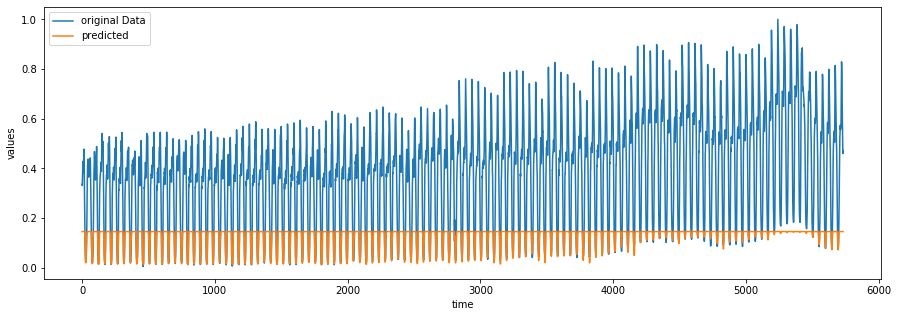

In [29]:
#plot original vs predicted data 
plt.rc('figure', figsize=(15,5))
plt.plot(testY, label ='original Data')
plt.plot(y_pred, label = 'predicted')
plt.xlabel('time')
plt.ylabel('values')
plt.legend()
plt.show()